# **Business Problem**

This study aims to determine whether KPIs have historically been associated with future stock performance of a company, with a focus on finding correlations between financial statement variables and stock performance/return. Generally speaking, investors are often told they "cannot beat the market," but this project will provide insights to help them get over many of these roadblocks by assisting them in choosing better investments based on performance and the quantitative indicators that are linked with it.

We're going to:

1. Examine and contrast the relationship between annual stock returns and changes in variables from financial statements each year.

2. Create specific ratios by combining variables from financial documents
3. Determine which variables have the strongest relationships with stock returns.

Today, many day trading "savants" swear by methodologies related to investing based on the shape of stock charts and arbitrary metrics without really diving into the companies' operations and seeing how their true performance impacts the stock price. We believe that integrating quantitative investing concepts with data on company quality can offer a more reliable investment strategy than relying on quantitative or qualitative investing alone. The most successful hedge funds have already figured this out, but we believe that we can find interesting insights as well.




#**Executive Summary**

This study aims to explore whether Key Performance Indicators (KPIs) from financial statements are historically linked to future stock performance, offering insights to help investors potentially "beat the market" by using quantitative data. By examining the relationship between annual stock returns and changes in financial statement variables, the project will identify which factors, such as profitability ratios or leverage measures, have the strongest influence on stock returns. In addition, custom ratios will be created by combining financial variables, providing a deeper analysis of company performance. Unlike day traders who often rely on chart patterns and arbitrary metrics, this study integrates both financial performance data and market behavior, offering a more reliable investment strategy. With a focus on combining fundamental analysis and quantitative metrics, the findings aim to help investors make better-informed decisions and outperform the market, following in the footsteps of successful hedge funds that leverage similar strategies. Some important conclusions from the project are:

1. **Key Financial Drivers**: Sales/revenue, net income, total assets, and ROIC have been identified as critical factors that influence stock performance, and future analyses could enhance the predictive power of these indicators.

2. **VOO vs. VSMAX Characteristics**: VOO companies offer stability and predictable growth, making them suitable for conservative investors, while VSMAX companies provide higher growth potential with greater risk, appealing to those with higher risk tolerance.

3. **Portfolio Management**: Understanding the differences between large-cap and small-cap companies can help investors balance their portfolios by incorporating both stable and high-growth opportunities.

4. **Machine Learning Potential**: Future research can use advanced machine learning techniques to model financial metrics more accurately, leveraging larger datasets and real-time information for better predictions.

5. **Natural Language Processing**: The use of NLP to analyze qualitative factors such as market sentiment and company management performance could further improve the ability to predict stock price movements.

# **Data Source**
An internationally renowned daily newspaper, The Wall Street Journal (WSJ) is well-known for its thorough coverage of business, financial markets, and economic news.

We took all the variables in the financial statements and used the publicly accessible financial statement data to select ten companies at random. Our goal is to find correlations between the financial statement variables and stock performance or return.

Drawing meaningful conclusions from data that is so diverse and has so many missing values makes it challenging for anyone to do so; but, with enough cleaning and careful investigation, obtaining such conclusions is not a tough undertaking.

5 Randomly selected companies from the Vanguard S&P 500 ETF (VOO)

*   418: Pentair plc (PNR) https://www.wsj.com/market-data/quotes/PNR/financials
*   168: Autozone (AZO) https://www.wsj.com/market-data/quotes/AZO/financials
*   67: ConocoPhillips (COP) https://www.wsj.com/market-data/quotes/COP/financials
*   419: NortonLifeLock In	c. (GEN) https://www.wsj.com/market-data/quotes/GEN/financials
*   264: VICI Properties Inc. (VICI) https://www.wsj.com/market-data/quotes/VICI/financials

5 Randomly selected companies from the Vanguard Small-Cap Index Fund Admiral Shares (VSMAX)

*  836: 10X Genomics Inc. Class A (TXG) https://www.wsj.com/market-data/quotes/TXG/financials
*  714: UniFirst Corp./MA (UNF) https://www.wsj.com/market-data/quotes/UNF/financials
*  1278: NerdWallet Inc. Class A (NRDS) https://www.wsj.com/market-data/quotes/NRDS/financials
*  519: Q2 Holdings Inc. (QTWO) https://www.wsj.com/market-data/quotes/QTWO/financials
*  732: Peabody Energy Corp. (BTU) https://www.wsj.com/market-data/quotes/BTU/financials

# **Data Preprocessing**

Importing the files and loading the required libraries from the device. The pandas and numpy libraries are required in order to create dataframes and convert datatypes, respectively. To create the graphs, the matplotlib and seaborn libraries are needed.

XG Boost, train_test_split classification_report and accuracy_score have been imported in order to create a machine learning model.

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

Mounted at /content/drive


#**Loading the file**

This is the financial data, which contains information on each of the businesses listed above. The cash flow statements, balance sheet, and income statement are all included in this dataset.

In addition, it includes the prices of these companies' stocks.

We looked at every potential financial variable in the financial statements to determine which ones were most useful in determining which financial variables impact a company's stock values. As visible, this is highly unclean data and needs to be cleaned before we can start analysing.

In [ ]:
df_fin = pd.read_excel('/content/drive/MyDrive/BA-780-A6/Data_BA_780_A6 (2).xlsx')
df_fin.head()

,Company Name,Code,EOY Stock Price,Year,Sales/Revenue,Sales Growth,Sales Trend,Cost of Goods Sold (COGS) incl. D&A,COGS excluding D&A,Depreciation & Amortization Expense,...,Cash Flow Trend,Free Cash Flow Yield,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,Unnamed: 172,Unnamed: 173,Unnamed: 174
0,10X Genomics Inc. Class A,TXG,55.96,2023.0,618727.0,0.1981,Increasing,209414.0,165795.0,43619.0,...,Increasing,-0.0097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10X Genomics Inc. Class A,TXG,36.44,2022.0,516409.0,0.0528,Increasing,120086.0,87080.0,33006.0,...,Decreasing,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10X Genomics Inc. Class A,TXG,148.96,2021.0,490490.0,0.6413,Increasing,74091.0,45837.0,28254.0,...,Increasing,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10X Genomics Inc. Class A,TXG,141.60,2020.0,298845.0,0.2153,Increasing,58468.0,39447.0,19021.0,...,Decreasing,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10X Genomics Inc. Class A,TXG,76.25,2019.0,245893.0,-,-,61033.0,53967.0,7066.0,...,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#**Cleaning the Data**

As the data was examined, it became clear that many organizations' records contained duplicate columns with year specifications. In addition, it was noted that some businesses reported their financial accounts in marginally different methods, and numerous financial variables lacked data. The required actions were done to guarantee the highest level of data cleanliness.

One significant issue that arose was the fact that some businesses had more than 150 columns, while others had more than 200 columns.

It was concluded that it would be more effective to create a new dataframe from the necessary columns rather than delete all the extraneous ones.

##**TXG**

1. **Data Retrieval and Preprocessing**:
Historical stock price data for the ticker 'TXG' is fetched using yfinance.
The data is resampled to yearly frequency, extracting the closing price for the last trading day of each year.
2. **Excel Data Import**:
Financial data for TXG is loaded from an Excel file.
Specific columns are selected, and certain rows are dropped to clean the dataset.
3. **Data Merging**:
The yearly stock price data is merged with the financial data from Excel based on the 'Year' column.
The old 'EOY Stock Price' column is replaced with the newly calculated values.
4. **Data Cleaning**:
'-' values are replaced with NaN.
Specific columns like 'Sales Growth', 'Gross Income', and 'SG&A Expense' are converted to float64 type.
5. **Type Conversion and Missing Value Handling**:
All applicable columns are converted to numeric types.
Missing numeric values are filled with the mean of their respective columns.
6. **Date Formatting**:
The 'Year' column is converted to datetime format and then extracted as year values.

In [ ]:
# Define the ticker symbol
symbol = 'TXG'

# Get data on this ticker
tickerData = yf.Ticker(symbol)

# Get the historical prices for this ticker (daily data)
tickerDF = tickerData.history(start="2019-01-01", end="2024-01-03", interval='1d')

# Resample the data to yearly frequency and get the closing price for the last trading day of each year
tickerDF_yearly = tickerDF['Close'].resample('Y').last()

# Convert to DataFrame and rename columns
tickerDF_yearly = tickerDF_yearly.reset_index()
tickerDF_yearly['Year'] = tickerDF_yearly['Date'].dt.year  # Extract year from the Date
tickerDF_yearly = tickerDF_yearly[['Year', 'Close']]  # Keep only Year and Close columns
tickerDF_yearly.columns = ['Year', 'EOY Stock Price']  # Rename columns for merging

# Load your Excel data
df_TXG = pd.read_excel('/content/drive/MyDrive/BA-780-A6/Data_BA_780_A6 (2).xlsx', sheet_name='TXG')

# Select the required columns and drop duplicates
new_TXG = ["Company Name", "Code", "EOY Stock Price", "Year", "Sales/Revenue", "Sales Growth", "Sales Trend",
           "Cost of Goods Sold (COGS) incl. D&A", "Depreciation & Amortization Expense", "Depreciation",
           "Amortization of Intangibles", "COGS Growth", "Gross Income", "Gross Income Growth", "SG&A Expense", "EBIT",
           "Net Income", "Net Income Growth", "EPS (Basic)", "EBITDA", "Cash & Short Term Investments", "Cash Only",
           "Total Accounts Receivable", "Inventories", "Other Current Assets", "Total Current Assets",
           "Net Property, Plant & Equipment", "Buildings", "Machinery & Equipment", "Total Assets", "Short Term Debt",
           "Accounts Payable", "Total Current Liabilities", "Long-Term Debt", "Total Liabilities", "Common Equity (Total)",
           "Additional Paid-In Capital/Capital Surplus", "Retained Earnings", "Total Shareholders' Equity",
           "Liabilities & Shareholders' Equity", "Net Income before Extraordinaries", "Depreciation, Depletion & Amortization",
           "Changes in Working Capital", "Receivables", "Inventories", "Net Operating Cash Flow", "Capital Expenditures",
           "Change in Long-Term Debt", "Net Change in Cash", "Free Cash Flow"]
new_TXG_df = df_TXG[new_TXG]
new_TXG_df = new_TXG_df.drop(new_TXG_df.index[[5,6,7,8,9,10,11,12,13,14]])
new_TXG_df.replace('-', np.nan, inplace=True)

# Merge the new_TXG_df with the yearly stock price data
new_TXG_df = pd.merge(new_TXG_df, tickerDF_yearly, on='Year', how='left')

# Drop the old 'EOY Stock Price' column (optional if it already exists)
new_TXG_df.drop(columns=['EOY Stock Price_x'], inplace=True, errors='ignore')

# Rename new 'EOY Stock Price' column
new_TXG_df.rename(columns={'EOY Stock Price_y': 'EOY Stock Price'}, inplace=True)

# Type conversion and handling missing values
new_TXG_df['Sales Growth'] = new_TXG_df['Sales Growth'].astype(np.float64)
new_TXG_df['Gross Income'] = new_TXG_df['Gross Income'].astype(np.float64)
new_TXG_df['SG&A Expense'] = new_TXG_df['SG&A Expense'].astype(np.float64)

# Convert numeric columns to numeric types and fill missing values with the mean
for col in new_TXG_df.columns:
    if col not in ['Company Name', 'Code', "Year", "Sales Trend"]:  # Exclude non-numeric columns
        try:
            new_TXG_df[col] = pd.to_numeric(new_TXG_df[col])
        except:
            pass

# Fill missing numeric values with the column mean
new_TXG_df.fillna(new_TXG_df.select_dtypes(include=np.float64).mean(), inplace=True)

# Check the updated DataFrame
# Ensure the Year column is in the correct format
new_TXG_df['Year'] = pd.to_datetime(new_TXG_df['Year'], format='%Y').dt.year
new_TXG_df.head()

<ipython-input-253-7b809b793b53>:11: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  tickerDF_yearly = tickerDF['Close'].resample('Y').last()
<ipython-input-253-7b809b793b53>:36: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_TXG_df.replace('-', np.nan, inplace=True)


,Company Name,Code,Year,Sales/Revenue,Sales Growth,Sales Trend,Cost of Goods Sold (COGS) incl. D&A,Depreciation & Amortization Expense,Depreciation,Amortization of Intangibles,...,"Depreciation, Depletion & Amortization",Changes in Working Capital,Receivables,Inventories,Net Operating Cash Flow,Capital Expenditures,Change in Long-Term Debt,Net Change in Cash,Free Cash Flow,EOY Stock Price
0,10X Genomics Inc. Class A,TXG,2023,618727.0,0.198100,Increasing,209414.0,43619.0,41007.0,2612.0,...,43619.0,17343.0,-10613.0,74.0,-15197.0,-49524.0,-5814.00,131931.0,-63798.0,55.959999
1,10X Genomics Inc. Class A,TXG,2022,516409.0,0.052800,Increasing,120086.0,33006.0,30438.0,2568.0,...,33006.0,-39417.0,-18948.0,82.0,-33606.0,-131661.0,-5409.00,-368720.0,-165267.0,36.439999
2,10X Genomics Inc. Class A,TXG,2021,490490.0,0.641300,Increasing,74091.0,28254.0,25636.0,2618.0,...,28254.0,-87445.0,-34041.0,60.0,-21373.0,-101278.0,-5028.00,-92571.0,-122651.0,148.960007
3,10X Genomics Inc. Class A,TXG,2020,298845.0,0.215300,Increasing,58468.0,19021.0,17309.0,1712.0,...,19021.0,-50381.0,-17847.0,30.0,-217898.0,-38394.0,-37104.00,212151.0,-254564.0,141.600006
4,10X Genomics Inc. Class A,TXG,2019,245893.0,0.276875,NaN,61033.0,7066.0,6700.0,366.0,...,7066.0,44764.0,-5284.0,15.0,34627.0,-42767.0,-13338.75,406405.0,-8115.0,76.250000


##**COP**

1. **Stock Data Retrieval**: The code uses yfinance to fetch COP's daily stock prices from 2019 to 2023, then resamples them to obtain year-end closing prices.
2. **Excel Data Import**: It loads financial data for COP from an Excel file, selecting specific columns related to various financial metrics and performance indicators.
3. **Data Cleaning**: The code replaces "-" with NaN values, converts the "Year" column to a consistent datetime format, and attempts to convert applicable columns to numeric types.
4. **Missing Value Handling**: Any remaining NaN values in numeric columns are filled with their respective column means. Columns with all NaN values are dropped.
5. **Data Addition**: Some Additional data is added to the dataframe
6. **Data Merging**: The historical stock price data is merged with the financial data from the Excel file, updating the "EOY Stock Price" column with the newly retrieved stock prices.
7. **Final Processing**: The code ensures the "Year" column is in the correct format, prepares the DataFrame for further analysis, and displays the first few rows of the processed data.

In [ ]:
# Step 1: Fetch yearly stock prices
symbol_COP = 'COP'
tickerData_COP = yf.Ticker(symbol_COP)
tickerDF_COP = tickerData_COP.history(start="2019-01-01", end="2023-01-04", interval='1d')

# Resample daily stock prices to get the last trading day's closing price of each year
tickerDF_yearly_COP = tickerDF_COP['Close'].resample('Y').last()

# Step 2: Create a DataFrame for years and EOY stock prices
yearly_stock_data = pd.DataFrame({
    'Year': tickerDF_yearly_COP.index.year,
    'EOY Stock Price': tickerDF_yearly_COP.values
})

# Step 3: Load your existing Excel data
df_COP = pd.read_excel('/content/drive/MyDrive/BA-780-A6/Data_BA_780_A6 (2) Copy.xlsx', sheet_name='COP')
df_COP.columns = df_COP.columns.str.strip()
# Step 1: Fetch yearly stock prices
symbol_COP = 'COP'
tickerData_COP = yf.Ticker(symbol_COP)
tickerDF_COP = tickerData_COP.history(start="2019-01-01", end="2023-01-04", interval='1d')

# Resample daily stock prices to get the last trading day's closing price of each year
tickerDF_yearly_COP = tickerDF_COP['Close'].resample('Y').last()

# Step 2: Create a DataFrame for years and EOY stock prices
yearly_stock_data = pd.DataFrame({
    'Year': tickerDF_yearly_COP.index.year,
    'EOY Stock Price': tickerDF_yearly_COP.values
})

# Step 3: Load your existing Excel data
df_COP = pd.read_excel('/content/drive/MyDrive/BA-780-A6/Data_BA_780_A6 (2) Copy.xlsx', sheet_name='COP')
df_COP.columns = df_COP.columns.str.strip()

# Specify the columns you want to keep
new_COP = ["Company Name", "Code", "EOY Stock Price", "Year", "Sales/Revenue", "Sales Growth", "Cost of Goods Sold (COGS) incl. D&A",
           "Depreciation & Amortization Expense", "Depreciation and Depletion", "COGS Growth", "Gross Income", "Gross Income Growth",
           "SG&A Expense", "EBIT", "Net Income", "Net Income Growth", "EPS (Basic)", "EBITDA", "Cash & Short Term Investments",
           "Cash Only", "Total Accounts Receivable", "Inventories", "Other Current Assets", "Total Current Assets",
           "Net Property, Plant & Equipment", "Total Assets", "Short Term Debt", "Accounts Payable", "Total Current Liabilities",
           "Long-Term Debt", "Total Liabilities", "Common Equity (Total)", "Additional Paid-In Capital/Capital Surplus",
           "Retained Earnings", "Total Shareholders' Equity", "Liabilities & Shareholders' Equity", "Net Income before Extraordinaries",
           "Depreciation, Depletion & Amortization", "Changes in Working Capital", "Receivables", "Inventories"]

new_COP_df = df_COP[new_COP]

# Step 4: Replace missing values and handle non-numeric columns
new_COP_df.replace('-', np.nan, inplace=True)
# Ensure 'Year' column in both DataFrames have the same data type (int)
new_COP_df['Year'] = pd.to_datetime(new_COP_df['Year'], format='%Y').dt.year # Convert to datetime then extract year as int
# new_COP_df['Year'] = new_COP_df['Year'].dt.year  # Extract year as integers


for col in new_COP_df.columns:
    if col not in ['Company Name', 'Code', 'Year']:  # Exclude non-numeric columns
        try:
            new_COP_df[col] = pd.to_numeric(new_COP_df[col])
        except:
            pass

# Fill NaN with column means for numeric data
new_COP_df.fillna(new_COP_df.select_dtypes(include=np.float64).mean(), inplace=True)

# Drop columns where all values are NaN
new_COP_df.dropna(how='all', axis=1, inplace=True)

# Step 5: Update the 'EOY Stock Price' column with the new stock price data
# Merge the new stock price data into the main DataFrame on the 'Year' column
new_COP_df = pd.merge(new_COP_df, yearly_stock_data, on='Year', how='left', suffixes=('', '_new'))

# Replace the old 'EOY Stock Price' with the new one
new_COP_df['EOY Stock Price'] = new_COP_df['EOY Stock Price_new']

# Drop the extra column used during the merge
new_COP_df.drop(columns=['EOY Stock Price_new'], inplace=True)

# Step 6: Final result
new_COP_df.head()

# Specify the columns you want to keep
new_COP = ["Company Name", "Code", "EOY Stock Price", "Year", "Sales/Revenue", "Sales Growth", "Cost of Goods Sold (COGS) incl. D&A",
           "Depreciation & Amortization Expense", "Depreciation and Depletion", "COGS Growth", "Gross Income", "Gross Income Growth",
           "SG&A Expense", "EBIT", "Net Income", "Net Income Growth", "EPS (Basic)", "EBITDA", "Cash & Short Term Investments",
           "Cash Only", "Total Accounts Receivable", "Inventories", "Other Current Assets", "Total Current Assets",
           "Net Property, Plant & Equipment", "Total Assets", "Short Term Debt", "Accounts Payable", "Total Current Liabilities",
           "Long-Term Debt", "Total Liabilities", "Common Equity (Total)", "Additional Paid-In Capital/Capital Surplus",
           "Retained Earnings", "Total Shareholders' Equity", "Liabilities & Shareholders' Equity", "Net Income before Extraordinaries",
           "Depreciation, Depletion & Amortization", "Changes in Working Capital", "Receivables", "Inventories", "Basic Shares Outstanding"]

new_COP_df = df_COP[new_COP]

# Step 4: Replace missing values and handle non-numeric columns
new_COP_df.replace('-', np.nan, inplace=True)
# Ensure 'Year' column in both DataFrames have the same data type (int)
new_COP_df['Year'] = pd.to_datetime(new_COP_df['Year'], format='%Y').dt.year # Convert to datetime then extract year as int
# new_COP_df['Year'] = new_COP_df['Year'].dt.year  # Extract year as integers


for col in new_COP_df.columns:
    if col not in ['Company Name', 'Code', 'Year']:  # Exclude non-numeric columns
        try:
            new_COP_df[col] = pd.to_numeric(new_COP_df[col])
        except:
            pass

# Fill NaN with column means for numeric data
new_COP_df.fillna(new_COP_df.select_dtypes(include=np.float64).mean(), inplace=True)

# Drop columns where all values are NaN
new_COP_df.dropna(how='all', axis=1, inplace=True)

# Step 5: Update the 'EOY Stock Price' column with the new stock price data
# Merge the new stock price data into the main DataFrame on the 'Year' column
new_COP_df = pd.merge(new_COP_df, yearly_stock_data, on='Year', how='left', suffixes=('', '_new'))

# Replace the old 'EOY Stock Price' with the new one
new_COP_df['EOY Stock Price'] = new_COP_df['EOY Stock Price_new']

# Drop the extra column used during the merge
new_COP_df.drop(columns=['EOY Stock Price_new'], inplace=True)

# Step 6: Final result
new_COP_df.head()


<ipython-input-254-9723ec05083f>:7: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  tickerDF_yearly_COP = tickerDF_COP['Close'].resample('Y').last()
<ipython-input-254-9723ec05083f>:24: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  tickerDF_yearly_COP = tickerDF_COP['Close'].resample('Y').last()
<ipython-input-254-9723ec05083f>:49: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_COP_df.replace('-', np.nan, inplace=True)
<ipython-input-254-9723ec05083f>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

,Company Name,Code,EOY Stock Price,Year,Sales/Revenue,Sales Growth,Cost of Goods Sold (COGS) incl. D&A,Depreciation & Amortization Expense,Depreciation and Depletion,COGS Growth,...,Common Equity (Total),Additional Paid-In Capital/Capital Surplus,Retained Earnings,Total Shareholders' Equity,Net Income before Extraordinaries,"Depreciation, Depletion & Amortization",Changes in Working Capital,Receivables,Inventories,Basic Shares Outstanding
0,ConocoPhilips,COP,106.875381,2023,2233,0.116100,1604,123,8432,0.132600,...,49279,61303,59268,49279,10957,8432,-1382,1333,-103,18
1,ConocoPhilips,COP,111.485977,2022,2001,0.095600,1416,110,7844,0.134800,...,48003,61142,53029,48003,18680,7844,-234,-963,-38,18
2,ConocoPhilips,COP,64.933800,2021,1826,0.012300,1248,107,7252,-0.017700,...,45406,60581,40674,45406,8079,7252,1271,-2500,-160,18
3,ConocoPhilips,COP,34.798145,2020,1804,-0.002900,1270,106,6604,0.021600,...,29849,47133,35213,29849,-2655,6604,-372,521,-25,18
4,ConocoPhilips,COP,54.402431,2019,1809,0.055275,1243,105,6511,0.067825,...,34981,46983,39742,34981,7257,6511,-579,505,-67,18


##**PNR**

1. **Historical Stock Data Retrieval**: The code fetches PNR's stock data from 2019 to 2023 using the yfinance library, then resamples it to obtain year-end closing prices.
2. **Excel Data Import**: It loads financial data for PNR from an Excel file, selecting specific columns related to various financial metrics and performance indicators.
3. **Data Cleaning**: The code removes duplicate entries, replaces "-" with NaN values, and converts the "Year" column to a consistent datetime format.
4. **Data Type Conversion**: It attempts to convert applicable columns to numeric types, ensuring consistency in data representation.
5. **Missing Value Handling**: Any remaining NaN values in numeric columns are filled with their respective column means.
6. **Data Merging**: The historical stock price data is merged with the financial data from the Excel file, updating the "EOY Stock Price" column with the retrieved stock prices.
7. **Date Formatting**:
The 'Year' column is converted to datetime format and then extracted as year values.

In [ ]:
# Step 1: Get the historical stock data for 'PNR' and resample it to yearly closing prices
symbol_PNR = 'PNR'
tickerData_PNR = yf.Ticker(symbol_PNR)
tickerDF_PNR = tickerData_PNR.history(start="2019-01-01", end="2023-01-04", interval='1d')

# Resample the data to yearly frequency and get the closing price for the last trading day of each year
tickerDF_yearly_PNR = tickerDF_PNR['Close'].resample('Y').last()

# Extract the Year and EOY Stock Price from the resampled data
yearly_prices = tickerDF_yearly_PNR.reset_index()
yearly_prices['Year'] = yearly_prices['Date'].dt.year  # Extract year as an integer
yearly_prices = yearly_prices[['Year', 'Close']]  # Keep only Year and Close columns
yearly_prices.rename(columns={'Close': 'EOY Stock Price'}, inplace=True)

# Step 2: Load the Excel sheet and prepare for merging
df_PNR = pd.read_excel('/content/drive/MyDrive/BA-780-A6/Data_BA_780_A6 (2) Copy.xlsx', sheet_name='PNR')
df_PNR.drop_duplicates(inplace=True)

# List of columns you want to keep# Step 1: Get the historical stock data for 'PNR' and resample it to yearly closing prices
symbol_PNR = 'PNR'
tickerData_PNR = yf.Ticker(symbol_PNR)
tickerDF_PNR = tickerData_PNR.history(start="2019-01-01", end="2023-01-04", interval='1d')

# Resample the data to yearly frequency and get the closing price for the last trading day of each year
tickerDF_yearly_PNR = tickerDF_PNR['Close'].resample('Y').last()

# Extract the Year and EOY Stock Price from the resampled data
yearly_prices = tickerDF_yearly_PNR.reset_index()
yearly_prices['Year'] = yearly_prices['Date'].dt.year  # Extract year as an integer
yearly_prices = yearly_prices[['Year', 'Close']]  # Keep only Year and Close columns
yearly_prices.rename(columns={'Close': 'EOY Stock Price'}, inplace=True)

# Step 2: Load the Excel sheet and prepare for merging
df_PNR = pd.read_excel('/content/drive/MyDrive/BA-780-A6/Data_BA_780_A6 (2) Copy.xlsx', sheet_name='PNR')
df_PNR.drop_duplicates(inplace=True)

# List of columns you want to keep
new_PNR = ["Company Name", "Code", "EOY Stock Price", "Year", "Sales/Revenue", "Sales Growth",
           "Cost of Goods Sold (COGS) incl. D&A", "Depreciation & Amortization Expense", "Depreciation",
           "Amortization of Intangibles", "COGS Growth", "Gross Income", "Gross Income Growth", "SG&A Expense",
           "EBIT", "Net Income", "Net Income Growth", "EPS (Basic)", "EBITDA", "Cash & Short Term Investments",
           "Cash Only", "Total Accounts Receivable", "Inventories", "Other Current Assets", "Total Current Assets",
           "Net Property, Plant & Equipment", "Buildings", "Machinery & Equipment", "Total Assets", "Short Term Debt",
           "Accounts Payable", "Total Current Liabilities", "Long-Term Debt", "Total Liabilities", "Common Equity (Total)",
           "Additional Paid-In Capital/Capital Surplus", "Retained Earnings", "Total Shareholders' Equity",
           "Liabilities & Shareholders' Equity", "Net Income before Extraordinaries", "Depreciation, Depletion & Amortization",
           "Changes in Working Capital", "Receivables", "Inventories", "Net Operating Cash Flow", "Capital Expenditures",
           "Change in Long-Term Debt", "Net Change in Cash", "Free Cash Flow"]

new_PNR_df = df_PNR[new_PNR]
new_PNR_df.replace('-', np.nan, inplace=True)

# Convert 'Year' to datetime format and numeric columns to appropriate data types
new_PNR_df['Year'] = pd.to_datetime(new_PNR_df['Year'], format='%Y').dt.year
for col in new_PNR_df.columns:
    if col not in ['Company Name', 'Code', "Year"]:  # Exclude non-numeric columns
        try:
            new_PNR_df[col] = pd.to_numeric(new_PNR_df[col])
        except:
            pass

# Fill missing values in numeric columns with column mean
new_PNR_df.fillna(new_PNR_df.select_dtypes(include=np.float64).mean(), inplace=True)

# Step 3: Merge the historical stock data into the DataFrame
new_PNR_df = new_PNR_df.merge(yearly_prices, on='Year', how='left')

# Step 4: Check the updated DataFrame
new_PNR_df.head()

new_PNR = ["Company Name", "Code", "EOY Stock Price", "Year", "Sales/Revenue", "Sales Growth",
           "Cost of Goods Sold (COGS) incl. D&A", "Depreciation & Amortization Expense", "Depreciation",
           "Amortization of Intangibles", "COGS Growth", "Gross Income", "Gross Income Growth", "SG&A Expense",
           "EBIT", "Net Income", "Net Income Growth", "EPS (Basic)", "EBITDA", "Cash & Short Term Investments",
           "Cash Only", "Total Accounts Receivable", "Inventories", "Other Current Assets", "Total Current Assets",
           "Net Property, Plant & Equipment", "Buildings", "Machinery & Equipment", "Total Assets", "Short Term Debt",
           "Accounts Payable", "Total Current Liabilities", "Long-Term Debt", "Total Liabilities", "Common Equity (Total)",
           "Additional Paid-In Capital/Capital Surplus", "Retained Earnings", "Total Shareholders' Equity",
           "Liabilities & Shareholders' Equity", "Net Income before Extraordinaries", "Depreciation, Depletion & Amortization",
           "Changes in Working Capital", "Receivables", "Inventories", "Net Operating Cash Flow", "Capital Expenditures",
           "Change in Long-Term Debt", "Net Change in Cash", "Free Cash Flow", "Basic Shares Outstanding"]

new_PNR_df = df_PNR[new_PNR]
new_PNR_df.replace('-', np.nan, inplace=True)

# Convert 'Year' to datetime format and numeric columns to appropriate data types
new_PNR_df['Year'] = pd.to_datetime(new_PNR_df['Year'], format='%Y').dt.year
for col in new_PNR_df.columns:
    if col not in ['Company Name', 'Code', "Year"]:  # Exclude non-numeric columns
        try:
            new_PNR_df[col] = pd.to_numeric(new_PNR_df[col])
        except:
            pass

# Fill missing values in numeric columns with column mean
new_PNR_df.fillna(new_PNR_df.select_dtypes(include=np.float64).mean(), inplace=True)

# Step 3: Merge the historical stock data into the DataFrame
new_PNR_df = new_PNR_df.merge(yearly_prices, on='Year', how='left')

# Step 4: Check the updated DataFrame
new_PNR_df.head()


<ipython-input-255-68b379dc15ae>:7: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  tickerDF_yearly_PNR = tickerDF_PNR['Close'].resample('Y').last()
<ipython-input-255-68b379dc15ae>:25: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  tickerDF_yearly_PNR = tickerDF_PNR['Close'].resample('Y').last()
<ipython-input-255-68b379dc15ae>:51: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_PNR_df.replace('-', np.nan, inplace=True)
<ipython-input-255-68b379dc15ae>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

,Company Name,Code,EOY Stock Price_x,Year,Sales/Revenue,Sales Growth,Cost of Goods Sold (COGS) incl. D&A,Depreciation & Amortization Expense,Depreciation,Amortization of Intangibles,...,Changes in Working Capital,Receivables,Inventories,Net Operating Cash Flow,Capital Expenditures,Change in Long-Term Debt,Net Change in Cash,Free Cash Flow,Basic Shares Outstanding,EOY Stock Price_y
0,Pentair PLC,PNR,72.71,2023,4105,-0.00420,2578,115,60,55,...,-58600,-24400,678,"6,19,200.00",-76000,"-3,32,500.00",61400,"5,43,200.00",165,44.105900
1,Pentair PLC,PNR,44.98,2022,4122,0.09480,2757,107,54,53,...,"-2,14,900.00",30400,790,"3,63,300.00",-85200,"14,11,700.00",14400,"2,78,100.00",165,43.891224
2,Pentair PLC,PNR,73.03,2021,3765,0.24750,2446,78,51,26,...,-32400,"-1,42,000.00",563,"6,13,200.00",-60200,55100,12400,"5,53,000.00",166,70.087387
3,Pentair PLC,PNR,53.09,2020,3018,0.02050,1952,75,47,28,...,"1,14,600.00","1,48,300.00",420,"5,73,600.00",-62200,"-1,91,500.00",-400,"5,11,400.00",167,50.334705
4,Pentair PLC,PNR,45.87,2019,2957,0.08965,1906,80,48,32,...,-96000,-17500,377,"3,53,000.00",-58500,"2,50,000.00",8200,"2,94,500.00",169,42.696968


##**VICI**

1. **Stock Data Retrieval**: The code uses yfinance to fetch VICI's daily stock prices from 2019 to 2023, then resamples them to obtain year-end closing prices.
2. **Excel Data Import**: It loads financial data for VICI from an Excel file, selecting specific columns related to various financial metrics and performance indicators.
3. **Data Cleaning and Transformation**:

 (I)Removes duplicate entries

 (II)Renames certain columns for consistency

 (III)Adds missing financial data (EBIT, EBITDA, Free Cash Flow, Gross Income) for specific years

 (IV)Replaces "-" with NaN for missing data

 (V)Converts the "Year" column to a datetime format

4. **Data Type Conversion**: The code attempts to convert applicable columns to numeric types, ensuring consistency in data representation.
5. **Missing Value Handling**: Any remaining NaN values in numeric columns are filled with their respective column means.
6. **Data Merging**: The historical stock price data retrieved from Yahoo Finance is merged with the financial data from the Excel file, updating the "EOY Stock Price" column.
7. **Final Processing**: The code prepares the DataFrame for further analysis by dropping unnecessary columns and displaying the first few rows of the processed data.

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

# Define the ticker symbol
symbol_VICI = 'VICI'

# Get data on this ticker
tickerData_VICI = yf.Ticker(symbol_VICI)

# Get the historical prices for this ticker (daily data)
tickerDF_VICI = tickerData_VICI.history(start="2019-01-01", end="2023-01-04", interval='1d')

# Resample the data to yearly frequency and get the closing price for the last trading day of each year
tickerDF_yearly_VICI = tickerDF_VICI['Close'].resample('Y').last()

# Extract the years and closing stock prices
yearly_data = pd.DataFrame({
    'Year': tickerDF_yearly_VICI.index.year,   # Extract the year from the index
    'EOY Stock Price': tickerDF_yearly_VICI.values  # Get the stock prices
})

# Load the Excel file
df_VICI = pd.read_excel('/content/drive/MyDrive/BA-780-A6/Data_BA_780_A6 (2).xlsx', sheet_name='VICI')

# Remove duplicates
df_VICI.drop_duplicates(inplace=True)

# Specify the columns you want to keep and rename
new_VICI = ['Company Name','Code','EOY Stock Price','Year','Sales/Revenue','Total Expense',
            'Depreciation & Amortization Expense','Income Taxes','Net Income', 'EPS (Basic)',
            'Basic Shares Outstanding','Sales Trend','Cash & Short Term Investments',
            'Total Assets','ST Debt & Current Portion LT Debt',
            'Current Portion of Long Term Debt','Long-Term Debt','Total Liabilities',
            'Common Equity (Total)','Additional Paid-In Capital/Capital Surplus',
            'Retained Earnings','Short-Term Receivables','Net Operating Cash Flow',
            'Capital Expenditures (Fixed Assets)','Issuance/Reduction of Debt, Net','Net Change in Cash']

new_VICI_df = df_VICI[new_VICI]

# Rename columns for consistency
new_VICI_df.rename(columns={'Total Expense': 'Cost of Goods Sold (COGS) incl. D&A'}, inplace=True)
new_VICI_df.rename(columns={'Capital Expenditures (Fixed Assets)': 'Capital Expenditures'}, inplace=True)

# Replace '-' with NaN for missing data
new_VICI_df.replace('-', np.nan, inplace=True)

# Convert the 'Year' column to datetime
new_VICI_df['Year'] = pd.to_datetime(new_VICI_df['Year'], format='%Y').dt.year

# Convert numeric columns to the appropriate dtype
for col in new_VICI_df.columns:
    if col not in ['Company Name', 'Code', 'Year']:  # Exclude non-numeric columns
        try:
            new_VICI_df[col] = pd.to_numeric(new_VICI_df[col], errors='coerce')
        except:
            pass

# Fill NaN values with the mean for float columns
new_VICI_df.fillna(new_VICI_df.select_dtypes(include=np.float64).mean(), inplace=True)

# Merge the stock price data (yearly_data) into new_VICI_df based on the Year column
new_VICI_df = new_VICI_df.merge(yearly_data, on='Year', how='left', suffixes=('', '_new'))

# Replace the 'EOY Stock Price' column with the new stock price data from Yahoo Finance
new_VICI_df['EOY Stock Price'] = new_VICI_df['EOY Stock Price_new']
new_VICI_df.drop(columns=['EOY Stock Price_new'], inplace=True)

# Final DataFrame
new_VICI_df.head()


<ipython-input-256-19ee278b8a96>:15: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  tickerDF_yearly_VICI = tickerDF_VICI['Close'].resample('Y').last()
<ipython-input-256-19ee278b8a96>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_VICI_df.rename(columns={'Total Expense': 'Cost of Goods Sold (COGS) incl. D&A'}, inplace=True)
<ipython-input-256-19ee278b8a96>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_VICI_df.rename(columns={'Capital Expenditures (Fixed Assets)': 'Capital Expenditures'}, inplace=True)
<ipython-input-256-19ee278b8a96>:46: FutureWarning

,Company Name,Code,EOY Stock Price,Year,Sales/Revenue,Cost of Goods Sold (COGS) incl. D&A,Depreciation & Amortization Expense,Income Taxes,Net Income,EPS (Basic),...,Long-Term Debt,Total Liabilities,Common Equity (Total),Additional Paid-In Capital/Capital Surplus,Retained Earnings,Short-Term Receivables,Net Operating Cash Flow,Capital Expenditures,"Issuance/Reduction of Debt, Net",Net Change in Cash
0,VICI Properties Inc.,VICI,28.914658,2023,3612,275,4,-6,2514,2.47,...,16513,18402,25256,24126,966,25,2181,-4,169,314
1,VICI Properties Inc.,VICI,29.506611,2022,2601,991,3,3,1118,1.27,...,14510,15286,21934,21645,93,19,1943,-2,4854,-531
2,VICI Properties Inc.,VICI,26.109997,2021,1510,76,3,3,1014,1.76,...,4965,5410,12108,11755,346,8,896,-3,-2100,424
3,VICI Properties Inc.,VICI,21.094822,2020,1226,321,4,1,892,1.75,...,7067,7570,9416,9364,139,7,884,-3,1905,-786
4,VICI Properties Inc.,VICI,19.898935,2019,895,52,4,2,546,1.24,...,4818,5217,7965,7818,208,62,682,-3,530,503


##**UNF**

1.**Stock Data Retrieval**: The code uses yfinance to fetch UNF's daily stock prices from 2019 to 2023, then resamples them to obtain year-end closing prices.

2.**Excel Data Import**: It loads financial data for UNF from an Excel file, selecting specific columns related to various financial metrics and performance indicators.

3.**Data Cleaning and Transformation**:

  (I)Removes duplicate entries

  (II)Renames certain columns for consistency

  (III)Replaces "-" with NaN for missing data

  (IV)Converts the "Year" column to a datetime format

4.**Data Type Conversion**: The code attempts to convert applicable columns to numeric types, ensuring consistency in data representation.

5.**Missing Value Handling**: Any remaining NaN values in numeric columns are filled with their respective column means.

6.**Data Merging**: The historical stock price data retrieved from Yahoo Finance is merged with the financial data from the Excel file, updating the "EOY Stock Price" column.

7.**Final Processing**: The code prepares the DataFrame for further analysis by dropping unnecessary columns created during the merge process.

In [ ]:
# Define the ticker symbol
symbol_UNF = 'UNF'

# Get data on this ticker
tickerData_UNF = yf.Ticker(symbol_UNF)

# Get the historical prices for this ticker (daily data)
tickerDF_UNF = tickerData_UNF.history(start="2019-01-01", end="2023-01-04", interval='1d')

# Resample the data to yearly frequency and get the closing price for the last trading day of each year
tickerDF_yearly_UNF = tickerDF_UNF['Close'].resample('Y').last()

# Convert the index to a column and match the format of the existing DataFrame
tickerDF_yearly_UNF = tickerDF_yearly_UNF.reset_index()
tickerDF_yearly_UNF['Year'] = tickerDF_yearly_UNF['Date'].dt.year
tickerDF_yearly_UNF = tickerDF_yearly_UNF[['Year', 'Close']]
tickerDF_yearly_UNF.columns = ['Year', 'EOY Stock Price']  # Rename columns
# Load the existing DataFrame
df_UNF = pd.read_excel('/content/drive/MyDrive/BA-780-A6/Data_BA_780_A6 (2) Copy.xlsx', sheet_name='UNF')

# Drop duplicates and rename columns for consistency
df_UNF.drop_duplicates(inplace=True)
df_UNF.rename(columns={'Company Name ': 'Company Name', 'EOY Stock Price ': 'EOY Stock Price'}, inplace=True)

# Select relevant columns
new_UNF = ['Company Name', 'Code', 'EOY Stock Price', 'Year', 'Sales/Revenue',
           'Cost of Goods Sold (COGS) incl. D&A', 'Depreciation & Amortization Expense', 'Gross Income',
           'Income Tax', 'Net Income', 'EPS (Basic)', 'Basic Shares Outstanding', 'EBITDA', 'Sales Growth',
           'Cash & Short Term Investments', 'Total Accounts Receivable', 'Inventories', 'Capital Expenditures',
           'Total Current Assets', 'Machinery & Equipment', 'Buildings', 'Total Assets',
           'Accounts Payable', 'Short Term Debt', 'Total Current Liabilities', 'Long-Term Debt', 'Total Liabilities',
           'Common Equity (Total)', 'Additional Paid-In Capital/Capital Surplus', 'Retained Earnings',
           "Total Shareholders' Equity", 'Net Income', 'Depreciation, Depletion & Amortization', 'Receivables',
           'Net Operating Cash Flow', 'Net Change in Cash','EBIT','Free Cash Flow']

new_UNF_df = df_UNF[new_UNF]

# Replace '-' with NaN and convert columns to numeric types where appropriate
new_UNF_df.replace('-', np.nan, inplace=True)
new_UNF_df['Year'] = pd.to_datetime(new_UNF_df['Year'], format='%Y').dt.year # Convert 'Year' to int

for col in new_UNF_df.columns:
    if col not in ['Company Name', 'Code', 'Year']:  # Exclude non-numeric columns
        # Check if the column is 1-dimensional and contains valid data types
        if new_UNF_df[col].apply(lambda x: isinstance(x, (int, float, str, np.number))).all():
            # Convert to numeric, coercing errors to NaN
            new_UNF_df[col] = pd.to_numeric(new_UNF_df[col], errors='coerce')
        else:
            print(f"Skipping column {col} due to incompatible data type.")

# Separate numeric and non-numeric columns
numeric_cols = new_UNF_df.select_dtypes(include=['float64', 'int64']).columns
non_numeric_cols = new_UNF_df.select_dtypes(exclude=['float64', 'int64']).columns

# Fill NaN values for numeric columns with their respective column mean
for col in numeric_cols:
    new_UNF_df[col] = new_UNF_df[col].fillna(new_UNF_df[col].mean())

# Fill NaN values for non-numeric columns with a placeholder (e.g., 'Unknown')
for col in non_numeric_cols:
    new_UNF_df[col] = new_UNF_df[col].fillna('Unknown')

# Fill NaN values with the mean of their respective columns
new_UNF_df.fillna(new_UNF_df.select_dtypes(include=np.float64).mean(), inplace=True)

# Merge the new stock price data into the existing DataFrame
new_UNF_df = pd.merge(new_UNF_df, tickerDF_yearly_UNF, on='Year', how='left')

# Update the EOY Stock Price column with the new values from the ticker data
new_UNF_df['EOY Stock Price'] = new_UNF_df['EOY Stock Price_y'].fillna(new_UNF_df['EOY Stock Price_x'])

# Drop redundant columns created during the merge
new_UNF_df.drop(columns=['EOY Stock Price_x', 'EOY Stock Price_y'], inplace=True)

# Check the updated DataFrame
new_UNF_df.head()

<ipython-input-257-ca4936216712>:11: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  tickerDF_yearly_UNF = tickerDF_UNF['Close'].resample('Y').last()


Skipping column Net Income due to incompatible data type.
Skipping column Net Income due to incompatible data type.


<ipython-input-257-ca4936216712>:39: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_UNF_df.replace('-', np.nan, inplace=True)
<ipython-input-257-ca4936216712>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_UNF_df.replace('-', np.nan, inplace=True)
<ipython-input-257-ca4936216712>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

,Company Name,Code,Year,Sales/Revenue,Cost of Goods Sold (COGS) incl. D&A,Depreciation & Amortization Expense,Gross Income,Income Tax,Net Income,EPS (Basic),...,Retained Earnings,Total Shareholders' Equity,Net Income,"Depreciation, Depletion & Amortization",Receivables,Net Operating Cash Flow,Net Change in Cash,EBIT,Free Cash Flow,EOY Stock Price
0,UniFirst Corp.,UNF,2023,2233,1604,123,629,35,104,5.53,...,1927,2004,104,123192,-21714,214911,-296956,134,42920,187.524033
1,UniFirst Corp.,UNF,2022,2001,1416,110,585,31,103,5.46,...,1845,1916,103,110343,-40626,122649,-136469,134,-21670,190.535248
2,UniFirst Corp.,UNF,2021,1826,1248,107,579,46,151,7.94,...,1807,1873,151,107388,-16685,211480,38030,196,77841,206.311462
3,UniFirst Corp.,UNF,2020,1804,1270,106,534,42,136,7.13,...,1685,1741,136,106163,14589,286684,89497,151,169967,206.592728
4,UniFirst Corp.,UNF,2019,1809,1243,105,566,59,179,9.33,...,1588,1641,179,104953,-3189,282142,114829,211,162327,196.071594


##**NRDS**

1.**Stock Data Retrieval**: The code uses yfinance to fetch NRDS's daily stock prices from 2019 to 2023, then resamples them to obtain year-end closing prices.

2.**Excel Data Import**: It loads financial data for NRDS from an Excel file, selecting specific columns related to various financial metrics and performance indicators.

3.**Data Cleaning and Transformation**:
(I)Removes duplicate entries
(II)Strips whitespace from column names
(III)Replaces "-" with NaN for missing data
(IV)Converts the "Year" column to a datetime format, then extracts the year as an integer

4.**Data Type Conversion**: The code attempts to convert applicable columns to numeric types, ensuring consistency in data representation.

5.**Missing Value Handling**: Any remaining NaN values in numeric columns are filled with their respective column means.

6.**Data Merging**: The historical stock price data retrieved from Yahoo Finance is merged with the financial data from the Excel file, updating the "EOY Stock Price" column with the most recent data available.

7.**Final Processing**: The code prepares the DataFrame for further analysis by dropping unnecessary columns created during the merge process and stores the result in the NRDS_lp variable.

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf

# Step 1: Fetch Historical Stock Prices for NRDS
symbol_NRDS = 'NRDS'
tickerData_NRDS = yf.Ticker(symbol_NRDS)
tickerDF_NRDS = tickerData_NRDS.history(start="2019-01-01", end="2023-01-04", interval='1d')

# Resample to get yearly closing prices
tickerDF_yearly_NRDS = tickerDF_NRDS['Close'].resample('Y').last()

# Extract the year and stock prices
stock_prices_NRDS = pd.DataFrame({
    'Year': tickerDF_yearly_NRDS.index.year,   # Get the year from the resampled index
    'EOY Stock Price': tickerDF_yearly_NRDS.values  # Get the corresponding stock prices
})

# Step 2: Load the existing Excel data for NRDS
df_NRDS = pd.read_excel('/content/drive/MyDrive/BA-780-A6/Data_BA_780_A6 (2).xlsx', sheet_name='NRDS')

# Step 3: Clean up columns (strip whitespace, remove duplicates)
df_NRDS.columns = df_NRDS.columns.str.strip()
df_NRDS.drop_duplicates(inplace=True)

# Step 4: Create a subset of the relevant columns
new_NRDS = ['Company Name','Code','EOY Stock Price','Year','Sales/Revenue',
'Cost of Goods Sold (COGS) incl. D&A','Depreciation & Amortization Expense','Gross Income',
'Income Tax', 'Net Income', 'EPS (Basic)','Basic Shares Outstanding','EBITDA', 'Sales Growth',
'Cash & Short Term Investments','Total Accounts Receivable',
'Total Current Assets', 'Property, Plant & Equipment - Gross','Total Assets',
'Accounts Payable','Short Term Debt','Total Current Liabilities','Long-Term Debt','Total Liabilities',
'Common Equity (Total)','Additional Paid-In Capital/Capital Surplus','Retained Earnings',
"Total Shareholders' Equity",'Net Income','Depreciation, Depletion & Amortization','Receivables','Net Operating Cash Flow','Net Change in Cash','EBIT','Free Cash Flow']

new_NRDS_df = df_NRDS[new_NRDS]

# Step 5: Clean data, convert Year to datetime, and fill missing values
new_NRDS_df.replace('-', np.nan, inplace=True)
# Convert 'Year' to int to match the stock_prices_NRDS DataFrame
new_NRDS_df['Year'] = pd.to_datetime(new_NRDS_df['Year'], format='%Y').dt.year
for col in new_NRDS_df.columns:
    if col not in ['Company Name', 'Code', 'Year']:  # Exclude non-numeric columns
        try:
            new_NRDS_df[col] = pd.to_numeric(new_NRDS_df[col])
        except:
            pass

# Fill missing numeric columns with column means
new_NRDS_df.fillna(new_NRDS_df.select_dtypes(include=np.float64).mean(), inplace=True)

# Step 6: Merge stock price data with new_NRDS_df based on the 'Year' column
new_NRDS_df = pd.merge(new_NRDS_df, stock_prices_NRDS, on='Year', how='left', suffixes=('', '_new'))

# Update the 'EOY Stock Price' column with the latest data from yfinance
new_NRDS_df['EOY Stock Price'] = new_NRDS_df['EOY Stock Price_new'].combine_first(new_NRDS_df['EOY Stock Price'])

# Drop the extra column
new_NRDS_df.drop(columns=['EOY Stock Price_new'], inplace=True)

# Final NRDS dataframe
NRDS_lp = new_NRDS_df


NRDS_lp.head()


<ipython-input-258-4cfc4848e7f3>:11: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  tickerDF_yearly_NRDS = tickerDF_NRDS['Close'].resample('Y').last()
<ipython-input-258-4cfc4848e7f3>:39: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_NRDS_df.replace('-', np.nan, inplace=True)
<ipython-input-258-4cfc4848e7f3>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_NRDS_df.replace('-', np.nan, inplace=True)
<ipython-input-258-4cfc4848e7f3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

,Company Name,Code,EOY Stock Price,Year,Sales/Revenue,Cost of Goods Sold (COGS) incl. D&A,Depreciation & Amortization Expense,Gross Income,Income Tax,Net Income,...,Additional Paid-In Capital/Capital Surplus,Retained Earnings,Total Shareholders' Equity,Net Income,"Depreciation, Depletion & Amortization",Receivables,Net Operating Cash Flow,Net Change in Cash,EBIT,Free Cash Flow
0,NerdWallet Inc.,NRDS,9.64,2023,599400,54000,48200,545400,18100,-11800,...,483700,-116500,366900,-11800,48200,10700,72100,16500,9000,42600
1,NerdWallet Inc.,NRDS,9.60,2022,538900,39800,37000,499100,-9800,-10200,...,427300,-84700,341700,-10200,39600,-18700,25000,-83900,-6000,-7200
2,NerdWallet Inc.,NRDS,15.55,2021,379600,45200,35000,334400,4800,-42500,...,331600,-74500,257600,-42500,35000,-20200,7200,84400,-20000,-15800
3,NerdWallet Inc.,NRDS,13.22,2020,245300,32250,21900,213050,-4400,5300,...,99800,-17700,151500,5300,21900,1000,15400,15800,1600,-3300
4,NerdWallet Inc.,NRDS,13.22,2019,228300,16100,15700,212200,3700,24200,...,29800,-20200,76800,24200,15700,-12900,31400,15200,28400,16600


##**GEN**

1.**Stock Data Retrieval**: The code uses yfinance to fetch GEN's daily stock prices from 2019 to 2023, then resamples them to obtain year-end closing prices.

2.**Excel Data Import**: It loads financial data for GEN from an Excel file, selecting specific columns related to various financial metrics and performance indicators.

3.**Data Cleaning and Transformation**:
(I)Removes duplicate entries
(II)Adds missing data for 'Short Term Debt' and 'Total Current Liabilities'
(III)Replaces "-" with NaN for missing data
(IV)Converts the "Year" column to a datetime format, then extracts the year as an integer

4.**Data Type Conversion**: The code attempts to convert applicable columns to numeric types, ensuring consistency in data representation.

5.**Missing Value Handling**: Any remaining NaN values in numeric columns are filled with their respective column means.

6.**Data Merging**: The historical stock price data retrieved from Yahoo Finance is merged with the financial data from the Excel file, updating the "EOY Stock Price" column with the most recent data available.

7.**Final Processing**: The code prepares the DataFrame for further analysis by dropping unnecessary columns created during the merge process.

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

# Step 1: Get yearly closing prices for GEN
symbol_GEN = 'GEN'
tickerData_GEN = yf.Ticker(symbol_GEN)

# Get daily historical prices for the given period
tickerDF_GEN = tickerData_GEN.history(start="2019-01-01", end="2023-01-04", interval='1d')

# Resample to yearly data and get the last closing price of each year
tickerDF_yearly_GEN = tickerDF_GEN['Close'].resample('Y').last().reset_index()

# Rename columns for clarity
tickerDF_yearly_GEN.columns = ['Year', 'EOY Stock Price']

# Convert 'Year' to just the year format (e.g., 2019, 2020, etc.)
tickerDF_yearly_GEN['Year'] = tickerDF_yearly_GEN['Year'].dt.year

# Step 2: Load the existing Excel data
df_GEN = pd.read_excel('/content/drive/MyDrive/BA-780-A6/Data_BA_780_A6 (2) Copy.xlsx', sheet_name='GEN')
df_GEN = df_GEN.drop_duplicates()

# Select only the relevant columns
new_GEN = ['Company Name', 'Company Code', 'EOY Stock Price', 'Year', 'Sales/Revenue',
           'Cost of Goods Sold (COGS) incl. D&A', 'Depreciation & Amortization Expense',
           'Gross Income', 'Net Income', 'EPS (Basic)', 'EBITDA', 'Sales Trend', 'Cash & Short Term Investments',
           'Cash Only', 'Accounts Receivables, Gross', 'Total Current Assets',
           'Property, Plant & Equipment - Gross', 'Total Assets','EBIT','Free Cash Flow']
new_GEN_df = df_GEN[new_GEN]

# Replace '-' with NaN and convert 'Year' to datetime
new_GEN_df.replace('-', np.nan, inplace=True)
new_GEN_df['Year'] = pd.to_datetime(new_GEN_df['Year'], format='%Y').dt.year  # Keep only year

# Convert all columns to numeric where possible
for col in new_GEN_df.columns:
    if col not in ['Company Name', 'Company Code', 'Year']:  # Exclude non-numeric columns
        try:
            new_GEN_df[col] = pd.to_numeric(new_GEN_df[col])
        except:
            pass

# Fill missing numeric values with column means
new_GEN_df.fillna(new_GEN_df.select_dtypes(include=np.float64).mean(), inplace=True)

# Step 3: Merge the yearly stock price data with the existing DataFrame
new_GEN_df = new_GEN_df.merge(tickerDF_yearly_GEN, on='Year', how='left', suffixes=('', '_new'))

# Update the 'EOY Stock Price' column with the new data from yfinance
new_GEN_df['EOY Stock Price'] = new_GEN_df['EOY Stock Price_new'].combine_first(new_GEN_df['EOY Stock Price'])

# Drop the temporary '_new' column
new_GEN_df.drop(columns=['EOY Stock Price_new'], inplace=True)

# View the updated DataFrame
new_GEN_df.head()

<ipython-input-259-67ac47d41c94>:13: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  tickerDF_yearly_GEN = tickerDF_GEN['Close'].resample('Y').last().reset_index()
<ipython-input-259-67ac47d41c94>:34: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_GEN_df.replace('-', np.nan, inplace=True)
<ipython-input-259-67ac47d41c94>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_GEN_df.replace('-', np.nan, inplace=True)
<ipython-input-259-67ac47d41c94>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

,Company Name,Company Code,EOY Stock Price,Year,Sales/Revenue,Cost of Goods Sold (COGS) incl. D&A,Depreciation & Amortization Expense,Gross Income,Net Income,EPS (Basic),EBITDA,Sales Trend,Cash & Short Term Investments,Cash Only,"Accounts Receivables, Gross",Total Current Assets,"Property, Plant & Equipment - Gross",Total Assets,EBIT,Free Cash Flow
0,Gen Digital Inc.,GEN,20.736074,2023,3338,761,352,2577,1349,2.16,1725,Increasing,750,750,169,1233,628,15947,1373.00,751
1,Gen Digital Inc.,GEN,20.553843,2022,2796,493,160,2303,836,1.41,1196,Increasing,1891,1887,121,2260,649,6943,1036.00,968
2,Gen Digital Inc.,GEN,24.415031,2021,2551,436,172,2115,696,0.92,1229,Increasing,951,933,118,1538,709,6361,1057.00,700
3,Gen Digital Inc.,GEN,19.135248,2020,2490,472,271,2018,578,6.05,892,Increasing,2263,2177,123,3079,1166,7735,621.00,-950
4,Gen Digital Inc.,GEN,13.255630,2019,2456,535,249,1921,-110,0.05,628,Increasing,2043,1791,713,3186,1684,15938,1021.75,1288


##**BTU**

1.**Stock Data Retrieval**: The code uses yfinance to fetch BTU's daily stock prices from 2019 to 2023, then resamples them to obtain year-end closing prices.

2.**Excel Data Import**: It loads financial data for BTU from an Excel file, selecting specific columns related to various financial metrics and performance indicators.

3.**Data Cleaning and Transformation**:

(I)Removes duplicate entries

(II)Adds missing data for 'Short Term Debt' and 'Total Current Liabilities'

(III)Replaces "-" with NaN for missing data

(IV)Converts the "Year" column to a datetime format, then extracts the year as an integer

4.**Data Type Conversion**: The code attempts to convert applicable columns to numeric types, ensuring consistency in data representation.

5.**Missing Value Handling**: Any remaining NaN values in numeric columns are filled with their respective column means.

6.**Data Merging**: The historical stock price data retrieved from Yahoo Finance is merged with the financial data from the Excel file, updating the "EOY Stock Price" column with the most recent data available.

7.**Final Processing**: The code prepares the DataFrame for further analysis by dropping unnecessary columns created during the merge process.

In [ ]:
import pandas as pd
import yfinance as yf
import numpy as np

# Step 1: Fetch stock data from Yahoo Finance
# Define the ticker symbol
symbol_BTU = 'BTU'

# Get data on this ticker (daily data)
tickerData_BTU = yf.Ticker(symbol_BTU)
tickerDF_BTU = tickerData_BTU.history(start="2019-01-01", end="2023-01-04", interval='1d')

# Resample the daily data to get yearly closing prices (EOY stock price)
tickerDF_yearly_BTU = tickerDF_BTU['Close'].resample('Y').last()

# Convert the resampled data into a DataFrame for easy merging
tickerDF_yearly_BTU = tickerDF_yearly_BTU.reset_index()
tickerDF_yearly_BTU['Year'] = tickerDF_yearly_BTU['Date'].dt.year  # Extract the year

# Step 2: Load the existing Excel file
df_BTU = pd.read_excel('/content/drive/MyDrive/BA-780-A6/Data_BA_780_A6 (2) Copy.xlsx', sheet_name='BTU')
df_BTU = df_BTU.drop_duplicates()

# Step 3: Select the relevant columns
new_BTU = ['Company Name', 'Company Code', 'EOY Stock Price', 'Year', 'Sales/Revenue',
           'Cost of Goods Sold (COGS) incl. D&A', 'Depreciation & Amortization Expense',
           'Gross Income', 'Net Income', 'EPS (Basic)', 'EBITDA', 'Sales Trend', 'Cash & Short Term Investments',
           'Cash Only', 'Accounts Receivables, Gross', 'Total Current Assets',
           'Property, Plant & Equipment - Gross', 'Total Assets','EBIT']

new_BTU_df = df_BTU[new_BTU]
new_BTU_df.replace('-', np.nan, inplace=True)
new_BTU_df['Year'] = pd.to_datetime(new_BTU_df['Year'], format='%Y').dt.year  # Convert Year to integer year format

# Step 4: Merge the new EOY stock prices into the existing DataFrame based on the Year
new_BTU_df = new_BTU_df.merge(tickerDF_yearly_BTU[['Year', 'Close']], on='Year', how='left')

# Step 5: Replace the old 'EOY Stock Price' with the new 'Close' prices
new_BTU_df['EOY Stock Price'] = new_BTU_df['Close']
new_BTU_df.drop(columns=['Close'], inplace=True)  # Drop the 'Close' column as it's now redundant

# Step 6: Clean and preprocess the remaining columns
for col in new_BTU_df.columns:
    if col not in ['Company Name', 'Company Code', "Year"]:  # Exclude non-numeric columns
        try:
            new_BTU_df[col] = pd.to_numeric(new_BTU_df[col])
        except:
            pass

# Fill NaN values with the mean of each column (numeric columns only)
new_BTU_df.fillna(new_BTU_df.select_dtypes(include=np.float64).mean(), inplace=True)

# Step 7: Display the updated DataFrame
new_BTU_df.head()

<ipython-input-260-74277bf7ecde>:14: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  tickerDF_yearly_BTU = tickerDF_BTU['Close'].resample('Y').last()
<ipython-input-260-74277bf7ecde>:32: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_BTU_df.replace('-', np.nan, inplace=True)
<ipython-input-260-74277bf7ecde>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_BTU_df.replace('-', np.nan, inplace=True)
<ipython-input-260-74277bf7ecde>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

,Company Name,Company Code,EOY Stock Price,Year,Sales/Revenue,Cost of Goods Sold (COGS) incl. D&A,Depreciation & Amortization Expense,Gross Income,Net Income,EPS (Basic),EBITDA,Sales Trend,Cash & Short Term Investments,Cash Only,"Accounts Receivables, Gross",Total Current Assets,"Property, Plant & Equipment - Gross",Total Assets,EBIT
0,Peabody Energy Corp,BTU,24.606745,2023,4869,3755,372,1114,760,-0.393800,-0.352500,Decreasing,969,-0.2585,67,2020,4972,816,-141
1,Peabody Energy Corp,BTU,25.900805,2022,5462,3649,367,1813,1295,1.566300,1.487400,Increasing,1307,0.3699,49,2373,4679,1319,73
2,Peabody Energy Corp,BTU,9.872108,2021,3473,2901,353,572,336,1.168000,2.133100,Increasing,954,0.3456,44,1802,4467,371,53
3,Peabody Energy Corp,BTU,2.362640,2020,2906,2930,392,-24,-1856,-8.395000,-0.694500,Decreasing,709,-0.0314,64,1420,4422,-1860,1576
4,Peabody Energy Corp,BTU,8.940778,2019,4556,4192,659,364,-215,-1.513625,0.643375,NaN,732,0.1064,46,1614,6171,-188,223


##**QTWO**

1.**Stock Data Retrieval**: The code uses yfinance to fetch QTWO's daily stock prices from 2019 to 2023, then resamples them to obtain year-end closing prices.

2.**Excel Data Import**: It loads financial data for QTWO from an Excel file, selecting specific columns related to various financial metrics and performance indicators.

3.**Data Cleaning and Transformation**:

(I)Replaces "-" and "##########" with NaN for missing data

(II)Converts the "Year" column to a datetime format, then extracts the year as an integer

(III)Attempts to convert applicable columns to numeric types

(IV)Missing Value Handling: Any remaining NaN values in numeric columns are filled with their respective column means. Columns with all NaN values are dropped.

5.**Data Merging**: The historical stock price data retrieved from Yahoo Finance is merged with the financial data from the Excel file, updating the "EOY Stock Price" column with the most recent data available.

6.**Final Processing**: The code prepares the DataFrame for further analysis by dropping unnecessary columns and storing the result in the QTWO_lp variable.

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

# Step 1: Fetch historical prices for QTWO and resample to yearly closing prices
symbol_QTWO = 'QTWO'
tickerData_QTWO = yf.Ticker(symbol_QTWO)
tickerDF_QTWO = tickerData_QTWO.history(start="2019-01-01", end="2023-01-04", interval='1d')

# Resample to yearly frequency (last closing price of the year)
tickerDF_yearly_QTWO = tickerDF_QTWO['Close'].resample('Y').last().reset_index()
tickerDF_yearly_QTWO['Year'] = tickerDF_yearly_QTWO['Date'].dt.year  # Extract year
tickerDF_yearly_QTWO = tickerDF_yearly_QTWO[['Year', 'Close']]  # Keep only relevant columns

# Step 2: Load the Excel file for QTWO
df_QTWO = pd.read_excel('/content/drive/MyDrive/BA-780-A6/Data_BA_780_A6 (2).xlsx', sheet_name='QTWO')

# Define relevant columns
new_QTWO = [
    'Company Name', 'Code', 'EOY Stock Price', 'Year', 'Sales/Revenue',
    'Cost of Goods Sold (COGS) incl. D&A', 'Depreciation & Amortization Expense',
    'Gross Income', 'Net Income', 'EPS (Basic)', 'EBITDA', 'Sales Trend', 'Cash Only',
    'Accounts Receivables, Gross', 'Total Current Assets', 'Property, Plant & Equipment - Gross',
    'Total Assets', 'Accounts Payable', 'Short Term Debt', 'Total Current Liabilities',
    'Long-Term Debt', 'Common Equity (Total)', 'Total Liabilities', 'Retained Earnings',
    'Total Equity', 'Net Income before Extraordinaries', 'Depreciation, Depletion & Amortization',
    'Receivables', 'Net Operating Cash Flow', 'Capital Expenditures', 'Net Change in Cash', 'Cash Flow Trend','EBIT','Free Cash Flow'
]
new_QTWO_df = df_QTWO[new_QTWO]

# Clean up the data
new_QTWO_df.replace('-', np.nan, inplace=True)
new_QTWO_df.replace('##########', np.nan, inplace=True)
new_QTWO_df['Year'] = pd.to_datetime(new_QTWO_df['Year'], format='%Y').dt.year  # Convert to year

# Ensure numeric conversion for appropriate columns
for col in new_QTWO_df.columns:
    if col not in ['Company Name', 'Code', 'Year']:
        try:
            new_QTWO_df[col] = pd.to_numeric(new_QTWO_df[col])
        except:
            pass

# Fill missing values
new_QTWO_df.fillna(new_QTWO_df.select_dtypes(include=np.float64).mean(), inplace=True)
new_QTWO_df.dropna(how='all', axis=1, inplace=True)

# Step 3: Merge the yearly stock price data with the QTWO dataframe
new_QTWO_df = new_QTWO_df.merge(tickerDF_yearly_QTWO, on='Year', how='left')

# Step 4: Replace the 'EOY Stock Price' column with the new stock price data
new_QTWO_df['EOY Stock Price'] = new_QTWO_df['Close']

# Drop the 'Close' column since it's now in 'EOY Stock Price'
new_QTWO_df.drop(columns=['Close'], inplace=True)

# Step 5: Final cleaned dataframe
QTWO_lp = new_QTWO_df

# Display the first few rows of the new dataframe
new_QTWO_df.head()


<ipython-input-261-cba71046f6a7>:11: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  tickerDF_yearly_QTWO = tickerDF_QTWO['Close'].resample('Y').last().reset_index()
<ipython-input-261-cba71046f6a7>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_QTWO_df.replace('-', np.nan, inplace=True)
<ipython-input-261-cba71046f6a7>:33: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_QTWO_df.replace('##########', np.nan, inplace=True)
<ipython-input-261-cba71046f6a7>:33: SettingWithCopyWarning: 
A value is trying to be set on 

,Company Name,Code,EOY Stock Price,Year,Sales/Revenue,Cost of Goods Sold (COGS) incl. D&A,Depreciation & Amortization Expense,Gross Income,Net Income,EPS (Basic),...,Retained Earnings,Total Equity,Net Income before Extraordinaries,Receivables,Net Operating Cash Flow,Capital Expenditures,Net Change in Cash,Cash Flow Trend,EBIT,Free Cash Flow
0,"Q2 Holdings, Inc.",QTWO,27.180000,2023,"6,24,624.00","3,42,640.00",85107,"2,81,984.00",-65384.0,-1.12,...,-626,448,-65384.0,7783,70292,-30643,31730,Increasing,-75058,64619
1,"Q2 Holdings, Inc.",QTWO,26.870001,2022,"5,65,673.00","3,27,576.00",73159,"2,38,097.00",-68130.5,-1.90,...,-560,419,-68130.5,-815,36556,-30052,NaN,Increasing,-90383,25414
2,"Q2 Holdings, Inc.",QTWO,79.440002,2021,"4,98,720.00","2,91,586.00",66733,"2,07,134.00",-68130.5,-2.00,...,-494,570,-68130.5,-14237,30925,-25619,-85364,Increasing,-73297,11171
3,"Q2 Holdings, Inc.",QTWO,126.529999,2020,"4,02,751.00","2,46,040.00",66340,"1,56,711.00",-68130.5,-2.65,...,-381,643,-68130.5,-18281,-2890,-24667,"3,07,623.00",Decreasing,-83930,-26605
4,"Q2 Holdings, Inc.",QTWO,81.080002,2019,"3,15,484.00","1,68,824.00",36157,"1,46,660.00",-70877.0,-1.53,...,-243,379,-70877.0,-4819,567,-14325,-6594,NaN,-50299,-13293


##**AZO**

1.**Stock Data Retrieval**: The code uses yfinance to fetch AZO's daily stock prices from 2019 to 2023, then resamples them to obtain year-end closing prices.

2.**Excel Data Import**: It loads financial data for AZO from an Excel file, selecting specific columns related to various financial metrics and performance indicators.

3.**Data Cleaning and Transformation**:

(I)Removes duplicate entries

(II)Replaces missing values and placeholders ("-" and "##########") with NaN

(III)Converts the "Year" column to a datetime format, then extracts the year as an integer

(IV)Attempts to convert applicable columns to numeric types

5.**Missing Value Handling**: Any remaining NaN values in numeric columns are filled with their respective column means. Columns with all NaN values are dropped.

6.**Data Merging**: The historical stock price data retrieved from Yahoo Finance is merged with the financial data from the Excel file, updating the "EOY Stock Price" column with the most recent data available.

7.**Final Processing**: The code prepares the DataFrame for further analysis by dropping unnecessary columns created during the merge process.

In [ ]:
# Define the ticker symbol
symbol_AZO = 'AZO'

# Get data on this ticker
tickerData_AZO = yf.Ticker(symbol_AZO)

# Get the historical prices for this ticker (daily data)
tickerDF_AZO = tickerData_AZO.history(start="2019-01-01", end="2023-01-04", interval='1d')

# Resample the data to yearly frequency and get the closing price for the last trading day of each year
tickerDF_yearly_AZO = tickerDF_AZO['Close'].resample('Y').last()

# Convert to DataFrame and reset the index to get the 'Year' and 'EOY Stock Price'
stock_data_AZO = tickerDF_yearly_AZO.reset_index()
stock_data_AZO['Year'] = stock_data_AZO['Date'].dt.year  # Extract just the year from the Date
stock_data_AZO.rename(columns={'Close': 'EOY Stock Price'}, inplace=True)  # Rename Close column
stock_data_AZO = stock_data_AZO[['Year', 'EOY Stock Price']]  # Keep only Year and EOY Stock Price

# Load the Excel sheet into df_AZO
df_AZO = pd.read_excel('/content/drive/MyDrive/BA-780-A6/Data_BA_780_A6 (2).xlsx', sheet_name='AZO')

# Drop duplicates from the data
df_AZO.drop_duplicates(inplace=True)

# Define the relevant columns from df_AZO
new_AZO = ['Company Name', 'Code', 'EOY Stock Price', 'Year', 'Sales/Revenue', 'Cost of Goods Sold (COGS) incl. D&A',
           'Depreciation & Amortization Expense', 'Gross Income', 'Net Income', 'EPS (Basic)', 'EBITDA',
           'Sales Trend', 'Cash Only', 'Accounts Receivables, Gross', 'Total Current Assets',
           'Property, Plant & Equipment - Gross', 'Total Assets', 'Accounts Payable', 'Short Term Debt',
           'Total Current Liabilities', 'Long-Term Debt', 'Common Equity (Total)', 'Total Liabilities',
           'Retained Earnings', 'Total Equity', 'Net Income before Extraordinaries',
           'Depreciation, Depletion & Amortization', 'Receivables', 'Net Operating Cash Flow',
           'Capital Expenditures', 'Net Change in Cash', 'Cash Flow Trend','EBIT','Free Cash Flow']

# Filter the new_AZO_df
new_AZO_df = df_AZO[new_AZO]

# Clean up missing values
new_AZO_df.fillna('Increasing', inplace=True)
new_AZO_df.replace('-', np.nan, inplace=True)
new_AZO_df.replace('##########', np.nan, inplace=True)

# Convert 'Year' to datetime format
new_AZO_df['Year'] = pd.to_datetime(new_AZO_df['Year'], format='%Y').dt.year # Convert 'Year' to integer

# Convert numeric columns to numeric values
for col in new_AZO_df.columns:
    if col not in ['Company Name', 'Code', 'Year']:  # Exclude non-numeric columns
        try:
            new_AZO_df[col] = pd.to_numeric(new_AZO_df[col])
        except:
            pass

# Fill missing numeric values with column mean
new_AZO_df.fillna(new_AZO_df.select_dtypes(include=np.float64).mean(), inplace=True)

# Drop columns that are entirely NaN
new_AZO_df.dropna(how='all', axis=1, inplace=True)

# Merge the Excel data with stock_data_AZO on the 'Year' column
new_AZO_df_updated = pd.merge(new_AZO_df, stock_data_AZO, on='Year', how='left')

# Replace the old 'EOY Stock Price' with the new one from stock_data_AZO
new_AZO_df_updated['EOY Stock Price'] = new_AZO_df_updated['EOY Stock Price_y'].combine_first(new_AZO_df_updated['EOY Stock Price_x'])

# Drop unnecessary columns created by the merge
new_AZO_df_updated.drop(['EOY Stock Price_x', 'EOY Stock Price_y'], axis=1, inplace=True)


new_AZO_df_updated.head()


<ipython-input-262-08b7c7847fd3>:11: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  tickerDF_yearly_AZO = tickerDF_AZO['Close'].resample('Y').last()
<ipython-input-262-08b7c7847fd3>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_AZO_df.fillna('Increasing', inplace=True)
<ipython-input-262-08b7c7847fd3>:40: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_AZO_df.replace('-', np.nan, inplace=True)
<ipython-input-262-08b7c7847fd3>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

,Company Name,Code,Year,Sales/Revenue,Cost of Goods Sold (COGS) incl. D&A,Depreciation & Amortization Expense,Gross Income,Net Income,EPS (Basic),EBITDA,...,Net Income before Extraordinaries,"Depreciation, Depletion & Amortization",Receivables,Net Operating Cash Flow,Capital Expenditures,Net Change in Cash,Cash Flow Trend,EBIT,Free Cash Flow,EOY Stock Price
0,"AutoZone, Inc.",AZO,2023,17457,8387,498,9070,2528,132.36,3972,...,2528,498,-7,2941,-797,13,Decreasing,3474,2144,2431.060059
1,"AutoZone, Inc.",AZO,2022,16252,7780,442,8473,2430,117.19,3713,...,2430,442,-126,3211,-672,-907,Decreasing,3271,2539,2466.179932
2,"AutoZone, Inc.",AZO,2021,14630,6912,408,7718,2170,95.19,3352,...,2170,408,-11,3519,-622,-579,Increasing,2945,2897,2096.389893
3,"AutoZone, Inc.",AZO,2020,12632,5861,397,6771,1733,71.93,2899,...,1733,397,-59,2720,-458,1575,Increasing,2502,2262,1185.439941
4,"AutoZone, Inc.",AZO,2019,11864,5499,370,6365,1617,63.43,2579,...,1617,370,-49,2129,-496,-42,Increasing,2209,1632,1191.310059


#**Engaging Stakeholders for Further Inquiry**

The data is now complete, devoid of any null values, and includes every possible value. The data is now prepared to address any queries we might have and provide us with sufficient details to enable us to address our business problem.

###Q.1

1. Kenneth Lawrence Fisher is an American billionaire investment analyst, author, and the founder and executive chairman of Fisher Investments. He has had tremendous success by creating new financial ratios, especially the Stock Price to the Sales ratio. What is the Stock Price to the Sales ratio for the above mentioned companies ?

**Code Explanation**

The P/S ratio is a financial ratio that measures the value investors place on a company relative to its revenue. It's calculated by dividing the share price by the sales per share.

The code below calculates the Price-to-Sales (PS) ratio for a collection of DataFrames, each representing different companies. It begins by defining a dictionary that maps DataFrame names to their corresponding DataFrames. Within a loop, it checks if the necessary columns, 'EOY Stock Price' and 'Sales/Revenue', exist in each DataFrame. If they do, it converts these columns to numeric format using pd.to_numeric, handling any conversion errors by coercing invalid entries to NaN. The PS ratio is then computed by dividing the 'EOY Stock Price' by 'Sales/Revenue' and stored in a new column called 'PS_Ratio'. The code also checks for and removes any duplicate indices from each DataFrame. Finally, it updates the original DataFrame variables with the modified versions from the dictionary, ensuring that all calculations and data cleaning steps are retained for further analysis.



In [ ]:
# Calculate Free Cash Flow for each DataFrame
dataframes = {
    'TXG': new_TXG_df,
    'COP': new_COP_df,
    'PNR': new_PNR_df,
    'VICI': new_VICI_df,
    'UNF': new_UNF_df,
    'NRDS': new_NRDS_df,
    'GEN': new_GEN_df,
    'BTU': new_BTU_df,
    'QTWO': new_QTWO_df,
    'AZO': new_AZO_df,
}

for name, df in dataframes.items():
    if 'EOY Stock Price' in df.columns and 'Sales/Revenue' in df.columns:
        df['EOY Stock Price'] = pd.to_numeric(df['EOY Stock Price'], errors='coerce')
        df['Sales/Revenue'] = pd.to_numeric(df['Sales/Revenue'], errors='coerce')
        df['PS_Ratio'] = df['EOY Stock Price'] / df['Sales/Revenue']

    # Check for duplicates in the index and remove them
    df = df[~df.index.duplicated()]

    dataframes[name] = df

new_TXG_df = dataframes['TXG']
new_COP_df = dataframes['COP']
new_PNR_df = dataframes['PNR']
new_VICI_df = dataframes['VICI']
new_UNF_df = dataframes['UNF']
new_NRDS_df = dataframes['NRDS']
new_GEN_df = dataframes['GEN']
new_BTU_df = dataframes['BTU']
new_QTWO_df = dataframes['QTWO']
new_AZO_df = dataframes['AZO']


<ipython-input-32-de159454178e>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EOY Stock Price'] = pd.to_numeric(df['EOY Stock Price'], errors='coerce')
<ipython-input-32-de159454178e>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales/Revenue'] = pd.to_numeric(df['Sales/Revenue'], errors='coerce')
<ipython-input-32-de159454178e>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

###Q.2

1. VOO vs VSMAX is a debate that has been going on for years. Is it possible to view the shares in the stock prices for the companies in these funds in order to see which fund has a performed better ?

**Code Explanation**

This Python code extracts the End of Year (EOY) stock prices for companies in two ETFs—Vanguard S&P 500 ETF (VOO) and Vanguard Small Cap ETF (VSMAX)—and visualizes the data using pie charts. For VOO companies, it retrieves data from a data_frames dictionary, while for VSMAX companies, it handles a special case for 'UNF' using a new_UNF_df dataframe. Missing data is handled with warnings. The stock prices are then used to plot two side-by-side pie charts, one for each ETF, with equal aspect ratios and legends for the companies, ensuring clear comparison of their stock performances.

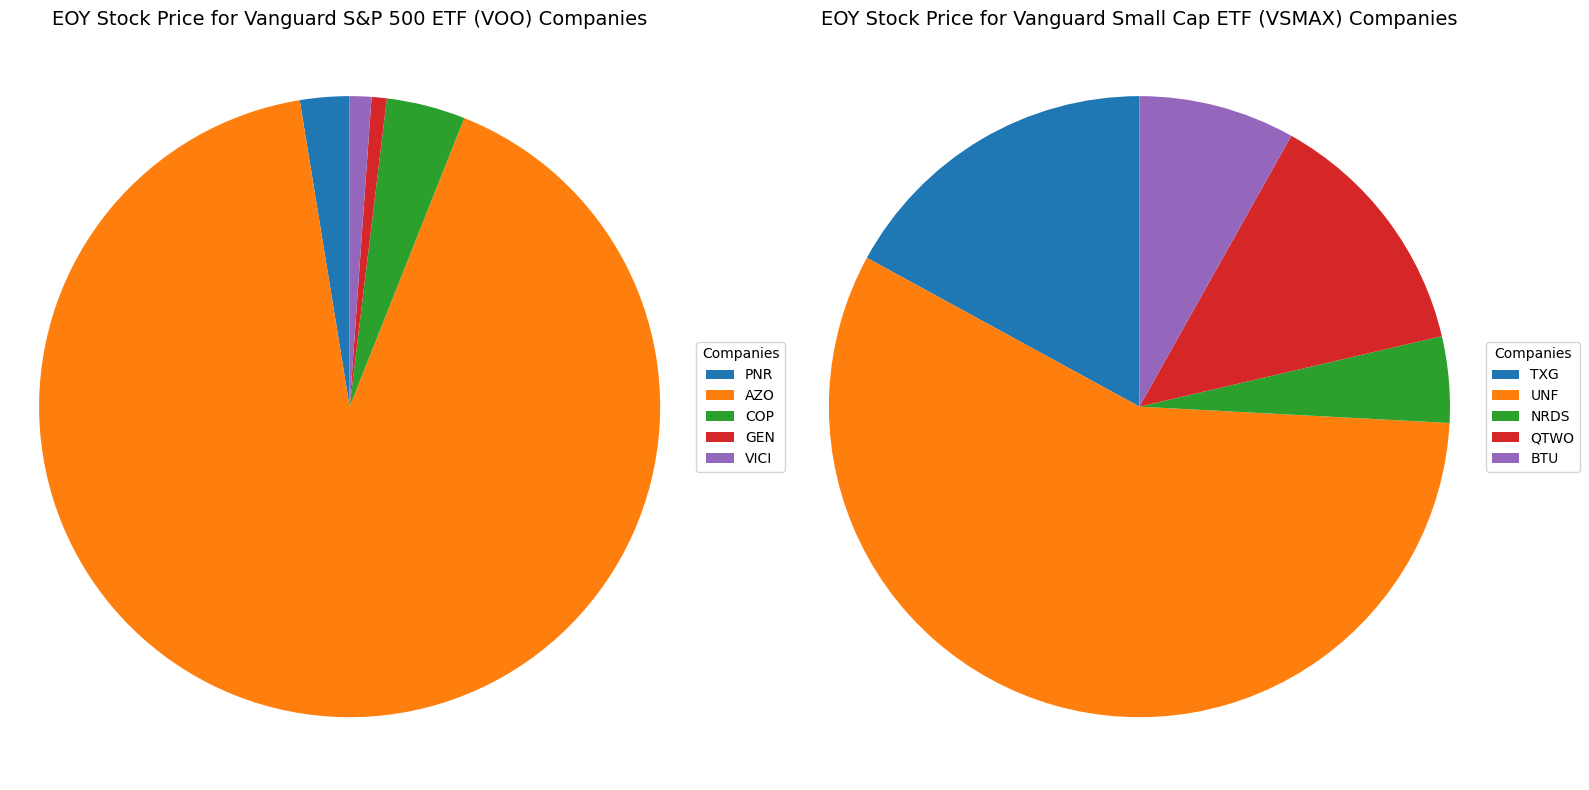

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming new_UNF_df is defined elsewhere in the code

# Extract EOY Stock Price for VOO companies
voo_companies = ['PNR', 'AZO', 'COP', 'GEN', 'VICI']
voo_data = {company: {'EOY Stock Price': data_frames[company].iloc[0]['EOY Stock Price']} for company in voo_companies}

# Extract EOY Stock Price for VSMAX companies
vsm_companies = ['TXG', 'UNF', 'NRDS', 'QTWO', 'BTU']
vsm_data = {}
for company in vsm_companies:
    if company == 'UNF':
        # Use the new_UNF_df for the EOY Stock Price of UNF
        try:
            eoy_stock_price = new_UNF_df['EOY Stock Price'].iloc[0]  # Adjusted to use new_UNF_df
            vsm_data[company] = {'EOY Stock Price': eoy_stock_price}
        except IndexError:
            print("Warning: 'EOY Stock Price' not found for UNF. Skipping.")
    else:
        try:
            eoy_stock_price = data_frames[company].iloc[0]['EOY Stock Price']
            vsm_data[company] = {'EOY Stock Price': eoy_stock_price}
        except KeyError:
            print(f"Warning: 'EOY Stock Price' not found for company {company}. Skipping.")

# Prepare values for pie charts
voo_values = [float(voo_data[company]['EOY Stock Price']) for company in voo_companies]
vsm_values = [float(str(vsm_data[company]['EOY Stock Price']).replace(',', '')) for company in vsm_companies if company in vsm_data and 'EOY Stock Price' in vsm_data[company]]

# Create subplots for pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Plot pie chart for VOO companies without percentages
ax1.pie(voo_values, autopct=None, startangle=90, textprops={'fontsize': 10})
ax1.set_title('EOY Stock Price for Vanguard S&P 500 ETF (VOO) Companies', fontsize=14)
ax1.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle
ax1.legend(voo_companies, title="Companies", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10)

# Plot pie chart for VSMAX companies without percentages
if vsm_values:
    ax2.pie(vsm_values, autopct=None, startangle=90, textprops={'fontsize': 10})
    ax2.set_title('EOY Stock Price for Vanguard Small Cap ETF (VSMAX) Companies', fontsize=14)
    ax2.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle
    ax2.legend([company for company in vsm_companies if company in vsm_data], title="Companies", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10)

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


A key takeaway from this graph is that VSMAX exhibits greater volatility than VOO for these ten stocks. This volatility is particularly noticeable from 2021 to 2023, where the graph forms a near-perfect “V” shape, illustrating that the average annual percentage change in prices fluctuated from over +30% in 2021, dropped to -5% in 2022, and rebounded to above +30% in 2023. In contrast, VOO showed a steady decline in growth during the same period, decreasing from over +40% to approximately +12% and then to -1%. While this analysis is based on just five companies from each index, the trend aligns with expectations for the broader indices, as “small cap” companies in VSMAX typically exhibit more volatility compared to the “large and mega-cap” companies in VOO and the S&P 500. Future analyses will focus on comparing these results with the performance of the entire VOO and VSMAX portfolios.

The second plot displays the annual percentage change in stock prices for each of the five stocks in VOO and VSMAX. This visualization complements the first plot by highlighting the specific components contributing to the higher and lower volatility of the respective indices. Although individual company names and tickers are not shown, it is clear that VSMAX experiences greater overall volatility across all its stocks. Notably, one VSMAX stock achieved a remarkable 180% increase, which likely contributed significantly to the portfolio's growth in 2021 and its overall volatility. This graph offers valuable insights into the individual stocks that affect the overall performance of the portfolios, and future analyses will seek to identify correlations between the price changes of these ten selected stocks and their respective portfolio performances.

###Q.3

1. What steps do we need to take to preprocess financial data
from multiple companies, compute relevant financial ratios, and view a comparison showing COGS and Revenue as a percentage of Net Income alongside stock price changes?

**Code Explanation**

The solution to this can be achieved through the code below and visualising the solution will give a better understanding to the comparison asked for in the above question and let us take VOO companies.

This code performs a series of data transformations and visualizations for multiple DataFrames representing different companies. It starts by defining a function to convert specific columns ('Sales/Revenue', 'Net Income', 'Cost of Goods Sold (COGS) incl. D&A') into numeric values to facilitate calculations. It then computes the percentage change in stock prices and calculates the ratios of Cost of Goods Sold (COGS) and Sales/Revenue as a percentage of Net Income for each company. The average values of these metrics are aggregated and stored in a new DataFrame, new_voo_df, which is then sorted alphabetically by company name. Finally, a comparative bar plot is created to visualize the average percentages of COGS and Revenue relative to Net Income, alongside a line graph displaying the average percentage change in stock price for the companies, using a secondary y-axis for clarity.



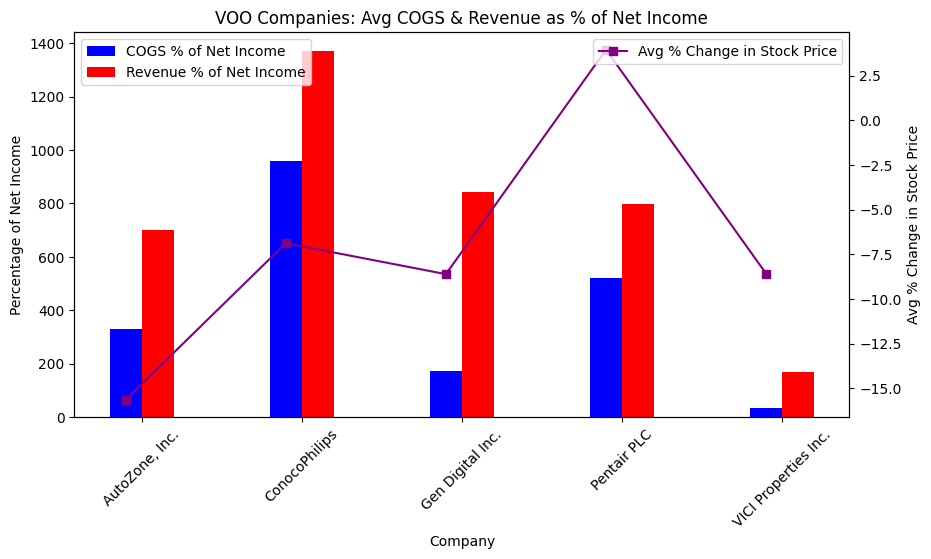

In [ ]:
# want data to actually be numbers for calculations (kept getting errors with values in columns)
def conversion(df, col):
    df[col] = pd.to_numeric(df[col])
    return df

# relevant columns
columns = ['Sales/Revenue', 'Net Income', 'Cost of Goods Sold (COGS) incl. D&A']

# was having issues with concatenation so didn't do it
for df in [new_PNR_df, new_AZO_df, new_COP_df, new_GEN_df, new_VICI_df]:
    for column in columns:
        conversion(df, column)


voo_dfs = [new_PNR_df, new_AZO_df, new_COP_df, new_GEN_df, new_VICI_df]
voo_data = []


for df in voo_dfs:
    # % change in stock price
    df['Price Change (%)'] = df.groupby('Company Name')['EOY Stock Price'].pct_change() * 100
    df.dropna(subset=['Price Change (%)'], inplace=True)
    df['Price Change (%)'] = pd.to_numeric(df['Price Change (%)'], errors='coerce')

    # COGS and Revenue as % of Net Income
    df['COGS % of Net Income'] = abs(df['Cost of Goods Sold (COGS) incl. D&A']) / abs(df['Net Income']) * 100
    df['Revenue % of Net Income'] = abs(df['Sales/Revenue']) / abs(df['Net Income']) * 100

    # Avg values within each company
    avg_data = df.groupby('Company Name').agg({
        'COGS % of Net Income': 'mean',
        'Revenue % of Net Income': 'mean',
        'Price Change (%)': 'mean'
    }).reset_index()

    voo_data.append(avg_data)

# realized need to concat all the data
new_voo_df = pd.concat(voo_data, ignore_index = True)  # wanted to make new index since concat multiple dfs (basically makes a new one and ignores old one)
new_voo_df.sort_values(by='Company Name', inplace=True)  # want companies in alphabetical order on x-axis

fig, ax = plt.subplots(figsize=(10, 5))


# want to compare COGS and Revenue as % of net income, so making comparative bar plots


width = 0.2  # random bar width
x = range(len(new_voo_df)) # 4 plots to account for percent changes across 5 years (AKA 4 years worth of data)

# bars position on the x-axis corresponding to their companies, height represents avg % of COGS relative to Net Income
ax.bar(x, new_voo_df['COGS % of Net Income'], width, label='COGS % of Net Income', color='blue')

# shifts position on x-axis to prevent overlap since comparison plot
# height represents avg % of Revenue relative to Net Income
ax.bar([p + width for p in x], new_voo_df['Revenue % of Net Income'], width, label='Revenue % of Net Income', color='red')

# using twinx() method to plot different datasets with different axis scales on same graph (basically y-axis will be the same for Revenue and COGS)
ax2 = ax.twinx() # ChatGPT helped here


# wanted to show avg % change in stock price across VOO companies
ax2.plot(x, new_voo_df['Price Change (%)'], color='purple', marker='s', label='Avg % Change in Stock Price')

ax.set_title('VOO Companies: Avg COGS & Revenue as % of Net Income')
ax.set_xlabel('Company')
ax.set_ylabel('Percentage of Net Income')
ax2.set_ylabel('Avg % Change in Stock Price')

# set x-ticks to be company names
ax.set_xticks([p + width / 2 for p in x])  # again, used this earlier from ChatGPT for spacing
ax.set_xticklabels(new_voo_df['Company Name'], rotation=45)

ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

On a thorough analysis of the graph, the data doesn't provide enough clarity to ascertain a relationship between stock price changes and revenue as a percentage of net income. Notably, companies like AutoZone and Pentair, which have high revenue percentages, still experience relatively negative stock price changes. This suggests that there may not be a consistent trend between revenue percentages and stock price changes among the four companies analyzed.

On the other hand, there appears to be a potential inverse relationship between COGS percentage and stock price changes, where a higher COGS percentage may correlate with a more negative change in stock price. For example, AutoZone, ConocoPhillips, and Pentair PLC have high COGS percentages relative to their net income and demonstrate significant negative changes in their stock prices. Interestingly, Gen Digital Inc. stands out as an outlier with its negative COGS and revenue percentages; however, it also exhibits the smallest change in stock price, which is slightly above 0%. This observation aligns well with the suggested inverse relationship.

###Q.4

1. Can we assess whether sales/revenue, net income, and total assets are good enough measures to analyze a stock by looking for any link between the End of Year (EOY) Stock Price and these metrics, especially for the Vanguard S&P 500 Companies ?

**Code Explanation**

This code generates a series of heatmaps that show the correlation between the end-of-year stock price and other financial metrics (sales/revenue, net income, and total assets) for the five different companies from the VOO. It creates a subplot for each company, displaying the correlation matrix for its selected financial data. Each heatmap is labeled with the company’s name and shows the correlation values, with the colors indicating the strength of the correlations. The overall title of the figure highlights that these matrices are for companies in the VOO.

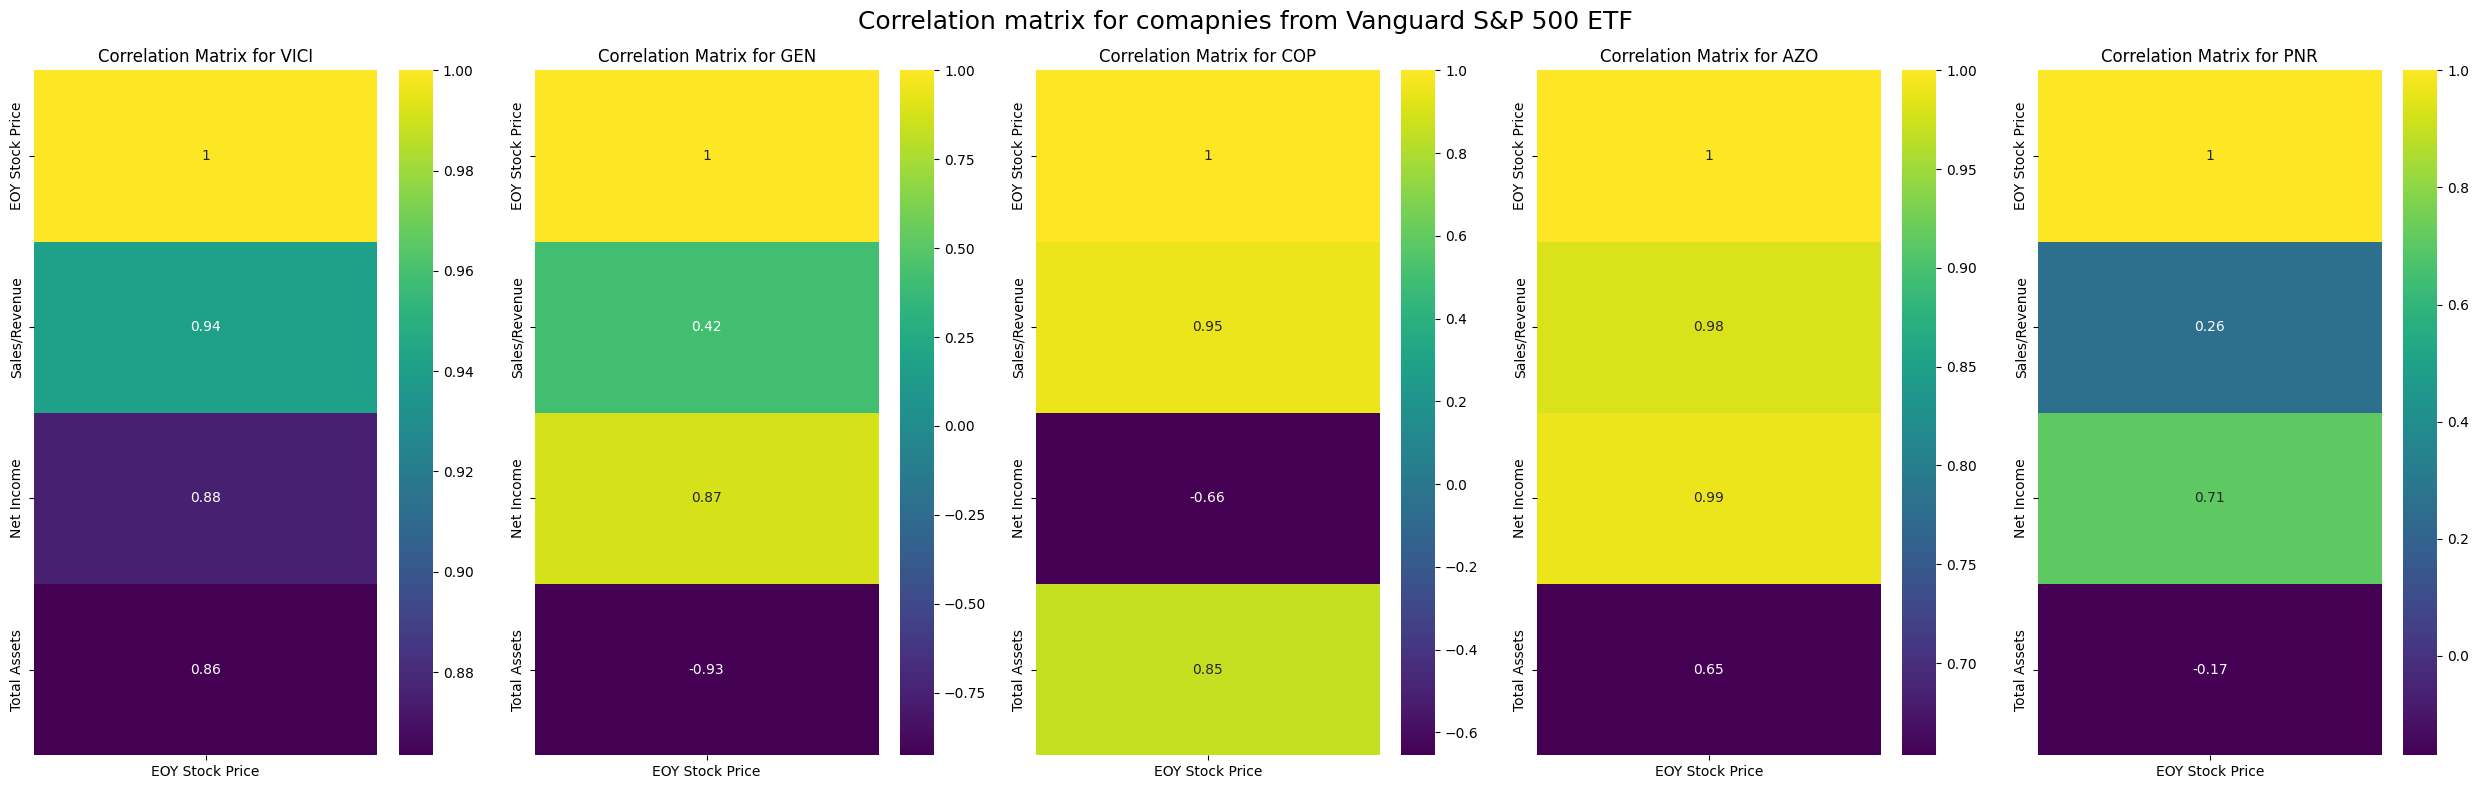

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(25, 8))
dataframes_all_VOO = [new_VICI_df, new_GEN_df, new_COP_df, new_AZO_df, new_PNR_df]
title_VOO = ['VICI','GEN','COP','AZO','PNR']
for i, df in enumerate(dataframes_all_VOO):
    df_relevant_VOO = df[['EOY Stock Price', 'Sales/Revenue', 'Net Income', 'Total Assets']]
    sns.heatmap(df_relevant_VOO.corr()[['EOY Stock Price']], annot=True, cmap="viridis",ax = axes[i])
    axes[i].set_title(f'Correlation Matrix for {title_VOO[i]}')
fig.suptitle('Correlation matrix for comapnies from Vanguard S&P 500 ETF',fontsize = 18)
plt.tight_layout()
plt.show()

The heatmaps show the correlation between **EOY Stock Price** and key financial metrics—**Sales/Revenue**, **Net Income**, and **Total Assets**—across five companies: VICI, GEN, COP, AZO, and PNR. For most companies, there is a strong positive correlation between the stock price and these financial metrics, particularly with **Sales/Revenue** and **Total Assets**. For instance, **VICI**, **COP**, **AZO**, and **PNR** exhibit strong correlations (above 0.8) between stock price and sales, suggesting that companies with higher sales tend to have higher stock prices. Net income also shows a positive relationship with stock price for most of these companies, especially **AZO** (0.99).

However, **GEN** stands out as an exception, showing a negative correlation between its stock price and both **Sales/Revenue** (-0.66) and **Net Income** (-0.12). This suggests that for GEN, factors other than these financial metrics may be influencing its stock price, or it might reflect some market inefficiency or specific circumstances within the company. In contrast, the other companies exhibit stronger, more consistent positive relationships between their financial performance and stock prices.

###Q.5

1. "A company's cash flow from investing activities can indicate how it's allocating cash for the long term." Based on this statement, the stock price amount should be directly correlated to the cash and short term investments. Investigate how much truth is present in this statement.

**Code Explanation**

The code generates two pie charts that visualize the distribution of "Cash & Short Term Investments" for companies in two Vanguard funds: VOO (S&P 500 ETF) and VSMAX (Small-Cap Index Fund). Each pie chart shows the proportional share of each company's cash and short-term investments relative to others in the fund. The first chart represents VOO companies, and the second one represents VSMAX companies. Both charts are labeled with titles, and each includes a legend displaying company names, allowing easy comparison of the financials between companies in each fund. The layout ensures a clean side-by-side comparison.


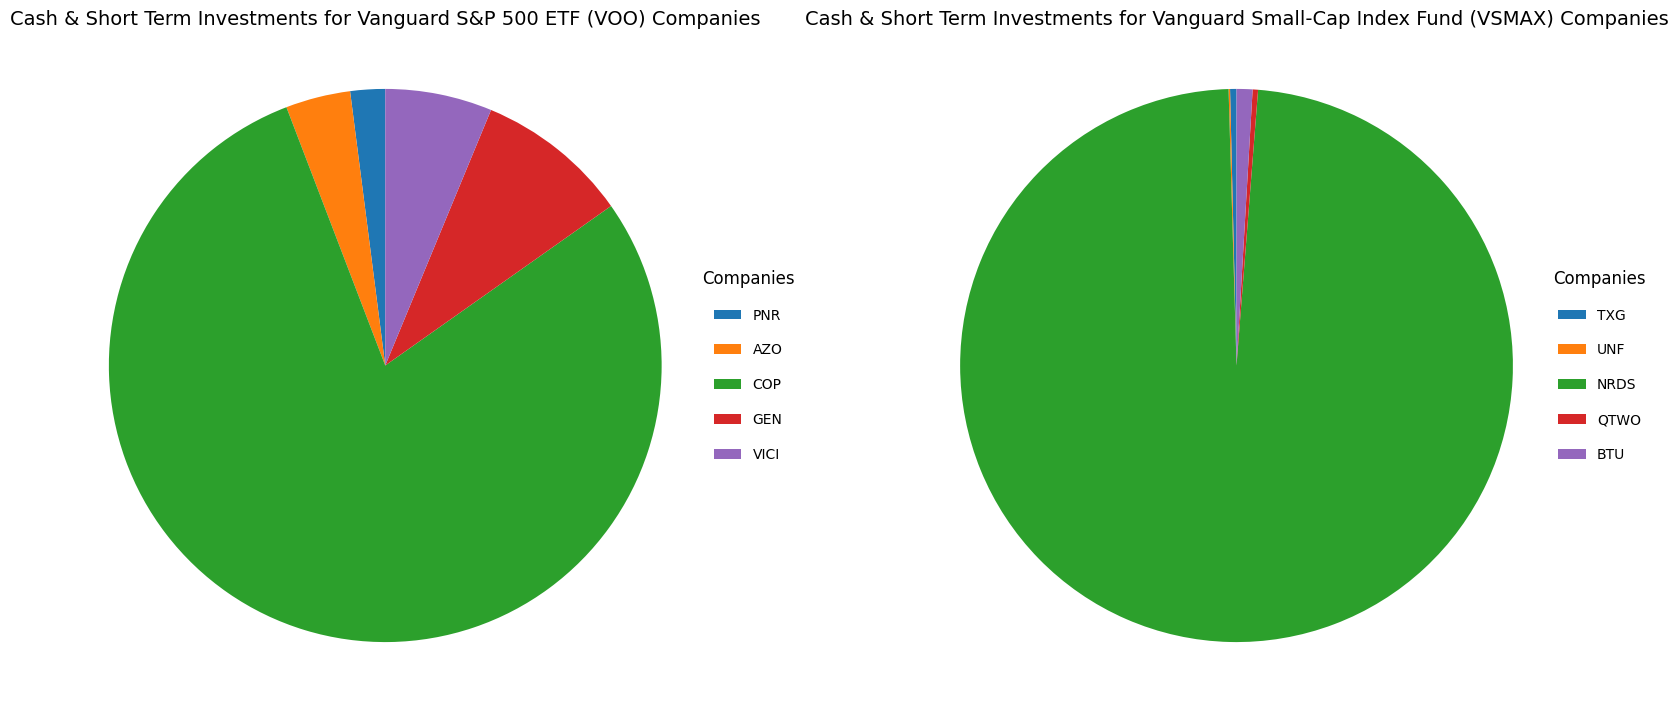

In [ ]:

sheets = ['TXG', 'COP', 'PNR', 'VICI', 'UNF', 'NRDS', 'GEN', 'BTU', 'QTWO', 'AZO']
data_frames = {sheet: pd.read_excel('/content/drive/MyDrive/BA-780-A6/Data_BA_780_A6 (2) Copy.xlsx', sheet_name=sheet) for sheet in sheets}

# Select relevant companies for VOO and VSMAX
voo_companies = ['PNR', 'AZO', 'COP', 'GEN', 'VICI']
vsm_companies = ['TXG', 'UNF', 'NRDS', 'QTWO', 'BTU']

# Extract Cash & Short Term Investments for VOO companies
voo_data = {company: {
    'Cash & Short Term Investments': data_frames[company].iloc[0]['Cash & Short Term Investments']
} for company in voo_companies}

# Extract Cash & Short Term Investments for VSMAX companies
vsm_data = {company: {
    'Cash & Short Term Investments': data_frames[company].iloc[0]['Cash & Short Term Investments']
} for company in vsm_companies}

# Prepare data for pie charts
voo_labels = voo_companies
voo_values = [voo_data[company]['Cash & Short Term Investments'] for company in voo_companies]

vsm_labels = vsm_companies
vsm_values = [float(str(vsm_data[company]['Cash & Short Term Investments']).replace(',', '')) for company in vsm_companies]

# Create subplots for pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Plot the first pie chart for VOO companies without showing labels or percentages
ax1.pie(voo_values, startangle=90, textprops={'fontsize': 10})
ax1.set_title('Cash & Short Term Investments for Vanguard S&P 500 ETF (VOO) Companies', fontsize=14)
ax1.axis('equal')

# Plot the second pie chart for VSMAX companies without showing labels or percentages
ax2.pie(vsm_values, startangle=90, textprops={'fontsize': 10})
ax2.set_title('Cash & Short Term Investments for Vanguard Small-Cap Index Fund (VSMAX) Companies', fontsize=14)
ax2.axis('equal')

# Add legends for both charts, showing company names and their corresponding values
ax1.legend(voo_labels, title="Companies", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10,
           labelspacing=1.5, title_fontsize='12', frameon=False)
ax2.legend(vsm_labels, title="Companies", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10,
           labelspacing=1.5, title_fontsize='12', frameon=False)

plt.tight_layout()
plt.subplots_adjust(top=0.85, wspace=0.4)
plt.show()



The two pie charts compare the cash and short-term investments for companies in the Vanguard S&P 500 ETF (VOO) and the Vanguard Small-Cap Index Fund (VSMAX). In the VOO chart (left), COP dominates with the largest portion, while GEN, VICI, AZO, and PNR contribute smaller portions of the total investments. In contrast, the VSMAX chart (right) shows NRDS holding the overwhelming majority of the cash and short-term investments, with much smaller slices represented by TXG, UNF, QTWO, and BTU. This comparison highlights the concentration of cash and short-term investments within a few dominant companies in both VOO and VSMAX, particularly COP for VOO and NRDS for VSMAX.

###Q.6

1. What relationship, if any, is observed between the percentage change in total liabilities and the percentage change in stock price across the listed companies?

**Code Explanation**

This code compares the percentage change in total liabilities (debt) and the percentage change in the end-of-year stock price for a set of companies. It iterates through each company's DataFrame, calculating the percentage changes in both debt and stock price. If necessary, it renames a column to ensure consistent data, then matches the lengths of the debt and stock price percentage change series to ensure proper comparison. The results are stored in lists for plotting. Finally, it creates a scatter plot showing the relationship between the percentage changes in debt and stock price for each company, using different colors to differentiate between companies.


[ ]


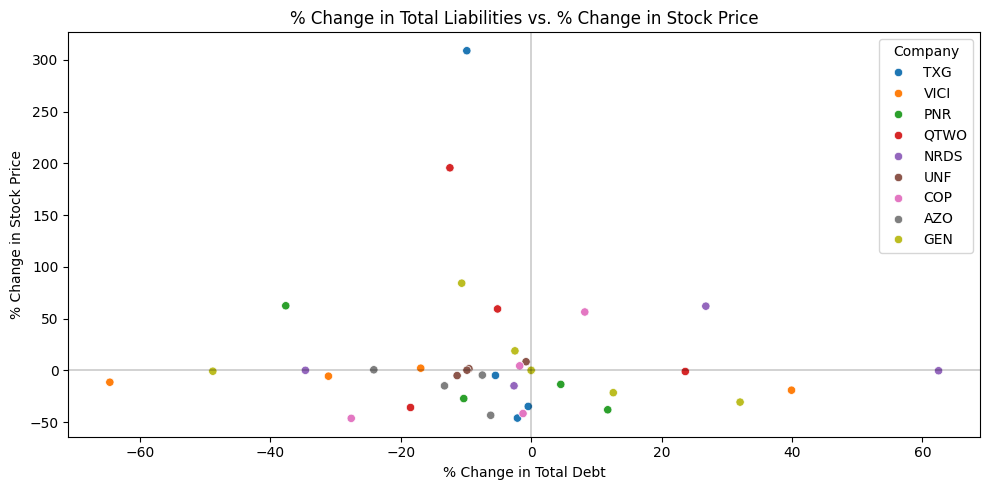

In [ ]:
# excludes BTU
companies = {'TXG': new_TXG_df,
             'VICI': new_VICI_df,
             'PNR': new_PNR_df,
             'QTWO': new_QTWO_df,
             'NRDS': new_NRDS_df,
             'UNF': new_UNF_df,
             'COP': new_COP_df,
             'AZO': new_AZO_df,
             'GEN': new_GEN_df}

percentage_change_debt = []
percentage_change_stock = []
company_code = []



for company, df in companies.items():
    # rename 'EOY Stock Price_x' to 'EOY Stock Price' for cases like PNR
    if 'EOY Stock Price_x' in df.columns:
        df.rename(columns={'EOY Stock Price_x': 'EOY Stock Price'}, inplace=True)

    pct_change_debt = df['Total Liabilities'].pct_change().dropna() * 100  # % change in debt
    pct_change_stock = df['EOY Stock Price'].pct_change().dropna() * 100  # % change in price

    # need to make sure there is the same amount of data for % change in debt and price
    min_len = min(len(pct_change_debt), len(pct_change_stock))  # minimum length based on smallest series

    # keeps the same associated values from the smallest series for % change in debt and price
    pct_change_debt = pct_change_debt[-min_len:]
    pct_change_stock = pct_change_stock[-min_len:]

    # add values to new lists
    percentage_change_debt.extend(pct_change_debt)
    percentage_change_stock.extend(pct_change_stock)
    company_code.extend([company] * len(pct_change_debt))  # adds company code to match the same number of entries for that company for % change in debt (which is same as stock price)


# makes it easier to plot
data = pd.DataFrame({
    '% Change in Debt': percentage_change_debt,
    '% Change in Stock Price': percentage_change_stock,
    'Company': company_code
})


plt.figure(figsize=(10, 5))
sns.scatterplot(x='% Change in Debt', y='% Change in Stock Price', hue='Company', data=data, palette='tab10')


# customizations
plt.xlabel('% Change in Total Debt')
plt.ylabel('% Change in Stock Price')
plt.title('% Change in Total Liabilities vs. % Change in Stock Price')


# add axes at y=0 and x=0 since some changes are negative
plt.axhline(y=0, color='black', linewidth=.25, linestyle='-')
plt.axvline(x=0, color='black', linewidth=.25, linestyle='-')
plt.tight_layout()

plt.show()


Most data points cluster around the lower portion of the y-axis, suggesting that a significant number of companies experienced a minimal change in stock prices regardless of the change in total liabilities. There are potential outliers in some companies such as TXG, BTU, and QTWO that display significant positive changes in stock price that doesn't align directly with liabilities. There is no clear linear correlation between changes in total liabilities and stock prices. Companies can be influenced by other factors affecting their stock prices independently of their debt.

###Q.7
1. How does the average capital structure of VOO companies (in terms of debt-to-value and equity-to-value ratios) compare to VSMAX companies over the period from 2019 to 2023?

**Code Explanation**
This code calculates the capital structure (debt-to-value ratio, D/V, and equity-to-value ratio, E/V) for a group of VOO companies over several years. It computes the market capitalization (using stock price and shares outstanding) and total value (market cap plus total liabilities) for each company and year. From this, it calculates the proportion of debt (D/V) and equity (E/V) in the total value. After collecting these values across all companies and years, it computes the average D/V and E/V ratios. Finally, it generates a pie chart to visualize the average proportions of debt and equity in the companies' capital structure over the period from 2019 to 2023

<ipython-input-37-c51776d77814>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Market Cap'] = df['EOY Stock Price'] * df['Basic Shares Outstanding']  # market cap (AKA equity)
<ipython-input-37-c51776d77814>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total Value'] = df['Total Liabilities'] + df['Market Cap']  # total value
<ipython-input-37-c51776d77814>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

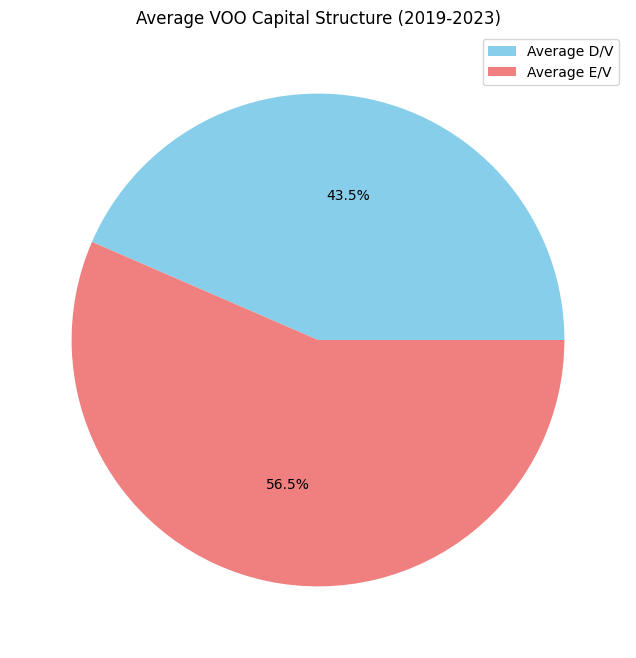

In [ ]:
# VOO companies
VOO_companies = {
    'PNR': new_PNR_df,
    'AZO': new_AZO_df,
    'COP': new_COP_df,
    'GEN': new_GEN_df,
    'VICI': new_VICI_df
}

# empty lists to store calculations
market_cap = []
total_value = []
D_value = []
E_value = []
year = []


for company, df in VOO_companies.items():
  df['Market Cap'] = df['EOY Stock Price'] * df['Basic Shares Outstanding']  # market cap (AKA equity)
  df['Total Value'] = df['Total Liabilities'] + df['Market Cap']  # total value
  df['D/V'] = df['Total Liabilities'] / df['Total Value']  # D/V
  df['E/V'] = df['Market Cap'] / df['Total Value']  # E/V

  # store results with their corresponding year
  market_cap.extend(df['Market Cap'].tolist())
  total_value.extend(df['Total Value'].tolist())
  D_value.extend(df['D/V'].tolist())
  E_value.extend(df['E/V'].tolist())
  year.extend(df['Year'].tolist())

# averages for D/V and E/V across all years
average_dv = sum(D_value) / len(D_value)
average_ev = sum(E_value) / len(E_value)


averages = [average_dv, average_ev]
labels = ['Average D/V', 'Average E/V']

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(averages, colors=['skyblue', 'lightcoral'], autopct='%1.1f%%')  # had ChatGPT help with adding % in slices
plt.title('Average VOO Capital Structure (2019-2023)')
plt.legend(labels, loc='upper right')
plt.show()


The chart indicates that a majority of the capital structure (53.5%) is derived from equity, while debt accounts for a smaller portion (46.5%). This distribution suggests a relatively balanced approach to financing among the VOO companies, with a slightly higher reliance on equity compared to debt. The reliance on equity may indicate a lower financial risk for the VOO companies, as they might be less dependent on borrowed funds. This structure could be advantageous in periods of economic uncertainty, as it provides more flexibility and reduces the burden of fixed debt payments.

###Q.8
1. What are the average debt-to-value (D/V) and equity-to-value (E/V) ratios for the VSMAX companies from 2019 to 2023?

**Code Explanation**
This code calculates the capital structure (debt-to-value ratio, D/V, and equity-to-value ratio, E/V) for a group of VOO companies over several years. It computes the market capitalization (using stock price and shares outstanding) and total value (market cap plus total liabilities) for each company and year. From this, it calculates the proportion of debt (D/V) and equity (E/V) in the total value. After collecting these values across all companies and years, it computes the average D/V and E/V ratios. Finally, it generates a pie chart to visualize the average proportions of debt and equity in the companies' capital structure over the period from 2019 to 2023.

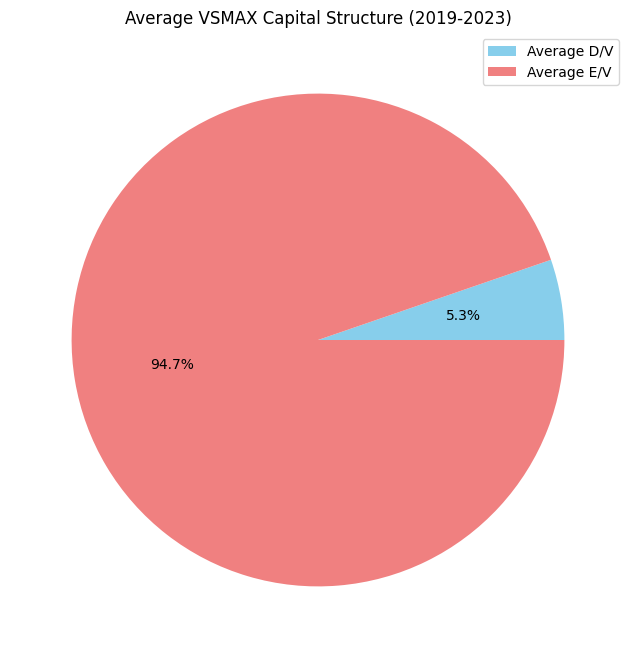

In [ ]:
# VSMAX companies
VSMAX_companies = {
    'TXG': new_TXG_df,
    'UNF': new_UNF_df,
    'NRDS': new_NRDS_df,
    'QTWO': new_QTWO_df,
}

# empty lists to store calculations
market_cap = []
total_value = []
D_value = []
E_value = []
year = []


for company, df in VSMAX_companies.items():
  df['Market Cap'] = df['EOY Stock Price'] * df['Basic Shares Outstanding']  # market cap (AKA equity)
  df['Total Value'] = df['Total Liabilities'] + df['Market Cap']  # total value
  df['D/V'] = df['Total Liabilities'] / df['Total Value']  # D/V
  df['E/V'] = df['Market Cap'] / df['Total Value']  # E/V

  # store results with their corresponding year
  market_cap.extend(df['Market Cap'].tolist())
  total_value.extend(df['Total Value'].tolist())
  D_value.extend(df['D/V'].tolist())
  E_value.extend(df['E/V'].tolist())
  year.extend(df['Year'].tolist())

# averages for D/V and E/V across all years
average_dv = sum(D_value) / len(D_value)
average_ev = sum(E_value) / len(E_value)


averages = [average_dv, average_ev]
labels = ['Average D/V', 'Average E/V']

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(averages, colors=['skyblue', 'lightcoral'], autopct='%1.1f%%')  # had ChatGPT help with adding % in slices
plt.title('Average VSMAX Capital Structure (2019-2023)')
plt.legend(labels, loc='upper right')
plt.show()

The data reveals a significant reliance on equity financing, with 94.7% of the capital structure derived from equity compared to only 5.3% from debt. This stark contrast suggests a highly equity-driven capital structure for the VSMAX companies. The minimal reliance on debt indicates a very low financial risk for these companies, which may provide them with greater flexibility and stability during economic fluctuations. This capital structure could position the VSMAX companies favorably for growth, as they are less burdened by debt obligations.

### Q.9

1. How does ROIC vary between companies that belong to different funds (VSMAX vs. VOO)?

**Code Explanation**

This code calculates the Return on Invested Capital (ROIC) for several companies by pulling relevant financial data from their respective DataFrames. It computes the Net Operating Profit After Tax (NOPAT), calculates invested capital (by summing net working capital, property, plant & equipment, and other assets), and then determines ROIC as the ratio of NOPAT to invested capital. The results are combined into a single DataFrame. The code then generates a bar chart that shows the average annual ROIC for each company from 2019 to 2023, color-coding the bars based on the company’s fund membership (VOO or VSMAX).

In [ ]:
#### Creating TXG ROIC DF ####

# Pulling in Relevant Columns
TXG_roic_df = new_TXG_df[['Code', 'Year', 'EOY Stock Price', 'EBIT', 'Total Current Assets','Cash & Short Term Investments','Total Current Liabilities', 'Short Term Debt', 'Net Property, Plant & Equipment', 'Other Assets']]

# Convert FSLIs into same units. Need to use logic to normalize.
TXG_roic_df[['Total Current Assets', 'Total Current Liabilities', 'Short Term Debt', 'Net Property, Plant & Equipment', 'Other Assets']] = TXG_roic_df[['Total Current Assets', 'Total Current Liabilities', 'Short Term Debt', 'Net Property, Plant & Equipment', 'Other Assets']] * 1000

# Add Fund/Index Distinction
TXG_roic_df['Fund Membership'] = 'VSMAX'

# Create NOPAT. No tax applied because EBIT is negative.
TXG_roic_df['NOPAT'] = TXG_roic_df.pop('EBIT')

# Create NWC
TXG_roic_df['NWC'] = (TXG_roic_df['Total Current Assets'] - TXG_roic_df['Cash & Short Term Investments']) - (TXG_roic_df['Total Current Liabilities'] - TXG_roic_df['Short Term Debt'])
TXG_roic_df = TXG_roic_df.drop(['Total Current Assets', 'Cash & Short Term Investments', 'Total Current Liabilities', 'Short Term Debt'], axis=1)

# Create Invested Capital
TXG_roic_df['Invested Capital'] = TXG_roic_df['NWC'] + TXG_roic_df['Net Property, Plant & Equipment'] + TXG_roic_df['Other Assets']
TXG_roic_df = TXG_roic_df.drop(['NWC', 'Net Property, Plant & Equipment', 'Other Assets'], axis=1)

# Calculate ROIC
TXG_roic_df['ROIC %'] = (TXG_roic_df['NOPAT'] / TXG_roic_df['Invested Capital']) * 100

TXG_roic_df

#### Creating COP ROIC DF ####

# Pulling in Relevant Columns
COP_roic_df = new_COP_df[['Code', 'Year', 'EOY Stock Price', 'EBIT', 'Total Current Assets','Cash & Short Term Investments','Total Current Liabilities', 'Short Term Debt', 'Net Property, Plant & Equipment', 'Other Assets']]

# Add Fund/Index Distinction
COP_roic_df['Fund Membership'] = 'VOO'
COP_roic_df

# Convert FSLIs into same units. Need to use logic to normalize.
COP_roic_df['EBIT'] = COP_roic_df['EBIT'] * 100

# Create NOPAT.
COP_roic_df['NOPAT'] = (COP_roic_df['EBIT'] * 0.79)
COP_roic_df = COP_roic_df.drop('EBIT', axis=1)

# Create NWC
COP_roic_df['NWC'] = (COP_roic_df['Total Current Assets'] - COP_roic_df['Cash & Short Term Investments']) - (COP_roic_df['Total Current Liabilities'] - COP_roic_df['Short Term Debt'])
COP_roic_df = COP_roic_df.drop(['Total Current Assets', 'Cash & Short Term Investments', 'Total Current Liabilities', 'Short Term Debt'], axis=1)

# Create Invested Capital
COP_roic_df['Invested Capital'] = COP_roic_df['NWC'] + COP_roic_df['Net Property, Plant & Equipment'] + COP_roic_df['Other Assets']
COP_roic_df = COP_roic_df.drop(['NWC', 'Net Property, Plant & Equipment', 'Other Assets'], axis=1)

# Calculate ROIC
COP_roic_df['ROIC %'] = (COP_roic_df['NOPAT'] / COP_roic_df['Invested Capital']) * 100

COP_roic_df

#### Creating PNR ROIC DF ####

# Rename "EOY Stock Price_x" column "EOY Stock Price"
new_PNR_df.rename(columns={'EOY Stock Price_x': 'EOY Stock Price'}, inplace=True)

# Pulling in Relevant Columns
PNR_roic_df = new_PNR_df[['Code', 'Year', 'EOY Stock Price', 'EBIT', 'Total Current Assets','Cash & Short Term Investments','Total Current Liabilities', 'Short Term Debt', 'Net Property, Plant & Equipment', 'Other Assets']]

# Add Fund/Index Distinction
PNR_roic_df['Fund Membership'] = 'VOO'
PNR_roic_df

# Create NOPAT.
PNR_roic_df['NOPAT'] = (PNR_roic_df['EBIT'] * 0.79)
PNR_roic_df = PNR_roic_df.drop('EBIT', axis=1)

# Create NWC
PNR_roic_df['NWC'] = (PNR_roic_df['Total Current Assets'] - PNR_roic_df['Cash & Short Term Investments']) - (PNR_roic_df['Total Current Liabilities'] - PNR_roic_df['Short Term Debt'])
PNR_roic_df = PNR_roic_df.drop(['Total Current Assets', 'Cash & Short Term Investments', 'Total Current Liabilities', 'Short Term Debt'], axis=1)

# Create Invested Capital
PNR_roic_df['Invested Capital'] = PNR_roic_df['NWC'] + PNR_roic_df['Net Property, Plant & Equipment'] + PNR_roic_df['Other Assets']
PNR_roic_df = PNR_roic_df.drop(['NWC', 'Net Property, Plant & Equipment', 'Other Assets'], axis=1)

# Calculate ROIC
PNR_roic_df['ROIC %'] = (PNR_roic_df['NOPAT'] / PNR_roic_df['Invested Capital']) * 100

<ipython-input-41-d2b91d2afb79>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TXG_roic_df[['Total Current Assets', 'Total Current Liabilities', 'Short Term Debt', 'Net Property, Plant & Equipment', 'Other Assets']] = TXG_roic_df[['Total Current Assets', 'Total Current Liabilities', 'Short Term Debt', 'Net Property, Plant & Equipment', 'Other Assets']] * 1000
<ipython-input-41-d2b91d2afb79>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TXG_roic_df['Fund Membership'] = 'VSMAX'
<ipython-input-41-d2b91d2

In [ ]:
#### Creating UNF ROIC DF ####

# Pulling in Relevant Columns
UNF_roic_df = new_UNF_df[['Code', 'Year', 'EOY Stock Price', 'EBIT', 'Total Current Assets','Cash & Short Term Investments','Total Current Liabilities', 'Short Term Debt', 'Net Property, Plant & Equipment', 'Other Assets']]

# Add Fund/Index Distinction
UNF_roic_df['Fund Membership'] = 'VSMAX'
UNF_roic_df

# Create NOPAT.
UNF_roic_df['NOPAT'] = (UNF_roic_df['EBIT'] * 0.79)
UNF_roic_df = UNF_roic_df.drop('EBIT', axis=1)

# Create NWC
UNF_roic_df['NWC'] = (UNF_roic_df['Total Current Assets'] - UNF_roic_df['Cash & Short Term Investments']) - (UNF_roic_df['Total Current Liabilities'] - UNF_roic_df['Short Term Debt'])
UNF_roic_df = UNF_roic_df.drop(['Total Current Assets', 'Cash & Short Term Investments', 'Total Current Liabilities', 'Short Term Debt'], axis=1)

# Create Invested Capital
UNF_roic_df['Invested Capital'] = UNF_roic_df['NWC'] + UNF_roic_df['Net Property, Plant & Equipment'] + UNF_roic_df['Other Assets']
UNF_roic_df = UNF_roic_df.drop(['NWC', 'Net Property, Plant & Equipment', 'Other Assets'], axis=1)

# Calculate ROIC
UNF_roic_df['ROIC %'] = (UNF_roic_df['NOPAT'] / UNF_roic_df['Invested Capital']) * 100

UNF_roic_df


#### Creating NRDS ROIC DF ####

# Pulling in Relevant Columns
NRDS_roic_df = new_NRDS_df[['Code', 'Year', 'EOY Stock Price', 'EBIT', 'Total Current Assets','Cash & Short Term Investments','Total Current Liabilities', 'Short Term Debt', 'Net Property, Plant & Equipment', 'Other Assets']]

# Add Fund/Index Distinction
NRDS_roic_df['Fund Membership'] = 'VSMAX'
NRDS_roic_df

# Create NOPAT.
NRDS_roic_df['NOPAT'] = (NRDS_roic_df['EBIT'] * 0.79)
NRDS_roic_df = NRDS_roic_df.drop('EBIT', axis=1)

# Create NWC
NRDS_roic_df['NWC'] = (NRDS_roic_df['Total Current Assets'] - NRDS_roic_df['Cash & Short Term Investments']) - (NRDS_roic_df['Total Current Liabilities'] - NRDS_roic_df['Short Term Debt'])
NRDS_roic_df = NRDS_roic_df.drop(['Total Current Assets', 'Cash & Short Term Investments', 'Total Current Liabilities', 'Short Term Debt'], axis=1)

# Create Invested Capital
NRDS_roic_df['Invested Capital'] = NRDS_roic_df['NWC'] + NRDS_roic_df['Net Property, Plant & Equipment'] + NRDS_roic_df['Other Assets']
NRDS_roic_df = NRDS_roic_df.drop(['NWC', 'Net Property, Plant & Equipment', 'Other Assets'], axis=1)

# Calculate ROIC
NRDS_roic_df['ROIC %'] = (NRDS_roic_df['NOPAT'] / NRDS_roic_df['Invested Capital']) * 100

NRDS_roic_df


#### Creating GEN ROIC DF ####

# Rename "Company Code" column "Code"
new_GEN_df.rename(columns={'Company Code': 'Code'}, inplace=True)

# Pulling in Relevant Columns
GEN_roic_df = new_GEN_df[['Code', 'Year', 'EOY Stock Price', 'EBIT', 'Total Current Assets','Cash & Short Term Investments','Total Current Liabilities', 'Short Term Debt', 'Net Property, Plant & Equipment', 'Other Assets']]

# Add Fund/Index Distinction
GEN_roic_df['Fund Membership'] = 'VOO'
GEN_roic_df

# Create NOPAT.
GEN_roic_df['NOPAT'] = (GEN_roic_df['EBIT'] * 0.79)
GEN_roic_df = GEN_roic_df.drop('EBIT', axis=1)

# Create NWC
GEN_roic_df['NWC'] = (GEN_roic_df['Total Current Assets'] - GEN_roic_df['Cash & Short Term Investments']) - (GEN_roic_df['Total Current Liabilities'] - GEN_roic_df['Short Term Debt'])
GEN_roic_df = GEN_roic_df.drop(['Total Current Assets', 'Cash & Short Term Investments', 'Total Current Liabilities', 'Short Term Debt'], axis=1)

# Create Invested Capital
GEN_roic_df['Invested Capital'] = GEN_roic_df['NWC'] + GEN_roic_df['Net Property, Plant & Equipment'] + GEN_roic_df['Other Assets']
GEN_roic_df = GEN_roic_df.drop(['NWC', 'Net Property, Plant & Equipment', 'Other Assets'], axis=1)

# Calculate ROIC
GEN_roic_df['ROIC %'] = (GEN_roic_df['NOPAT'] / GEN_roic_df['Invested Capital']) * 100

GEN_roic_df


#### Creating BTU ROIC DF ####

# Rename "Company Code" column "Code"
new_BTU_df.rename(columns={'Company Code': 'Code'}, inplace=True)

# Pulling in Relevant Columns
BTU_roic_df = new_BTU_df[['Code', 'Year', 'EOY Stock Price', 'EBIT', 'Total Current Assets','Cash & Short Term Investments','Total Current Liabilities', 'Short Term Debt', 'Net Property, Plant & Equipment', 'Other Assets']]

# Add Fund/Index Distinction
BTU_roic_df['Fund Membership'] = 'VSMAX'
BTU_roic_df

# Create NOPAT.
BTU_roic_df['NOPAT'] = (BTU_roic_df['EBIT'] * 0.79)
BTU_roic_df = BTU_roic_df.drop('EBIT', axis=1)

# Create NWC
BTU_roic_df['NWC'] = (BTU_roic_df['Total Current Assets'] - BTU_roic_df['Cash & Short Term Investments']) - (BTU_roic_df['Total Current Liabilities'] - BTU_roic_df['Short Term Debt'])
BTU_roic_df = BTU_roic_df.drop(['Total Current Assets', 'Cash & Short Term Investments', 'Total Current Liabilities', 'Short Term Debt'], axis=1)

# Create Invested Capital
BTU_roic_df['Invested Capital'] = BTU_roic_df['NWC'] + BTU_roic_df['Net Property, Plant & Equipment'] + BTU_roic_df['Other Assets']
BTU_roic_df = BTU_roic_df.drop(['NWC', 'Net Property, Plant & Equipment', 'Other Assets'], axis=1)

# Calculate ROIC
BTU_roic_df['ROIC %'] = (BTU_roic_df['NOPAT'] / BTU_roic_df['Invested Capital']) * 100

BTU_roic_df


#### Creating QTWO ROIC DF ####

# Pulling in Relevant Columns
QTWO_roic_df = new_QTWO_df[['Code', 'Year', 'EOY Stock Price', 'EBIT', 'Total Current Assets','Cash & Short Term Investments','Total Current Liabilities', 'Short Term Debt', 'Net Property, Plant & Equipment', 'Other Assets']]

# Add Fund/Index Distinction
QTWO_roic_df['Fund Membership'] = 'VSMAX'
QTWO_roic_df

# Convert FSLIs into same units. Need to use logic to normalize.
QTWO_roic_df[['Total Current Assets', 'Total Current Liabilities', 'Short Term Debt', 'Net Property, Plant & Equipment', 'Other Assets']] = QTWO_roic_df[['Total Current Assets', 'Total Current Liabilities', 'Short Term Debt', 'Net Property, Plant & Equipment', 'Other Assets']] * 1000

# Create NOPAT.
QTWO_roic_df['NOPAT'] = (QTWO_roic_df['EBIT'] * 0.79)
QTWO_roic_df = QTWO_roic_df.drop('EBIT', axis=1)

# Create NWC
QTWO_roic_df['NWC'] = (QTWO_roic_df['Total Current Assets'] - QTWO_roic_df['Cash & Short Term Investments']) - (QTWO_roic_df['Total Current Liabilities'] - QTWO_roic_df['Short Term Debt'])
QTWO_roic_df = QTWO_roic_df.drop(['Total Current Assets', 'Cash & Short Term Investments', 'Total Current Liabilities', 'Short Term Debt'], axis=1)

# Create Invested Capital
QTWO_roic_df['Invested Capital'] = QTWO_roic_df['NWC'] + QTWO_roic_df['Net Property, Plant & Equipment'] + QTWO_roic_df['Other Assets']
QTWO_roic_df = QTWO_roic_df.drop(['NWC', 'Net Property, Plant & Equipment', 'Other Assets'], axis=1)

# Calculate ROIC
QTWO_roic_df['ROIC %'] = (QTWO_roic_df['NOPAT'] / QTWO_roic_df['Invested Capital']) * 100

QTWO_roic_df


#### Creating AZO ROIC DF ####

# Pulling in Relevant Columns
AZO_roic_df = new_AZO_df[['Code', 'Year', 'EOY Stock Price', 'EBIT', 'Total Current Assets','Cash & Short Term Investments','Total Current Liabilities', 'Short Term Debt', 'Net Property, Plant & Equipment', 'Other Assets']]

# Add Fund/Index Distinction
AZO_roic_df['Fund Membership'] = 'VOO'
AZO_roic_df

# Convert FSLIs into Thousands. Numbers getting messed up in translation. Need to use logic to normalize.
#AZO_roic_df['EBIT'] = AZO_roic_df['EBIT'] * 10
#AZO_roic_df[['Total Current Assets', 'Total Current Liabilities', 'Short Term Debt', 'Net Property, Plant & Equipment', 'Other Assets']] = AZO_roic_df[['Total Current Assets', 'Total Current Liabilities', 'Short Term Debt', 'Net Property, Plant & Equipment', 'Other Assets']] * 10

# Create NOPAT.
AZO_roic_df['NOPAT'] = (AZO_roic_df['EBIT'] * 0.79)
AZO_roic_df = AZO_roic_df.drop('EBIT', axis=1)

# Create NWC
AZO_roic_df['NWC'] = (AZO_roic_df['Total Current Assets'] - AZO_roic_df['Cash & Short Term Investments']) - (AZO_roic_df['Total Current Liabilities'] - AZO_roic_df['Short Term Debt'])
AZO_roic_df = AZO_roic_df.drop(['Total Current Assets', 'Cash & Short Term Investments', 'Total Current Liabilities', 'Short Term Debt'], axis=1)

# Create Invested Capital
AZO_roic_df['Invested Capital'] = AZO_roic_df['NWC'] + AZO_roic_df['Net Property, Plant & Equipment'] + AZO_roic_df['Other Assets']
AZO_roic_df = AZO_roic_df.drop(['NWC', 'Net Property, Plant & Equipment', 'Other Assets'], axis=1)

# Calculate ROIC
AZO_roic_df['ROIC %'] = (AZO_roic_df['NOPAT'] / AZO_roic_df['Invested Capital']) * 100

<ipython-input-42-fdabb594ee00>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UNF_roic_df['Fund Membership'] = 'VSMAX'
<ipython-input-42-fdabb594ee00>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UNF_roic_df['NOPAT'] = (UNF_roic_df['EBIT'] * 0.79)
<ipython-input-42-fdabb594ee00>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

,Code,Year,EOY Stock Price,Fund Membership,NOPAT,Invested Capital,ROIC %
1,AZO,2022,2466.18,VOO,2584.09,6198.00,41.692320
2,AZO,2021,2096.39,VOO,2326.55,5255.00,44.273073
3,AZO,2020,1185.44,VOO,1976.58,5885.00,33.586746
4,AZO,2019,1191.31,VOO,1745.11,2944.25,59.271801


In [ ]:
#### Create combined ROIC DF ####

roic_df = pd.concat([TXG_roic_df, COP_roic_df, PNR_roic_df, UNF_roic_df, NRDS_roic_df, GEN_roic_df, BTU_roic_df, QTWO_roic_df, AZO_roic_df], ignore_index=True)
roic_df
roic_df.to_csv('roic_df.csv', index=False)

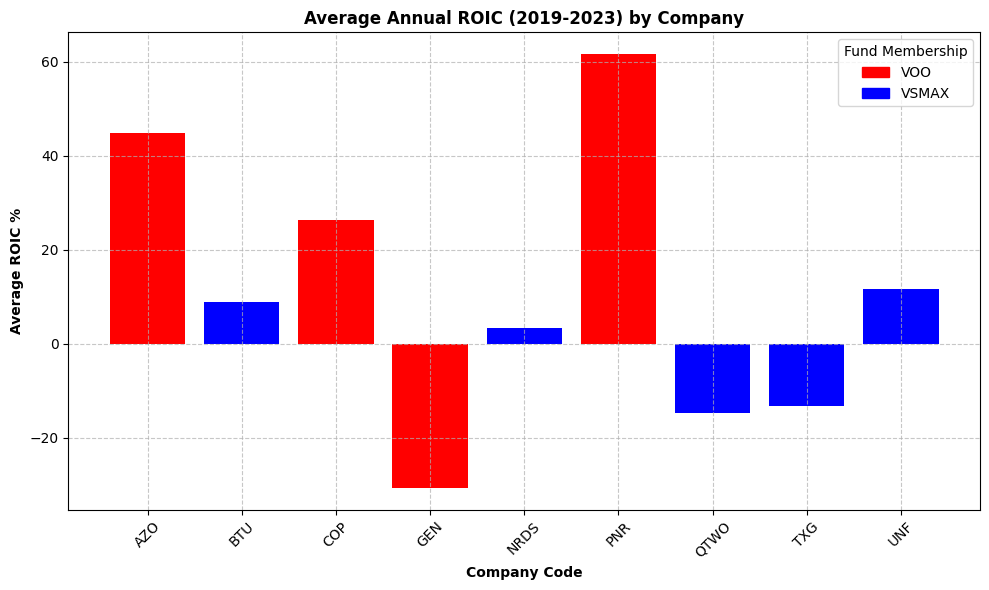

In [ ]:
### Graph of Individual Companies' Average Annual ROIC (Color-coded by Fund Memebership) ###
import matplotlib.pyplot as plt

# Define colors for the bars based on Fund Membership
colors = {'VOO': 'red', 'VSMAX': 'blue'}

# Calculate the average ROIC for each company ('Code') from 2019 to 2023
average_roic_df = roic_df[roic_df['Year'].between(2019, 2023)].groupby(['Code', 'Fund Membership'])['ROIC %'].mean().reset_index()

# Plot a bar chart of the average annual ROIC for each company
plt.figure(figsize=(10, 6))

# Plot each company's average ROIC and color by their Fund Membership
plt.bar(average_roic_df['Code'], average_roic_df['ROIC %'],
        color=[colors[fund] for fund in average_roic_df['Fund Membership']])

# Add Gridlines
plt.grid(True, linestyle='--', alpha=0.7)

# Labeling the graph
plt.title('Average Annual ROIC (2019-2023) by Company', fontweight='bold')
plt.xlabel('Company Code', fontweight='bold')
plt.ylabel('Average ROIC %', fontweight='bold')

# Add a legend
handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors.values()]
labels = colors.keys()
plt.legend(handles, labels, title="Fund Membership")

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

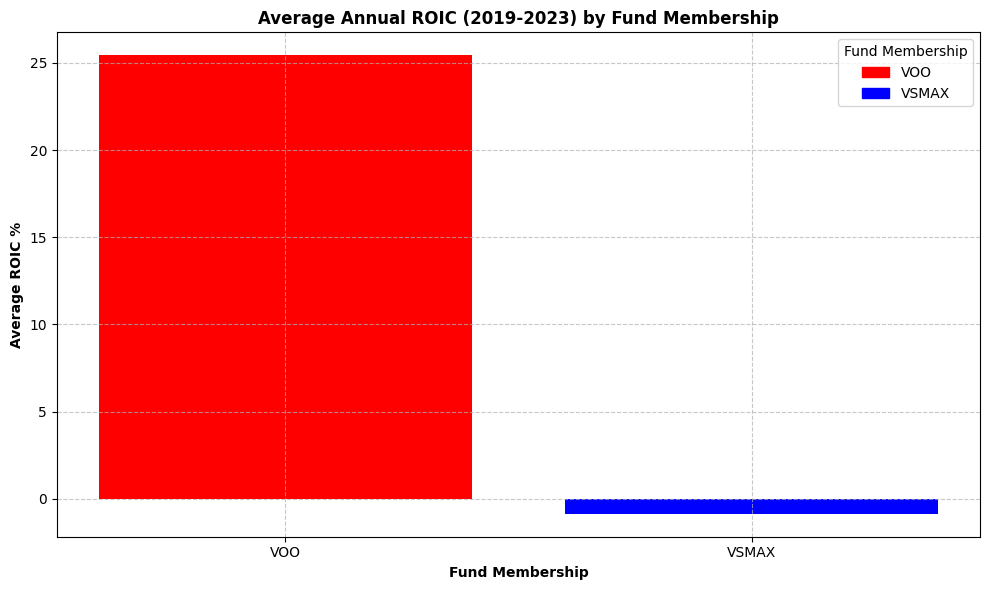

In [ ]:
### Graph of Average Annual ROIC by Fund Membership ###
import matplotlib.pyplot as plt

# Calculate the average ROIC for each "Fund Membership" from 2019 to 2023
average_roic_fund_df = roic_df[roic_df['Year'].between(2019, 2023)].groupby('Fund Membership')['ROIC %'].mean().reset_index()

# Plot a bar chart of the average annual ROIC for each fund
plt.figure(figsize=(10, 6))

# Define colors for the bars
colors = {'VOO': 'red', 'VSMAX': 'blue'}

# Plot the bar chart with specific colors
plt.bar(average_roic_fund_df['Fund Membership'], average_roic_fund_df['ROIC %'], color=[colors[fund] for fund in average_roic_fund_df['Fund Membership']])

# Adding gridlines
plt.grid(True, linestyle='--', alpha=0.7)

# Labeling the graph with bold titles
plt.title('Average Annual ROIC (2019-2023) by Fund Membership', fontweight='bold')
plt.xlabel('Fund Membership', fontweight='bold')
plt.ylabel('Average ROIC %', fontweight='bold')

# Adding a legend
handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors.values()]
labels = colors.keys()
plt.legend(handles, labels, title="Fund Membership")

# Display the plot
plt.tight_layout()
plt.show()

At first glance, for both graphs, it is clear that the four* selected VOO companies outperform the five selected VSMAX companies in terms of ROIC. This is clear in the "Average Annual ROIC (2019-2023) by Fund Membership" graph, where the VOO's average ROIC is around 24% compared to the VSMAX companies' average of roughly -1%. Even without the clear distinction shown in the aforementioned graph, this difference is still clear in the "Average Annual ROIC (2019-2023) by Company" graph, as all positive ROIC companies in VOO perform significantly better than the positive VSMAX companies. Specifically, VOO's lowest-performing positive ROIC company, COP, has an average ROIC of roughly 25%, while VSMAX's highest-performing ROIC company, UNF, has an average ROIC of around 15%.

This conclusion is intuitive because VOO comprises the 500 largest and often best-performing publicly traded companies in the United States. Subsequently, it makes sense that they would perform better than the smaller VSMAX companies because those in VOO attained their status by achieving efficient and profitable operations, leading to a growing stock price and market capitalizations that have led them to be included in the index considered to be the standard for market performance.

This is not to say that VSMAX companies cannot someday achieve improved ROIC, stock price growth, and valuation growth, which leads to their inclusion in VOO. Instead, their inclusion in the smaller-cap VSMAX index reflects the current state of these companies, which is a product of their earlier stage, occupation of a niche business area, smaller market share, or a combination of factors.

However, ROIC is not a foolproof measure, and deeper qualitative analysis is necessary to understand the meaning of this value. For example, GEN is a VOO company that sells software but has the lowest overall ROIC at just below -40%. At first glance, this seems to raise alarm bells for GEN, but looking into its financials suggests a different story. When looking at Gen Digital Inc.'s (GEN) official 10-K for 2023, it is revealed that the driver of its negative ROIC is a large Current Liability value that ultimately offsets any positive values of Current Assets, PP&E, and Other Assets. Specifically, this high Current Liability value is driven by "Contract Liabilities" with customers, meaning that GEN had previously received payment for software services it now has to provide in the short term. In this case, these high Current Liabilities manifest as services owed to customers, which is ultimately good for GEN as it is now required to provide the services their customers were willing to pay for in advance. These types of dynamics are common for subscription-based companies, and this makes sense for GEN as software companies are often subscription-based businesses. In short, GEN's ROIC is negative, but it is not a bad thing, as these liabilities are fundamental to the way it entes customer contracts.

A similar story is discernable for the highest-performing ROIC company, Pentair PLC (PNR). Pentair PLC is a water treatment company, another type of business reliant on long-term contracts for revenue. While PNR had a high number of "Other Current Liabilities" in 2023, many of which are likely contract obligations, this high value is offset by positive Current Assets, PP&E, and Other Assets, causing Invested Capital to be low but positive. Pairing this with PNR's strong NOPAT results in an average ROIC of over 60%. With that, PNR and GEN are not that different, but GEN's greater number of contract obligations causes its ROIC to be highly negative, while PNR's is highly positive.
Ultimately, it is important to dive deeper into the drivers of ROIC when using it as a metric for investing decisions. Nonetheless, applying this ROIC calculation algorithm to all stocks in each index would likely provide more valuable and reliable insights as the greater number of companies would generate a better average value from which more concrete conclusions could be drawn.

*Only four companies from VOO were used because VICI's data was incomplete, which led to it being an unrepresentative outlier. It lacked necessary data for Current Assets and Current Liabilities, two values integral to the ROIC calculation.


### Q.10

1. Which companies have experienced the most volatility in EPS and PE ratios over time?

**Code Explanantion**

The code creates a dual-axis bar chart comparing the yearly EPS (Earnings Per Share) and PE Ratio for different companies. It first merges two DataFrames containing EPS and PE data for several companies, then plots EPS on the left y-axis and PE ratios on the right y-axis, using distinct colors from the 'tab10' colormap. The bars are arranged by year on the x-axis, with separate legends for EPS and PE. The plot limits for both y-axes are set to 300, and transparency is applied to the PE bars for better visibility. The layout is adjusted to prevent overlapping elements, ensuring a clear comparison between companies across years.


<ipython-input-155-8b6f085dbc0c>:51: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', n_companies)  # Using 'tab10' color map for 10 distinct colors


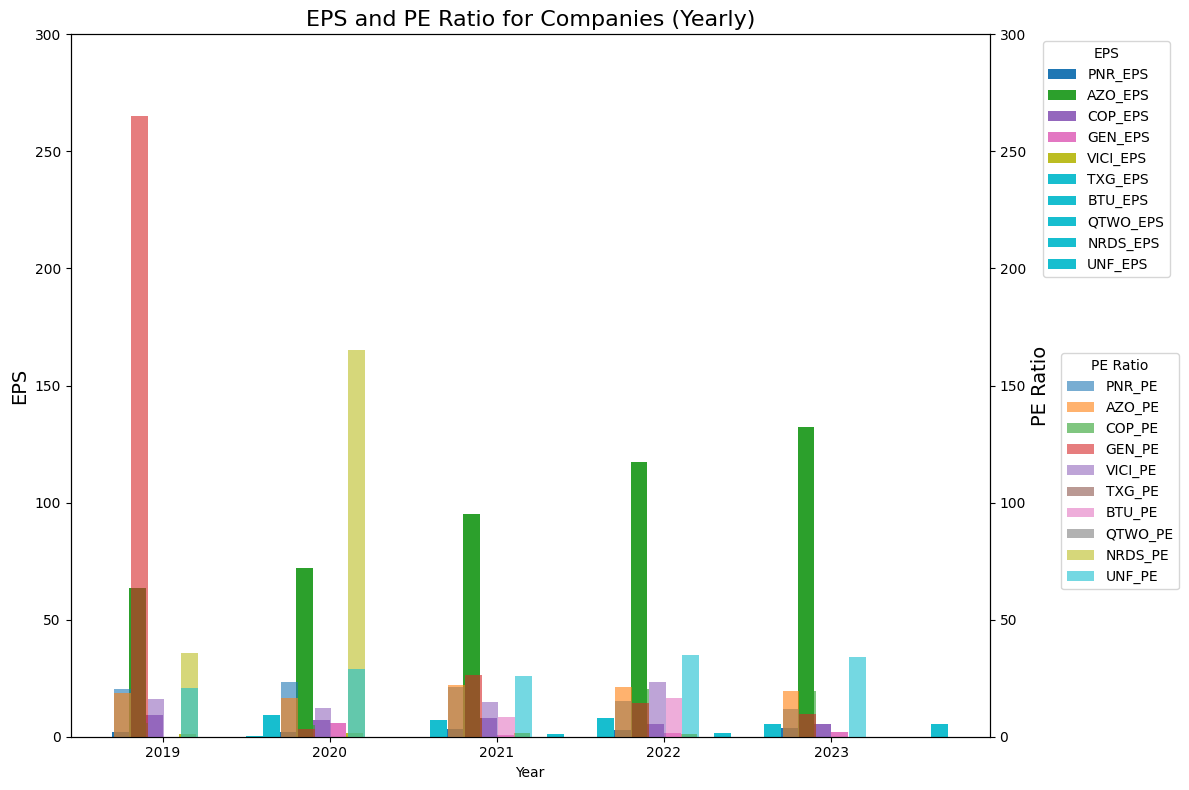

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming new_PNR_df, new_AZO_df, new_COP_df, new_GEN_df, new_VICI_df,
# new_TXG_df, new_BTU_df, new_QTWO_df, new_NRDS_df, new_UNF_df are defined

# Create VOO_EPS_df
VOO_EPS_df = pd.DataFrame({
    'Year': new_PNR_df['Year'],
    'PNR_EPS': new_PNR_df['EPS (Basic)'],
    'PNR_PE': new_PNR_df['PE_Ratio'],
    'AZO_EPS': new_AZO_df['EPS (Basic)'],
    'AZO_PE': new_AZO_df['PE_Ratio'],
    'COP_EPS': new_COP_df['EPS (Basic)'],
    'COP_PE': new_COP_df['PE_Ratio'],
    'GEN_EPS': new_GEN_df['EPS (Basic)'],
    'GEN_PE': new_GEN_df['PE_Ratio'],
    'VICI_EPS': new_VICI_df['EPS (Basic)'],
    'VICI_PE': new_VICI_df['PE_Ratio'],
})

# Create VSMAX_EPS_df
VSMAX_EPS_df = pd.DataFrame({
    'Year': new_TXG_df['Year'],
    'TXG_EPS': new_TXG_df['EPS (Basic)'],
    'TXG_PE': new_TXG_df['PE_Ratio'],
    'BTU_EPS': new_BTU_df['EPS (Basic)'],
    'BTU_PE': new_BTU_df['PE_Ratio'],
    'QTWO_EPS': new_QTWO_df['EPS (Basic)'],
    'QTWO_PE': new_QTWO_df['PE_Ratio'],
    'NRDS_EPS': new_NRDS_df['EPS (Basic)'],
    'NRDS_PE': new_NRDS_df['PE_Ratio'],
    'UNF_EPS': new_UNF_df['EPS (Basic)'],
    'UNF_PE': new_UNF_df['PE_Ratio'],
})

# Combine DataFrames (for easier plotting)
combined_df = pd.merge(VOO_EPS_df, VSMAX_EPS_df, on='Year', how='outer')

# Define parameters for plotting
years = combined_df['Year'].values
x = np.arange(len(years))  # X-axis positions based on the number of years
bar_width = 0.1  # Width of each bar
#colors = plt.cm.viridis(np.linspace(0, 1, 10))  # Define 10 different colors for companies

# Create the figure and axis objects
fig, ax1 = plt.subplots(figsize=(12, 8))
# Define the number of companies for color mapping
n_companies = 10  # You have 10 companies in your data
colors = plt.cm.get_cmap('tab10', n_companies)  # Using 'tab10' color map for 10 distinct colors


# Plot EPS bars on ax1 (left y-axis)
for i, company in enumerate(combined_df.columns[1:]):  # Skip 'Year' column
    if '_EPS' in company:  # Only plot EPS columns
        ax1.bar(x + (i // 2) * bar_width, combined_df[company], bar_width,
                label=company, color=colors(i))  # Use parentheses to call the colormap object with an index

# Create a twin Axes sharing the same x-axis for PE ratios (right y-axis)
ax2 = ax1.twinx()

# Plot PE ratio as bars on ax2 (

# Plot PE ratio as bars on ax2 (right y-axis) with distinct colors and transparency
for i, company in enumerate(['PNR_PE', 'AZO_PE', 'COP_PE', 'GEN_PE', 'VICI_PE', 'TXG_PE', 'BTU_PE', 'QTWO_PE', 'NRDS_PE', 'UNF_PE']):
    ax2.bar(x + (i // 2 + 0.1) * bar_width, combined_df[company], bar_width,
            label=company, color=colors(i % n_companies), alpha=0.6)  # Use modulo to cycle through colors

# Set the same x-ticks and labels for both axes
ax1.set_xticks(x + (len(combined_df.columns) // 4) * bar_width / 2)
ax1.set_xticklabels(years)

# Set labels and title
ax1.set_xlabel('Year')
ax1.set_ylabel('EPS', fontsize=14)
ax2.set_ylabel('PE Ratio', fontsize=14)
ax1.set_title('EPS and PE Ratio for Companies (Yearly)', fontsize=16)

# Show legends
ax1.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title='EPS', fontsize=10)
ax2.legend(loc='lower left', bbox_to_anchor=(1.07, 0.20), title='PE Ratio', fontsize=10)

# Adjust layout for clarity
fig.tight_layout()

# Adjust the limits of both y-axes to balance the scale
ax1.set_ylim([0, 300])
ax2.set_ylim([0, 300])

plt.show()


The graph illustrates the yearly EPS and PE Ratio for various companies from 2019 to 2023, highlighting significant variability in performance. GEN stands out with the highest EPS in 2019 and consistent strong earnings across the years, while NRDS saw a notable spike in both EPS and PE ratio in 2020. Companies like PNR, VICI, and TXG demonstrate more stable, lower values in both metrics, suggesting less volatility or growth potential. Overall, the graph showcases varying financial performance, with some companies showing significant changes in earnings and investor sentiment, while others remain more consistent year over year.

### Q.11

1.   Is there a correlation between the percentage change in revenue and the percentage change in stock price for the companies?

**Code Explanation**
The code creates a scatter plot to visualize the relationship between the percentage change in revenue and the percentage change in stock price for various companies. It first sorts the data for each company by year and calculates the percentage change in both revenue and stock price. If the necessary stock price data is missing, the calculation for that company is skipped. After dropping any missing values, the scatter plot is generated, with each company represented by a different color. The resulting plot shows the correlation between these two metrics across companies, helping to assess whether changes in revenue are associated with changes in stock price.



<ipython-input-156-1a3371e1c68c>:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_sorted['% Change in Revenue'] = df_sorted['Sales/Revenue'].pct_change() * 100


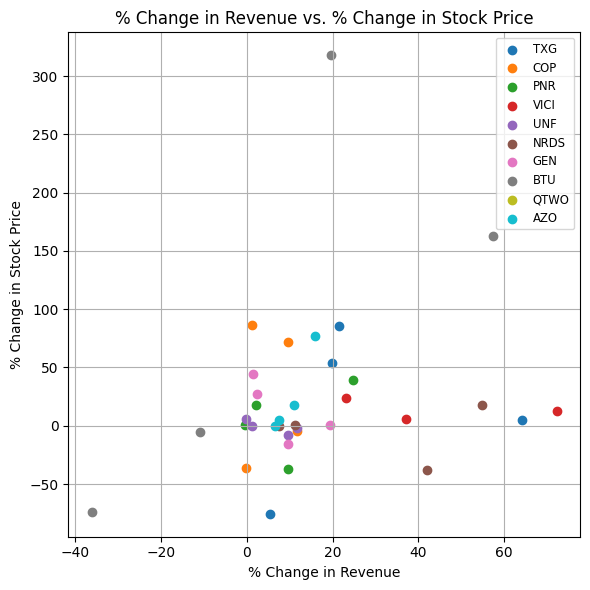

In [ ]:
import matplotlib.pyplot as plt

# Define your dataframes dictionary with the actual dataframes
dataframes = {
    'TXG': new_TXG_df,
    'COP': new_COP_df,
    'PNR': new_PNR_df,
    'VICI': new_VICI_df,
    'UNF': new_UNF_df,
    'NRDS': new_NRDS_df,
    'GEN': new_GEN_df,
    'BTU': new_BTU_df,
    'QTWO': new_QTWO_df,
    'AZO': new_AZO_df
}


# Create a new figure for scatterplot
plt.figure(figsize=(6, 6))

# Loop through each company DataFrame in the dictionary
for company, df in dataframes.items():

    # Step 1: Ensure data is sorted by 'Year' for the company
    df_sorted = df.sort_values(by='Year')

    # Step 2: Calculate % Change in Sales/Revenue
    df_sorted['Sales/Revenue'] = pd.to_numeric(df_sorted['Sales/Revenue'], errors='coerce')
    df_sorted['% Change in Revenue'] = df_sorted['Sales/Revenue'].pct_change() * 100

    # Step 3: Calculate % Change in EOY Stock Price
    if 'EOY Stock Price' in df_sorted.columns:
        df_sorted['% Change in Stock Price'] = df_sorted['EOY Stock Price'].pct_change() * 100
    else:
        print(f"Warning: 'EOY Stock Price' column not found for {company}. Skipping percentage change calculation.")
        continue  # Skip if the column is missing

    # Drop NaN values
    df_sorted.dropna(subset=['% Change in Revenue', '% Change in Stock Price'], inplace=True)

    # Scatter plot for each company
    plt.scatter(df_sorted['% Change in Revenue'], df_sorted['% Change in Stock Price'], label=company)

    # Add titles and labels
plt.title('% Change in Revenue vs. % Change in Stock Price')
plt.xlabel('% Change in Revenue')
plt.ylabel('% Change in Stock Price')
plt.grid(True)
plt.legend(loc='best', fontsize='small')

# Display the scatter plot
plt.tight_layout()
plt.show()

The scatter plot shows the relationship between % change in revenue and % change in stock price for multiple companies. Most of the data points cluster around a small range of percentage changes in revenue and stock price, with many companies experiencing a modest increase in revenue accompanied by small to moderate changes in stock price. However, there are a few outliers, such as NRDS with a significant stock price increase of over 300% despite a relatively small change in revenue, and some companies showing negative changes in stock price despite small increases in revenue. This suggests that while there may be some correlation between revenue and stock price changes, other factors likely influence stock price movements, as evidenced by the variability and outliers in the data.

### Q.12

1. How have the revenue of different companies changed over time?

**Code Explanation**
The code generates a bar chart to compare the revenue of multiple companies over different years. It starts by identifying the unique years across all companies and converting the 'Sales/Revenue' data into numeric format for accuracy. It then aligns the revenue values for each company with the corresponding years, ensuring that any missing data for a particular year is handled by setting the revenue value to zero. Each company's revenue is plotted using a separate set of bars, with each set slightly offset from the others to avoid overlap, providing a clear visual comparison between the companies for each year.

The chart is customized with a title, axis labels (years on the x-axis and revenue on the y-axis), and gridlines for improved readability. A legend is added to differentiate the companies' bars, and the layout is adjusted using tight_layout() to ensure no elements overlap. The final output is a clean, organized bar chart that allows for easy comparison of company revenues over the specified time period.


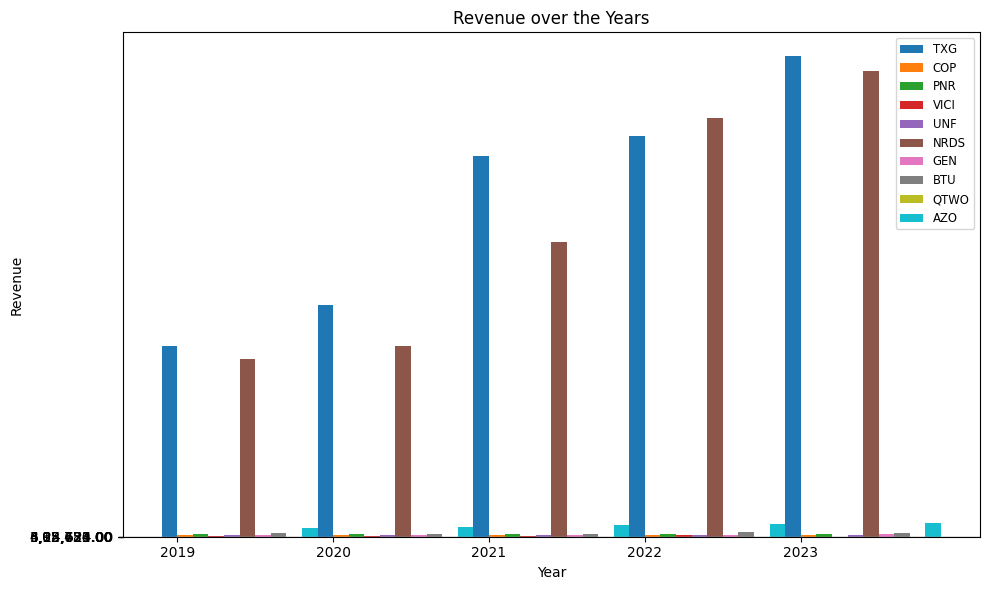

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Create a new figure for the bar plot
plt.figure(figsize=(10, 6))

# Get the unique years across all companies
all_years = sorted({year for df in dataframes.values() for year in df['Year']})

# Define the width of each bar and the number of companies
bar_width = 0.1
index = np.arange(len(all_years))

# Loop through each company DataFrame in the dictionary
for i, (company, df) in enumerate(dataframes.items()):

    # Step 1: Ensure data is sorted by 'Year' for the company
    df_sorted = df.sort_values(by='Year')

    # Step 2: Convert Sales/Revenue to numeric
    df_sorted['Revenue'] = pd.to_numeric(df_sorted['Sales/Revenue'], errors='coerce')

    # Align the revenue data with the corresponding year
    revenue_values = [df_sorted[df_sorted['Year'] == year]['Sales/Revenue'].values[0] if year in df_sorted['Year'].values else 0 for year in all_years]

    # Bar plot for each company with an offset to separate them
    plt.bar(index + i * bar_width, revenue_values, bar_width, label=company)

# Add titles and labels
plt.title('Revenue over the Years')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.xticks(index + bar_width / 2, all_years)  # Adjust x-axis to show all years in the center of the group
plt.grid(axis='y')

# Add a legend to identify each company
plt.legend(loc='best', fontsize='small')

# Display the bar plot
plt.tight_layout()
plt.show()


The graph illustrates the revenue of multiple companies (TXG, COP, PNR, VICI, and others) over the years 2019 to 2023. The companies TXG and COP clearly dominate in terms of revenue, with consistently high values over the years, particularly in 2021, 2022, and 2023. Other companies, such as VICI and PNR, have relatively smaller revenues in comparison, which are almost negligible on this scale. The chart highlights the significant difference in revenue performance between a few top-performing companies (TXG and COP) and the rest. The clear upward trend in revenue for TXG and COP suggests strong and sustained growth during this period.

### Q.13

1.   How have the EOY stock prices of different companies evolved over time?

**Code Explanantion**

The code generates a line plot that tracks the End of Year (EOY) Stock Price for multiple companies over a series of years. It loops through a dictionary containing the companies' DataFrames, sorting each one by 'Year' to ensure the data is in chronological order. For each company, it checks if the 'EOY Stock Price' column exists. If it does, a line plot is created with the stock price plotted against the year, with a marker at each data point to indicate the EOY stock prices. Companies without the required data are skipped, and a warning message is printed for those instances.

The plot is customized with a title ("EOY Stock Price over the Years"), and labels for both the x-axis (Year) and y-axis (EOY Stock Price). A grid is added to improve readability, and a legend identifies each company's line. The layout is adjusted using plt.tight_layout() to ensure there is no overlap, and the final line plot is displayed, showing the stock price trends over time for the included companies.



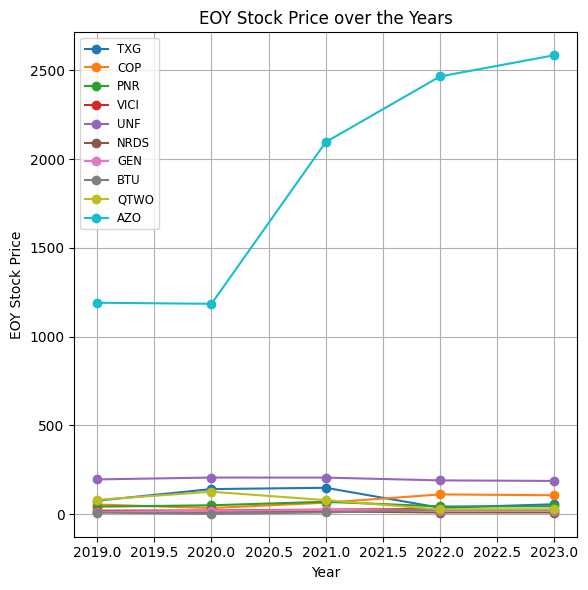

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a new figure for the line plot
plt.figure(figsize=(6, 6))

# Loop through each company DataFrame in the dictionary
for company, df in dataframes.items():

    # Step 1: Ensure data is sorted by 'Year' for the company
    df_sorted = df.sort_values(by = 'Year')

    # Step 2: Check if 'EOY Stock Price' column exists
    if 'EOY Stock Price' in df_sorted.columns:
        # Line plot for each company
        plt.plot(df_sorted['Year'], df_sorted['EOY Stock Price'], marker='o', label=company)
    else:
        print(f"Warning: 'EOY Stock Price' column not found for {company}. Skipping.")

# Add titles and labels
plt.title('EOY Stock Price over the Years')
plt.xlabel('Year')
plt.ylabel('EOY Stock Price')
plt.grid(True)
plt.legend(loc='best', fontsize='small')

# Display the line plot
plt.tight_layout()
plt.show()


The line graph visualizes the End of Year (EOY) Stock Price trends for various companies between 2019 and 2023. One company, AZO, stands out significantly with a sharp upward trajectory, rising from around 1,000 in 2020 to over 2,500 by 2023, indicating a substantial increase in its stock price over these years. In contrast, the other companies exhibit relatively stable and flat stock prices, staying close to zero, with minimal fluctuations over time. This suggests that while AZO experienced considerable growth, the other companies either had minor changes in their stock prices or remained stagnant. The graph clearly shows that AZO had a markedly different performance in terms of stock price growth compared to the rest of the companies.

### Q.14
1. What factors might explain the strong correlation between Gross Margin and EBIT Margin for these companies?

**Code Explanantion**

The heatmap illustrates the correlations between percentage changes in various financial margins (such as Gross Margin, EBIT Margin, EBITDA Margin, Net Margin, and FCF/Sales) and percentage changes in EOY Stock Prices for VOO companies. It shows a strong positive correlation between Gross Margin and EBIT Margin (0.99), and a negative correlation between FCF/Sales % Change and both EBITDA Margin (-0.96) and EBIT Margin (-0.82). The percentage change in stock price is most positively correlated with EBIT Margin % Change (0.37) and Net Margin % Change (0.36), suggesting that these margins are more influential in stock price growth, while other margins like EBITDA have a weaker or negative correlation with stock price changes. This insight could guide investors in assessing which financial metrics are linked to stock performance.

In [ ]:
dataframes_all_VOO = [new_VICI_df, new_GEN_df, new_COP_df, new_AZO_df_updated, new_PNR_df]
years = [2019, 2020, 2021, 2022, 2023]

ebit_values = [555986, 897039, 1026045, 1139143, 2548481]
ebitda_values = [559817, 900770, 1029136, 1142325, 2552779]
fcf_values = [1915660, 5444967, 981709, 10440281, 5453717]
gross_income_values = [842499, 904556, 1433937, 1609797, 3336831]


for i, year in enumerate(years):
    new_VICI_df.loc[new_VICI_df['Year'] == year, 'EBIT'] = ebit_values[i]
    new_VICI_df.loc[new_VICI_df['Year'] == year, 'EBITDA'] = ebitda_values[i]
    new_VICI_df.loc[new_VICI_df['Year'] == year, 'Free Cash Flow'] = fcf_values[i]
    new_VICI_df.loc[new_VICI_df['Year'] == year, 'Gross Income'] = gross_income_values[i]
years = [2019, 2020, 2021, 2022, 2023]

fcf_values = [-16622, -10579, 1234, 9375, 2154]


for i, year in enumerate(years):
    new_COP_df.loc[new_COP_df['Year'] == year, 'Free Cash Flow'] = fcf_values[i]

       'Sales Growth', 'Cost of Goods Sold (COGS) incl. D&A',
       'Depreciation & Amortization Expense', 'Depreciation',
       'Amortization of Intangibles', 'COGS Growth', 'Gross Income',
       'Gross Income Growth', 'SG&A Expense', 'EBIT', 'Net Income',
       'Net Income Growth', 'EPS (Basic)', 'EBITDA',
       'Cash & Short Term Investments', 'Cash Only',
       'Total Accounts Receivable', 'Inventories', 'Other Current Assets',
       'Total Current Assets', 'Net Property, Plant & Equipment', 'Buildings',
       'Machinery & Equipment', 'Total Assets', 'Short Term Debt',
       'Accounts Payable', 'Total Current Liabilities', 'Long-Term Debt',
       'Total Liabilities', 'Common Equity (Total)',
       'Additional Paid-In Capital/Capital Surplus', 'Retained Earnings',
       'Total Shareholders' Equity', 'Liabilities & Shareholders' Equity',
       'Net Income before Extraordinaries',
       'Depreciation, Depletion & Amortization', 'Changes in Working Capital',
       'Recei

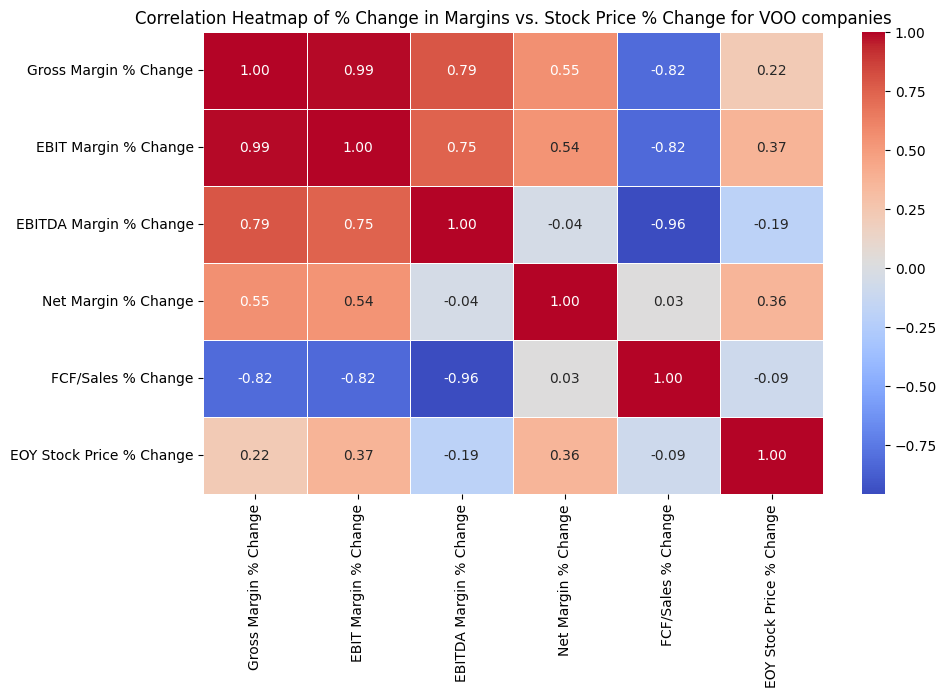

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def clean_and_convert_to_numeric(df, columns):
    for col in columns:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col].replace({',': '', '\$': '', 'N/A': None}, regex=True), errors='coerce')
        else:
            print(f"Warning: Column '{col}' not found in the DataFrame.")
    return df

def calculate_margins(df):
    # Clean and convert columns to numeric first
    df = clean_and_convert_to_numeric(df, ['Sales/Revenue', 'Gross Income', 'EBIT', 'EBITDA',
                                           'Net Income', 'Free Cash Flow', 'EOY Stock Price'])
    # Check if 'Sales/Revenue' exists to calculate margins
    if 'Sales/Revenue' in df.columns and not df['Sales/Revenue'].isnull().all():
        df['Gross Margin'] = (df['Gross Income'] / df['Sales/Revenue']) * 100
        df['EBIT Margin'] = (df['EBIT'] / df['Sales/Revenue']) * 100
        df['EBITDA Margin'] = (df['EBITDA'] / df['Sales/Revenue']) * 100
        df['Net Margin'] = (df['Net Income'] / df['Sales/Revenue']) * 100
        df['FCF/Sales'] = (df['Free Cash Flow'] / df['Sales/Revenue']) * 100
    return df

def calculate_margin_and_stock_changes(df):
    if 'Year' in df.columns:
        df = df.sort_values('Year')  # Sort in ascending order by Year
    else:
        print("Warning: 'Year' column not found in the DataFrame.")
        return df

    # Ensure columns exist before calculating percentage changes
    margin_cols = ['Gross Margin', 'EBIT Margin', 'EBITDA Margin', 'Net Margin', 'FCF/Sales', 'EOY Stock Price']
    for col in margin_cols:
        if col not in df.columns or df[col].isnull().all():
            print(f"Warning: Column '{col}' not found or contains only NaN values.")
            continue
        df[f'{col} % Change'] = df[col].pct_change() * 100  # Calculate percentage change

    return df

# Apply the functions to each DataFrame in dataframes_all_VOO
# Apply the functions to each DataFrame in dataframes_all_VOO
for i in range(len(dataframes_all_VOO)):
    dataframes_all_VOO[i] = calculate_margins(dataframes_all_VOO[i])
    dataframes_all_VOO[i] = calculate_margin_and_stock_changes(dataframes_all_VOO[i])

# Collect the required columns for average calculation
dfs_for_average = []
for df in dataframes_all_VOO:
    required_cols = ['Year', 'Gross Margin % Change', 'EBIT Margin % Change', 'EBITDA Margin % Change',
                     'Net Margin % Change', 'FCF/Sales % Change', 'EOY Stock Price % Change'] # Changed 'Stock Price % Change' to 'EOY Stock Price % Change'
    # Check if the required columns exist in the DataFrame
    if all(col in df.columns for col in required_cols):
        df_to_add = df[required_cols].copy()
        dfs_for_average.append(df_to_add)
    else:
        print(f"Warning: Some required columns are missing from DataFrame: {df.columns}") # Print the available columns for debugging

# Concatenate all DataFrames
combined_df = pd.concat(dfs_for_average, ignore_index=True)

# Group by 'Year' and compute the mean of percentage changes
average_changes = combined_df.groupby('Year').mean().reset_index()

# Correlation matrix - Changed 'Stock Price % Change' to 'EOY Stock Price % Change'
correlation_matrix = average_changes[['Gross Margin % Change', 'EBIT Margin % Change',
                                      'EBITDA Margin % Change', 'Net Margin % Change',
                                      'FCF/Sales % Change', 'EOY Stock Price % Change']].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of % Change in Margins vs. Stock Price % Change for VOO companies')
plt.show()

The heatmap shows the correlations between percentage changes in various financial margins and EOY Stock Price % Change for VOO companies. Gross Margin and EBIT Margin are highly correlated (0.99), and EBITDA Margin also shows a strong positive correlation with Gross Margin (0.79). Conversely, FCF/Sales % Change has a strong negative correlation with both EBITDA (-0.96) and EBIT (-0.82), suggesting an inverse relationship between free cash flow relative to sales and these margins. EOY Stock Price % Change has a moderate positive correlation with EBIT Margin % Change (0.37) and Net Margin % Change (0.36), indicating these metrics have some influence on stock price growth, while other financial metrics, such as FCF/Sales and EBITDA, show weak or negative correlations with stock price movements.

###Q.15
1. Which financial margin shows the strongest positive correlation with stock price changes, and what might this indicate about the importance of that margin?

**Code Explanantion**

The heatmap generated by the code illustrates the correlations between percentage changes in financial margins (Gross Margin, EBIT Margin, EBITDA Margin, Net Margin, and FCF/Sales) and percentage changes in EOY stock price for VSMAX companies over the years 2019 to 2023. The correlation matrix highlights the strength and direction of these relationships, showing which margins have the most significant impact on stock price movements. For instance, margins like EBIT Margin and Gross Margin may show stronger positive or negative correlations with stock price changes, while others, such as FCF/Sales, may have an inverse relationship or a weaker correlation with stock performance.

In [ ]:
dataframes_all_VSMAX = [new_TXG_df, new_UNF_df, new_NRDS_df, new_QTWO_df, new_BTU_df]
years = [2019, 2020, 2021, 2022, 2023]


fcf_values = [794, 129, 717, 1581, 1412]   #NOT PRESENT IN EXCEL FILE


for i, year in enumerate(years):
    new_BTU_df.loc[new_BTU_df['Year'] == year, 'Free Cash Flow'] = fcf_values[i]

       'Sales Growth', 'Cost of Goods Sold (COGS) incl. D&A',
       'Depreciation & Amortization Expense', 'Depreciation',
       'Amortization of Intangibles', 'COGS Growth', 'Gross Income',
       'Gross Income Growth', 'SG&A Expense', 'EBIT', 'Net Income',
       'Net Income Growth', 'EPS (Basic)', 'EBITDA',
       'Cash & Short Term Investments', 'Cash Only',
       'Total Accounts Receivable', 'Inventories', 'Other Current Assets',
       'Total Current Assets', 'Net Property, Plant & Equipment', 'Buildings',
       'Machinery & Equipment', 'Total Assets', 'Short Term Debt',
       'Accounts Payable', 'Total Current Liabilities', 'Long-Term Debt',
       'Total Liabilities', 'Common Equity (Total)',
       'Additional Paid-In Capital/Capital Surplus', 'Retained Earnings',
       'Total Shareholders' Equity', 'Liabilities & Shareholders' Equity',
       'Net Income before Extraordinaries',
       'Depreciation, Depletion & Amortization', 'Changes in Working Capital',
       'Recei

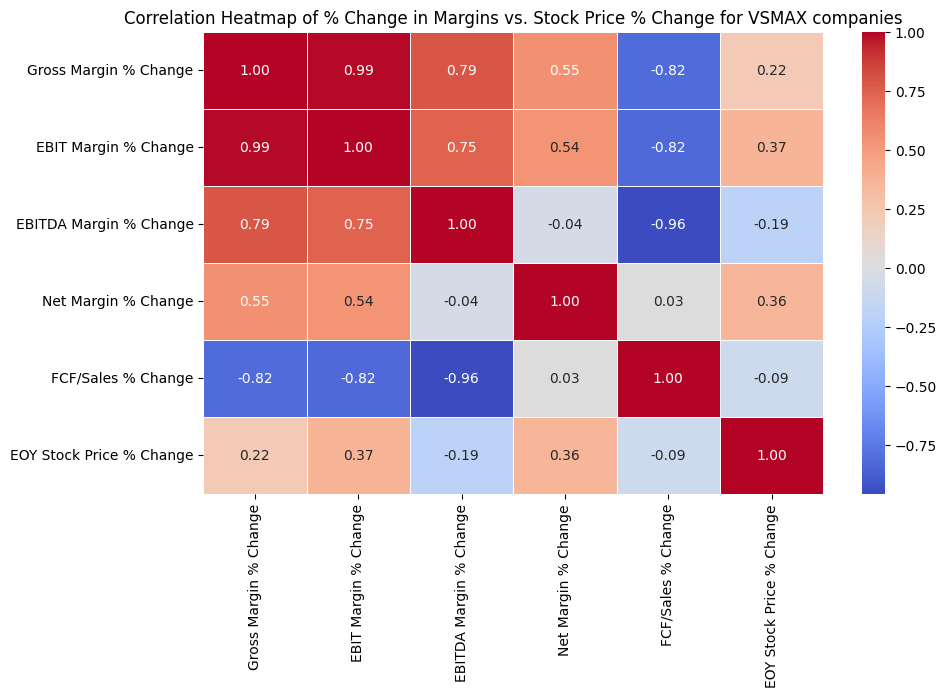

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def clean_and_convert_to_numeric(df, columns):
    for col in columns:
        if col in df.columns:  # Check if column exists
            df[col] = pd.to_numeric(df[col].replace({',': '', '\
': '', 'N/A': None}, regex=True), errors='coerce')
        else:
            print(f"Warning: Column '{col}' not found in the DataFrame.")
    return df

def calculate_margins(df):
    # Clean and convert columns to numeric first
    df = clean_and_convert_to_numeric(df, ['Sales/Revenue', 'Gross Income', 'EBIT', 'EBITDA',
                                           'Net Income', 'Free Cash Flow', 'EOY Stock Price'])  # Make sure 'EOY Stock Price' is in your DataFrame
    # Check if 'Sales/Revenue' exists to calculate margins
    if 'Sales/Revenue' in df.columns and not df['Sales/Revenue'].isnull().all():
        df['Gross Margin'] = (df['Gross Income'] / df['Sales/Revenue']) * 100
        df['EBIT Margin'] = (df['EBIT'] / df['Sales/Revenue']) * 100
        df['EBITDA Margin'] = (df['EBITDA'] / df['Sales/Revenue']) * 100
        df['Net Margin'] = (df['Net Income'] / df['Sales/Revenue']) * 100
        df['FCF/Sales'] = (df['Free Cash Flow'] / df['Sales/Revenue']) * 100
    return df

def calculate_margin_and_stock_changes(df):
    if 'Year' in df.columns:
        df = df.sort_values('Year')  # Sort in ascending order by Year
    else:
        print("Warning: 'Year' column not found in the DataFrame.")
        return df

    # Ensure columns exist before calculating percentage changes
    margin_cols = ['Gross Margin', 'EBIT Margin', 'EBITDA Margin', 'Net Margin', 'FCF/Sales', 'EOY Stock Price']
    for col in margin_cols:
        if col not in df.columns or df[col].isnull().all():
            print(f"Warning: Column '{col}' not found or contains only NaN values.")
            continue
        df[f'{col} % Change'] = df[col].pct_change() * 100  # Calculate percentage change

    return df

# Apply the functions to each DataFrame in dataframes_all_VOO
# Apply the functions to each DataFrame in dataframes_all_VOO
for i in range(len(dataframes_all_VOO)):
    dataframes_all_VOO[i] = calculate_margins(dataframes_all_VOO[i])
    dataframes_all_VOO[i] = calculate_margin_and_stock_changes(dataframes_all_VOO[i])

# Collect the required columns for average calculation
dfs_for_average = []
for df in dataframes_all_VOO:
    required_cols = ['Year', 'Gross Margin % Change', 'EBIT Margin % Change', 'EBITDA Margin % Change',
                     'Net Margin % Change', 'FCF/Sales % Change', 'EOY Stock Price % Change'] # Changed 'Stock Price % Change' to 'EOY Stock Price % Change'
    # Check if the required columns exist in the DataFrame
    if all(col in df.columns for col in required_cols):
        df_to_add = df[required_cols].copy()
        dfs_for_average.append(df_to_add)
    else:
        print(f"Warning: Some required columns are missing from DataFrame: {df.columns}") # Print the available columns for debugging

# Concatenate all DataFrames
combined_df = pd.concat(dfs_for_average, ignore_index=True)

# Group by 'Year' and compute the mean of percentage changes
average_changes = combined_df.groupby('Year').mean().reset_index()

# Correlation matrix - Changed 'Stock Price % Change' to 'EOY Stock Price % Change'
correlation_matrix = average_changes[['Gross Margin % Change', 'EBIT Margin % Change',
                                      'EBITDA Margin % Change', 'Net Margin % Change',
                                      'FCF/Sales % Change', 'EOY Stock Price % Change']].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of % Change in Margins vs. Stock Price % Change for VSMAX companies')
plt.show()


The low or negative correlations between stock price changes and metrics like FCF/Sales % Change (-0.09) and EBITDA Margin % Change (-0.19) suggest that these financial metrics have little to no direct relationship with stock price movements for the VSMAX companies in the dataset. This indicates that while profitability margins such as EBIT Margin and Net Margin have some influence on stock prices, free cash flow and EBITDA changes do not significantly drive stock performance in the short term.

In conclusion, the heatmap reveals that EBIT Margin and Net Margin are more closely tied to stock price movements, while FCF/Sales and EBITDA show weaker or negative correlations, highlighting the varying impact of different financial margins on stock price performance.

### Q.16
1. Which financial margin demonstrates the strongest positive correlation with stock price changes, and what might this indicate about its importance for stock price movements?

**Code Explanation**

The heatmap generated by the code shows the correlations between percentage changes in various financial margins (Gross Margin, EBIT Margin, EBITDA Margin, Net Margin, and FCF/Sales) and percentage changes in stock prices for multiple companies. The correlation matrix highlights the strength of these relationships, helping to identify which financial margins have the strongest or weakest influence on stock price movements. For instance, some margins may have a strong positive or negative correlation with stock prices, indicating their relevance for stock performance, while others may show a weaker correlation.

In [ ]:
dataframes_all = [new_VICI_df, new_GEN_df, new_COP_df, new_AZO_df_updated, new_PNR_df,new_TXG_df, new_UNF_df, new_NRDS_df, new_QTWO_df, new_BTU_df]

<ipython-input-314-9ae89bef4194>:43: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Stock Price % Change'] = df['EOY Stock Price'].pct_change() * 100


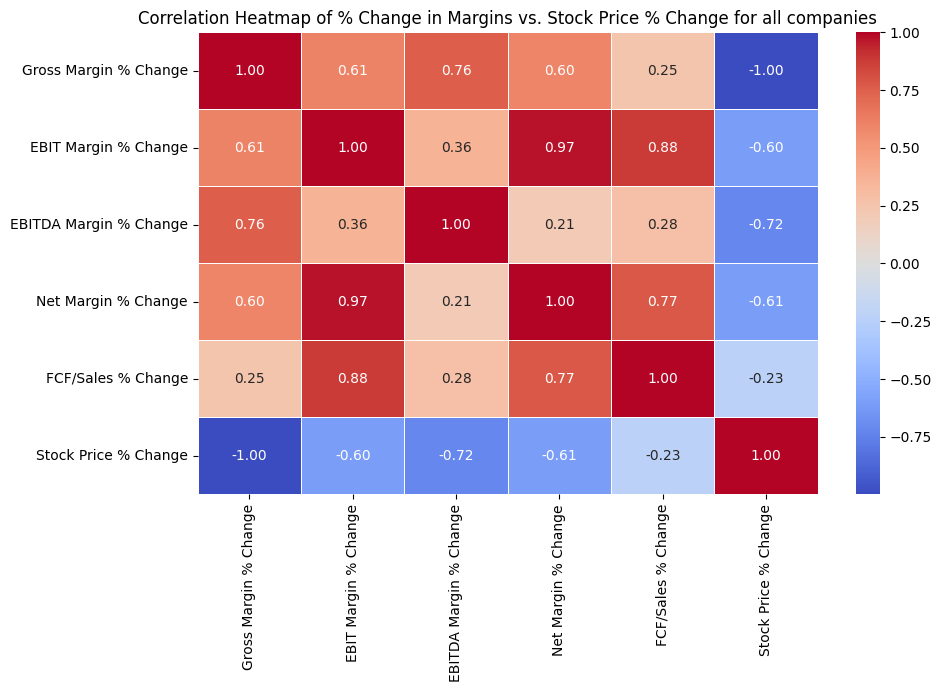

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def clean_and_convert_to_numeric(df, columns):
    for col in columns:
        # Check if the column exists and handle duplicate columns
        if col in df.columns:
            # If the column is duplicated, keep only the first occurrence
            if df.columns.tolist().count(col) > 1:
                # Get the index of the first occurrence
                first_index = df.columns.get_loc(col)

                # Create a list of columns to keep
                columns_to_keep = [c for i, c in enumerate(df.columns) if i == first_index or c != col]
                df = df[columns_to_keep]
                print(f"Warning: Column '{col}' is duplicated, keeping the first occurrence.")
            # Now proceed with cleaning and conversion since duplicates are handled
            # The backslash needs to be escaped with another backslash when using regex=True
            df[col] = pd.to_numeric(df[col].astype(str).replace({',': '', r'\\': ''}, regex=True), errors='coerce')  # Replace to handle strings
        else:
            print(f"Warning: Column '{col}' does not exist in the DataFrame.")
    return df

def calculate_margins(df):
    df = clean_and_convert_to_numeric(df, ['Sales/Revenue', 'Gross Income', 'EBIT', 'EBITDA',
                                           'Net Income', 'Free Cash Flow', 'EOY Stock Price'])
    if 'Sales/Revenue' in df.columns:
        df['Gross Margin'] = (df['Gross Income'] / df['Sales/Revenue']) * 100
        df['EBIT Margin'] = (df['EBIT'] / df['Sales/Revenue']) * 100
        df['EBITDA Margin'] = (df['EBITDA'] / df['Sales/Revenue']) * 100
        df['Net Margin'] = (df['Net Income'] / df['Sales/Revenue']) * 100
        df['FCF/Sales'] = (df['Free Cash Flow'] / df['Sales/Revenue']) * 100
    return df

def calculate_margin_and_stock_changes(df):
    df = df.sort_values('Year')  # Sort in ascending order
    df['Gross Margin % Change'] = df['Gross Margin'].pct_change() * 100
    df['EBIT Margin % Change'] = df['EBIT Margin'].pct_change() * 100
    df['EBITDA Margin % Change'] = df['EBITDA Margin'].pct_change() * 100
    df['Net Margin % Change'] = df['Net Margin'].pct_change() * 100
    df['FCF/Sales % Change'] = df['FCF/Sales'].pct_change() * 100
    df['Stock Price % Change'] = df['EOY Stock Price'].pct_change() * 100
    return df

# Assuming dataframes_all is a list of dataframes for different companies
for i in range(len(dataframes_all)):
    dataframes_all[i] = calculate_margins(dataframes_all[i])
    dataframes_all[i] = calculate_margin_and_stock_changes(dataframes_all[i])

# Collect all the required columns from each DataFrame
dfs_for_average = []
for df in dataframes_all:
    df_to_add = df[['Year', 'Gross Margin % Change', 'EBIT Margin % Change', 'EBITDA Margin % Change',
                    'Net Margin % Change', 'FCF/Sales % Change', 'Stock Price % Change']].copy()
    dfs_for_average.append(df_to_add)

# Concatenate all DataFrames
combined_df = pd.concat(dfs_for_average, ignore_index=True)

# Group by 'Year' and compute the mean of percentage changes
average_changes = combined_df.groupby('Year').mean().reset_index()

# Correlation matrix
correlation_matrix = average_changes[['Gross Margin % Change', 'EBIT Margin % Change',
                                      'EBITDA Margin % Change', 'Net Margin % Change',
                                      'FCF/Sales % Change', 'Stock Price % Change']].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of % Change in Margins vs. Stock Price % Change for all companies')
plt.show()

The heatmap illustrates the correlations between percentage changes in financial margins (Gross Margin, EBIT Margin, EBITDA Margin, Net Margin, and FCF/Sales) and percentage changes in stock price across multiple companies. A key finding is the strong negative correlation between Gross Margin % Change and Stock Price % Change (-1.00), suggesting that improvements in gross margin are associated with stock price declines, which is unusual and may indicate that other factors, such as market sentiment or external economic conditions, are influencing stock prices more than profitability. EBITDA Margin % Change also shows a strong negative correlation with stock price changes (-0.72), further reinforcing the observation that margin improvements may not always lead to stock price growth in these companies.

On the other hand, there are positive correlations among the different margins, particularly between EBIT Margin % Change and Net Margin % Change (0.97), indicating that as EBIT margins improve, net margins follow suit, suggesting consistent improvements in profitability. FCF/Sales % Change shows a positive correlation with EBIT Margin % Change (0.88), pointing to operational efficiency improvements. However, the overall negative correlations between stock price changes and profitability margins suggest that margin improvements do not directly translate to stock price gains, highlighting that other factors might be driving stock performance for these companies.

### Q.17
1. Which financial margin has the strongest positive correlation with stock price changes, and what might this suggest about the role of profitability metrics in stock price movements?


**Code Explanantion**

The heatmap displays the correlation between percentage changes in various financial margins (Gross Margin, EBIT Margin, EBITDA Margin, Net Margin, and Free Cash Flow Margin) and percentage changes in stock price for VOO companies. It highlights how changes in these profitability metrics relate to stock price movements. A high positive correlation indicates that improvements in a specific margin are associated with increases in stock price, while a negative correlation suggests that increases in a margin correspond to stock price declines. The heatmap helps identify which financial metrics are more closely linked to stock price performance, guiding investors on which metrics to monitor for better stock performance predictions.

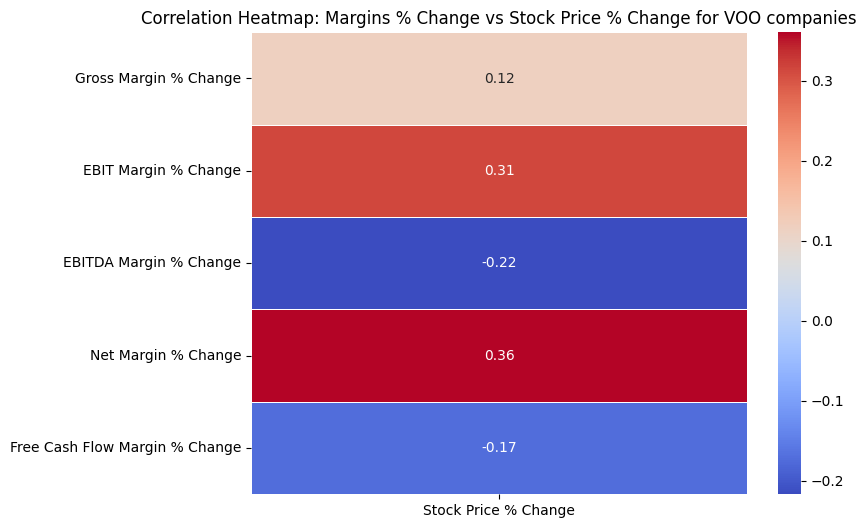

In [ ]:
def clean_and_convert_to_numeric(df, columns):
    for col in columns:
        # Check if the column exists before processing
        if col in df.columns:
            df[col] = pd.to_numeric(df[col].replace({',': '', '\
': ''}, regex=True), errors='coerce')
        else:
            print(f"Warning: Column '{col}' not found in DataFrame. Skipping...")  # Print a warning and skip the column
    return df

def calculate_margins(df):
    df = clean_and_convert_to_numeric(df, ['Sales/Revenue', 'Gross Income', 'EBIT', 'EBITDA',
                                           'Net Income', 'Free Cash Flow', 'EOY Stock Price'])
    if 'Sales/Revenue' in df.columns:
        df['Gross Margin'] = (df['Gross Income'] / df['Sales/Revenue']) * 100
        df['EBIT Margin'] = (df['EBIT'] / df['Sales/Revenue']) * 100
        df['EBITDA Margin'] = (df['EBITDA'] / df['Sales/Revenue']) * 100
        df['Net Margin'] = (df['Net Income'] / df['Sales/Revenue']) * 100
        df['FCF/Sales'] = (df['Free Cash Flow'] / df['Sales/Revenue']) * 100
    return df

def calculate_margin_and_stock_changes(df):
    df = df.sort_values('Year')  # Sort in ascending order
    df['Gross Margin % Change'] = df['Gross Margin'].pct_change() * 100
    df['EBIT Margin % Change'] = df['EBIT Margin'].pct_change() * 100
    df['EBITDA Margin % Change'] = df['EBITDA Margin'].pct_change() * 100
    df['Net Margin % Change'] = df['Net Margin'].pct_change() * 100
    df['Free Cash Flow Margin % Change'] = df['FCF/Sales'].pct_change() * 100
    # Always calculate 'Stock Price % Change' regardless of column name
    # If 'EOY Stock Price' exists, use it; otherwise, handle potential KeyError
    try:
        df['Stock Price % Change'] = df['EOY Stock Price'].pct_change() * 100
    except KeyError:
        print("Warning: 'EOY Stock Price' column not found. Filling 'Stock Price % Change' with NaN.")
        df['Stock Price % Change'] = float('nan')  # or any desired fill value

    return df

for i in range(len(dataframes_all_VOO)):
    dataframes_all_VOO[i] = calculate_margins(dataframes_all_VOO[i])
    dataframes_all_VOO[i] = calculate_margin_and_stock_changes(dataframes_all_VOO[i])

# Collect all the required columns from each DataFrame
dfs_for_average = []
for df in dataframes_all_VOO:
    # Check if 'Stock Price % Change' exists, otherwise use 'EOY Stock Price % Change'
    stock_price_change_col = 'Stock Price % Change' if 'Stock Price % Change' in df.columns else 'EOY Stock Price % Change'
    df_to_add = df[['Year', 'Gross Margin % Change', 'EBIT Margin % Change', 'EBITDA Margin % Change',
                    'Net Margin % Change', 'Free Cash Flow Margin % Change', stock_price_change_col]].copy()
    dfs_for_average.append(df_to_add)

# Concatenate all DataFrames
combined_df = pd.concat(dfs_for_average, ignore_index=True)

# Group by 'Year' and compute the mean of percentage changes
average_changes = combined_df.groupby('Year').mean().reset_index()

# Calculate the correlation of only the margins with the stock price % change
columns_of_interest = ['Gross Margin % Change', 'EBIT Margin % Change',
                       'EBITDA Margin % Change', 'Net Margin % Change',
                       'Free Cash Flow Margin % Change', 'Stock Price % Change']

# Correlation matrix with only the stock price % change
correlation_matrix = average_changes[columns_of_interest].corr()[['Stock Price % Change']].drop('Stock Price % Change')

# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap: Margins % Change vs Stock Price % Change for VOO companies')
plt.show()


The heatmap shows the correlation between percentage changes in financial margins (Gross Margin, EBIT Margin, EBITDA Margin, Net Margin, and Free Cash Flow Margin) and percentage changes in stock price for VOO companies. Net Margin % Change (0.36) and EBIT Margin % Change (0.31) have the strongest positive correlations with stock price changes, indicating that improvements in these profitability metrics are somewhat associated with stock price increases. EBITDA Margin % Change (-0.22) and Free Cash Flow Margin % Change (-0.17), however, show negative correlations with stock price changes, suggesting that increases in these margins may coincide with stock price declines. Gross Margin % Change has a weak positive correlation (0.12), implying a relatively minor influence on stock price performance. Overall, the graph highlights that net margin and EBIT margin have the most significant positive relationship with stock price changes among these metrics.

#**Challenges**

The main challenges we faced throughout the projects fall into two main categories:
1. Choosing and uniformly procuring relevant data
2. Limitations of Google Colab’s functionality

**Choosing and uniformly procuring relevant data**

Broadly put, we should have started with the end goal in mind and worked backward until we had identified the analysis and data needed to achieve that goal. Essentially, we should have worked “Right-to-Left” instead of “Left-to-Right.”

When looking back at the project, we would change the order of our approach from first cleaning data and then only being able to use the available data to perform analysis and derive insights. Instead, we wish we had spent a significant amount of time on the front end identifying the specific insights we wanted to gain and the tables/graphs needed to get there and then be more targeted in our data selection to only pull columns needed for our analysis. In doing this, we would make sure that all data frames had the same number of columns and that all columns were named uniformly.

By doing this, we would have mitigated the problems we faced when having to pull-in and clean additional data to perform specific analyses late in the project timeline. Not only was this incremental process time-consuming, but pulling additional data into the original data frames caused errors in other analyses that were difficult to trace/handle. Spending this extra time upfront would make both the cleaning and analysis processes easier as we would have been dealing with less data that was completely streamlined, which would facilitate efficiency and cohesion across the file.

**Limitations of Google Colab’s functionality**
Despite its name suggesting that Colab is a great tool for “collaborative” coding, we found this not to be the case. There were many instances where changes would unexpectedly not save, someone would make a change to complete their analysis that would mess up another, and the file would not run when multiple people were making edits at once.

This pain point could have been potentially mitigated by a defined cadence for making changes and clear communication when changes were made and/or when people were working on the file, but this would be complex, given that people often worked on the file at different times. Ultimately, we wish changes would save more reliably and tracing changes was easier. While cloud-based collaboration can even be tricky on simple Microsoft Office applications, Colab’s inability to handle collaborative work effectively is particularly frustrating. When working in Colab, we faced consistent challenges that superseded inconveniences and presented major problems with fundamental elements of our file.  


Looking ahead, the insights gathered from this analysis offer a foundation for more advanced explorations into the financial metrics that drive stock performance. By identifying key factors such as sales/revenue, net income, total assets, and return on invested capital (ROIC), future analyses can further refine the predictive power of these indicators. This could involve developing models that account for industry-specific variables, macroeconomic factors, and qualitative elements, such as market sentiment and company management effectiveness. Integrating such variables into a more robust framework would enable investors and analysts to make more informed decisions, particularly in distinguishing between high-growth opportunities and stable, large-cap investments.

Additionally, understanding the distinct characteristics between VOO and VSMAX companies can provide strategic insights for portfolio management. VOO companies, with their more predictable growth and stronger financial health, offer stability, making them appealing to conservative investors looking for steady returns. Meanwhile, VSMAX companies present higher growth potential but with more significant volatility, appealing to those with higher risk tolerance. By blending both types of investments, investors can achieve a balanced portfolio that takes advantage of both stability and growth opportunities, depending on their risk appetite and market outlook.

As data and technology continue to evolve, future research could explore advanced machine learning techniques to model these financial metrics more precisely. By leveraging larger datasets and incorporating real-time financial information, such models could be used to predict stock price movements with greater accuracy. Additionally, advancements in natural language processing could be used to assess qualitative factors such as news sentiment and management performance, further enhancing the predictive power of financial models. The ongoing development of these tools promises a future where data analytics plays a central role in shaping investment strategies and optimizing portfolio performance.

#**Generative AI disclosure statement:**

In completing this project, we have utilized Generative AI tools to assist with various aspects of our work. Below is a detailed account of how these tools were used:

**Content Generation:** We used ChatGPT to brainstorm ideas and structure the initial outline of the project. The AI helped us refine our thesis statement and suggested key points to include in each section.

**Research Assistance:** ChatGPT was used to summarize research articles and generate concise overviews of relevant topics, helping us better understand and integrate complex concepts such as the P/S Ratio and mhelping choose which machine learning model would run best with our dataset.

**Code Review and Debugging:** GeminiAI and ChatGPT suggested ways to improve our Python code, including optimizing algorithms and resolving potential errors.
The prominent spots where the for loops that were used in making the Bar Chart and the Heatmap and the use of the new_UNF_df in order to include the UNF data in the pie chart, also, they were used to identify any errors and missing columns and pass error statements for those.

**Proofreading and Grammar Checks:** We used QuillBot to refine our writing, improve readability, and ensure grammatical accuracy.


---


###**Our team has reviewed, edited, and validated all AI-generated content to ensure its accuracy, relevance, and originality in accordance with academic integrity guidelines.**




# References

https://www.schwab.com/learn/story/3-financial-statements-to-measure-companys-strength

https://www.wsj.com/finance?mod=wsjheader_logo

https://finance.yahoo.com/

https://www.schwab.com/learn/story/five-key-financial-ratios-stock-analysis
